In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from package import models
from package import encoder

import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA

import seaborn as sns; sns.set()

Loaded  2 encoders.


In [2]:
# baseline MLP for mnist dataset
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Input, Dense, Lambda, Layer, LeakyReLU, BatchNormalization,Activation
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from keras.models import load_model
from keras.callbacks import TensorBoard
from keras import regularizers
from keras.callbacks import ReduceLROnPlateau

import numpy as np
import math
import keras
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.optimize import curve_fit
from astropy.io import fits
from astropy.table import Table
from keras.models import Model
from keras import backend as K

In [3]:
csv = pd.read_csv("SPLUSiDR4_GaiaEDR3_BJ21_LAMOSTDR7_SEGUE.csv", encoding='latin-1', index_col=['ID', 'RA_SPLUS', 'DEC_SPLUS'])
xtrain = pd.DataFrame()
ytrain = pd.DataFrame()

In [4]:
csv

,,,u_0,J378_0,J395_0,J410_0,J430_0,g_0,J515_0,r_0,J660_0,i_0,...,feh_LAMOST_err,teff_LAMOST_recalibrated,logg_LAMOST_recalibrated,feh_LAMOST_recalibrated,teff_training,teff_training_err,logg_training,logg_training_err,feh_training,feh_training_err
ID,RA_SPLUS,DEC_SPLUS,,,,,,,,,,,,,,,,,,,,,
iDR4_3_SPLUS-n01s01_0000103,150.174918,-0.707248,18.740275,18.459236,18.448148,17.773576,17.745170,17.453267,17.281794,16.996103,16.979660,16.878871,...,NaN,NaN,NaN,NaN,5777,9,4.27,0.05,-0.42,0.04
iDR4_3_SPLUS-n01s01_0000131,150.247784,-0.706343,17.961170,17.557527,17.395885,16.940903,16.960105,16.798380,16.634018,16.553750,16.562136,16.524397,...,0.088,6695.90,3.986,-0.575,6567,18,3.82,0.06,-0.53,0.03
iDR4_3_SPLUS-n01s01_0000200,150.966743,-0.705547,15.610993,15.151029,14.938563,14.678464,14.614623,14.519800,14.358354,14.258020,14.280045,14.259589,...,0.058,6596.29,3.741,-0.471,6683,17,3.81,0.06,-0.35,0.02
iDR4_3_SPLUS-n01s01_0000220,150.436039,-0.703092,18.196770,17.862429,17.808803,17.216337,17.137261,16.869861,16.693803,16.442250,16.429073,16.330336,...,NaN,NaN,NaN,NaN,5847,46,4.08,0.04,-0.31,0.02
iDR4_3_SPLUS-n01s01_0000248,150.416858,-0.702641,17.882518,17.664711,17.522903,16.866583,16.798515,16.354411,16.198380,15.784910,15.729709,15.614563,...,0.051,5340.13,4.454,-0.703,5280,38,4.49,0.06,-0.84,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_STRIPE82-0170_0047436,358.244396,1.317788,19.305300,18.933995,18.973642,18.284042,18.290215,17.841979,17.704608,17.396171,17.388831,17.271604,...,0.119,5636.50,4.316,-0.692,5637,109,4.32,0.18,-0.69,0.12
iDR4_3_STRIPE82-0170_0047656,358.443639,1.319673,16.435508,16.125900,15.977774,15.279934,15.188697,14.779653,14.595130,14.282482,14.243314,14.105358,...,0.062,5591.32,4.205,-0.122,5591,59,4.21,0.09,-0.12,0.06
iDR4_3_STRIPE82-0170_0048158,358.291405,1.288510,15.140979,14.620409,14.519064,14.139961,14.072554,13.942583,13.793976,13.681078,13.694912,13.620172,...,0.040,6564.66,3.897,-0.647,6565,43,3.90,0.06,-0.65,0.04


In [5]:
print('min: ', csv['teff_training'].min())
print('max: ', csv['teff_training'].max())

min:  4001
max:  7048


In [6]:
csv['logg_training'].mean()

4.009834374302922

In [6]:
print('min: ', csv['logg_training'].min())
print('max: ', csv['logg_training'].max())

min:  0.21
max:  4.92


In [7]:
print('min: ', csv['feh_training'].min())
print('max: ', csv['feh_training'].max())

min:  -4.21
max:  0.74


In [10]:
for column in csv:
    print(column)

u_0
J378_0
J395_0
J410_0
J430_0
g_0
J515_0
r_0
J660_0
i_0
J861_0
z_0
sf11_ebv
e_u_PStotal
e_J0378_PStotal
e_J0395_PStotal
e_J0410_PStotal
e_J0430_PStotal
e_g_PStotal
e_J0515_PStotal
e_r_PStotal
e_J0660_PStotal
e_i_PStotal
e_J0861_PStotal
e_z_PStotal
s2n_DET_auto
SEX_FLAGS_DET
ra_epoch2000
dec_epoch2000
source_id
ra_GaiaEDR3
ra_GaiaEDR3_error
dec_GaiaEDR3
dec_GaiaEDR3_error
parallax
parallax_error
parallax_over_error
pm
pmra
pmra_error
pmdec
pmdec_error
astrometric_n_good_obs_al
astrometric_gof_al
astrometric_chi2_al
astrometric_excess_noise
astrometric_excess_noise_sig
astrometric_params_solved
pseudocolour
pseudocolour_error
visibility_periods_used
ruwe
duplicated_source
phot_g_mean_flux
phot_g_mean_flux_error
phot_g_mean_mag
phot_bp_mean_flux
phot_bp_mean_flux_error
phot_bp_mean_mag
phot_rp_mean_flux
phot_rp_mean_mag
phot_bp_rp_excess_factor
bp_rp
dr2_radial_velocity
dr2_radial_velocity_error
phot_g_mean_mag_error
phot_bp_mean_mag_error
phot_rp_mean_mag_error
phot_g_mean_mag_correcte

# Configurando rede

##### Generate Weights

In [5]:
def generate_weights(feh,bins=20):
    b_size=[]
    sample_weights=np.ones(len(feh))
    bin_size=(max(feh)-min(feh))/bins
    a1=np.where(feh==min(feh))[0]
    for i in range(bins):
            b=np.where((feh>min(feh)+i*bin_size)&(feh<=min(feh)+(i+1)*bin_size))[0]
            b_size.append(b.shape[0])
    for i in range(bins):
        a0=np.where((feh>min(feh)+i*bin_size)&(feh<=min(feh)+(i+1)*bin_size))[0]
        sample_weights[a0]=np.sqrt(max(b_size)/(a0.shape[0]))
        if i==0:
            sample_weights[a1]=np.sqrt(max(b_size)/(a0.shape[0]))
    return np.array(sample_weights)

## Modelos

##### teff

In [58]:
# define baseline model
def baseline_model():
    # create model
    input_x0 = Input(shape=(12,), name='inp0')   
    encoded0 = Dense(300, name='encoded0',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(input_x0)
    a0=LeakyReLU(alpha=0.01)(encoded0)
    encoded1 = Dense(200, name='encoded1',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a0)
    a1=LeakyReLU(alpha=0.01)(encoded1)
    encoded2 = Dense(100, name='encoded2',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a1)
    a2=LeakyReLU(alpha=0.01)(encoded2)
    output_y0 = Dense(1,name='oup0',kernel_initializer = "normal", activation='linear')(a2)
    trainable_model=Model(inputs=input_x0, outputs=output_y0)
    trainable_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='mse')
    return trainable_model
model = baseline_model()

# Escolha do tipo de filtro utilizar

In [4]:
dataSet = csv[['u_0', 'J378_0', 'J395_0', 
               'J410_0', 'J430_0', 'g_0', 
               'J515_0', 'r_0', 'J660_0', 
               'i_0', 'J861_0', 'z_0']]

In [5]:
ydataSet = csv[['logg_training']]

(array([7.1300e+02, 1.1681e+04, 1.9902e+04, 2.4811e+04, 2.2761e+04,
        9.7500e+03, 4.0000e+01, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([10.40894991, 11.93954655, 13.47014318, 15.00073982, 16.53133645,
        18.06193309, 19.59252972, 21.12312635, 22.65372299, 24.18431962,
        25.71491626]),
 <BarContainer object of 10 artists>)

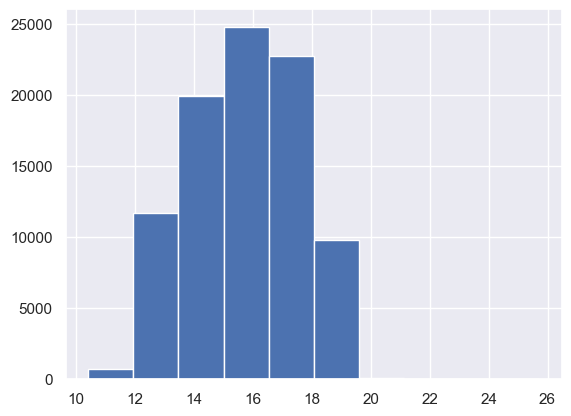

In [8]:
plt.hist(dataSet["r_0"])

Text(0, 0.5, 'feh')

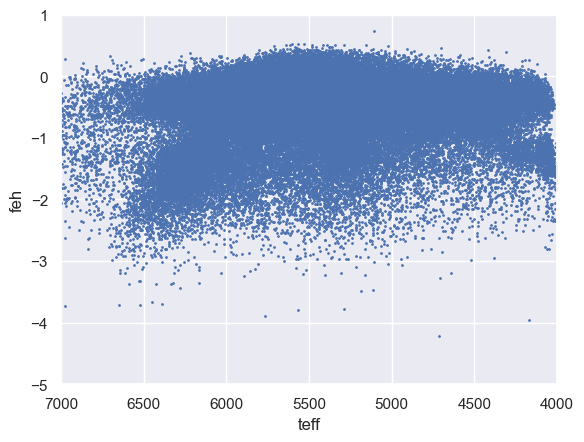

In [23]:
# plota o pred de acordo com o Y_test (teff)
plt.scatter(csv["teff_training"], csv["feh_training"], s=1)
plt.xlim(7000, 4000)
plt.ylim(-5, 1)
plt.xlabel('teff')
plt.ylabel('feh')

Text(0, 0.5, 'logg')

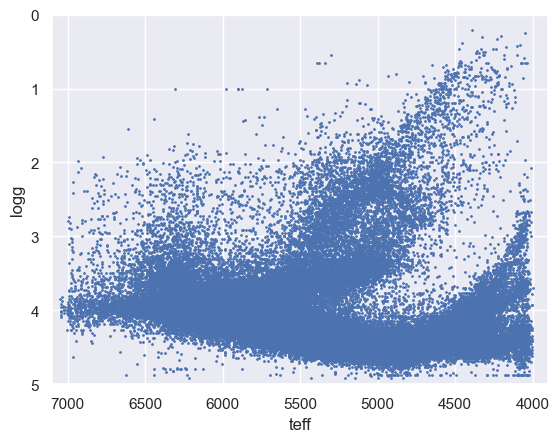

In [26]:
# plota o pred de acordo com o Y_test (teff)
plt.scatter(csv["teff_training"], csv["logg_training"], s=1)
plt.xlim(7100, 3900)
plt.ylim(5, 0)
plt.xlabel('teff')
plt.ylabel('logg')

### Procurando e limpando outliers

In [ ]:
def cap_outliers(df, column):
    """Remove outliers.
    Args:
        df (pd.DataFrame): DataFrame
        column (str): column name to remove outliers
    Returns:
        pd.DataFrame: Update dataframe.
    """    
    upper = df[column].mean() + 3*df[column].std()
    down = df[column].mean() - 3*df[column].std()

    df[(df[column] > upper) | (df[column] < down)]

    df[column] = np.where(
        df[column]>upper,
        upper,
        np.where(
            df[column]<down,
            down,
            df[column]
        )
    )
    
    return df

<AxesSubplot: xlabel='u_0'>

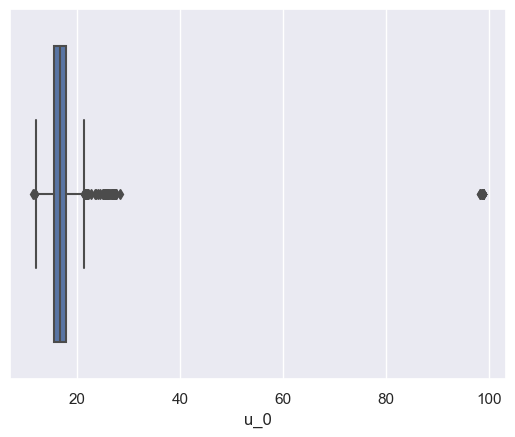

In [114]:
sns.boxplot(x = dataSet["u_0"])

<AxesSubplot: xlabel='J378_0'>

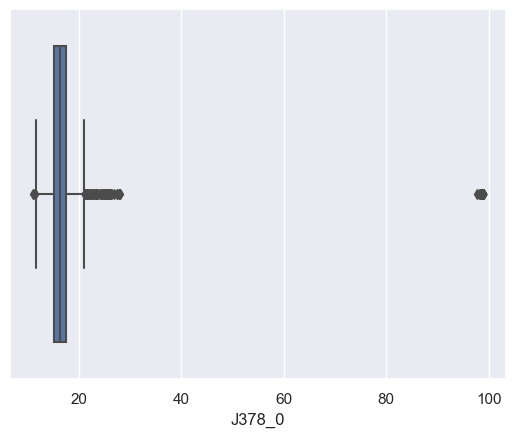

In [115]:
sns.boxplot(x = dataSet["J378_0"])

<AxesSubplot: xlabel='J395_0'>

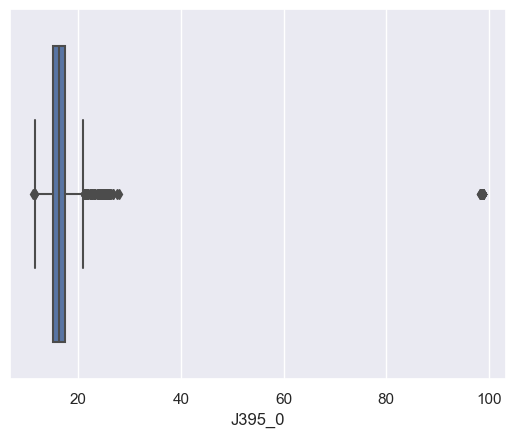

In [116]:
sns.boxplot(x = dataSet["J395_0"])

<AxesSubplot: xlabel='J410_0'>

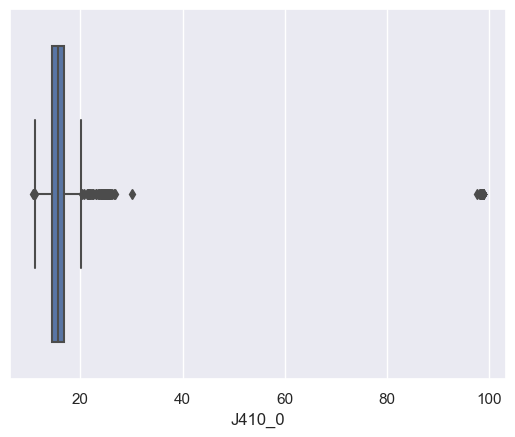

In [117]:
sns.boxplot(x = dataSet["J410_0"])

<AxesSubplot: xlabel='J430_0'>

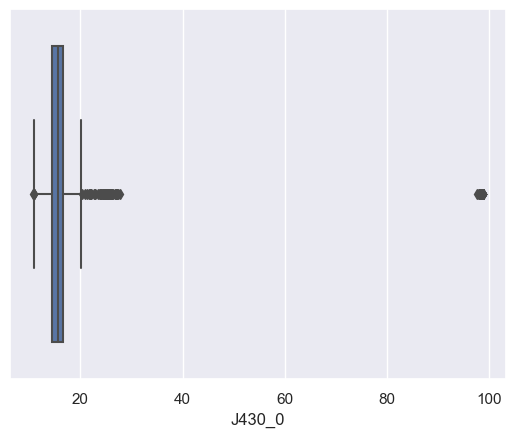

In [118]:
sns.boxplot(x = dataSet["J430_0"])

<AxesSubplot: xlabel='g_0'>

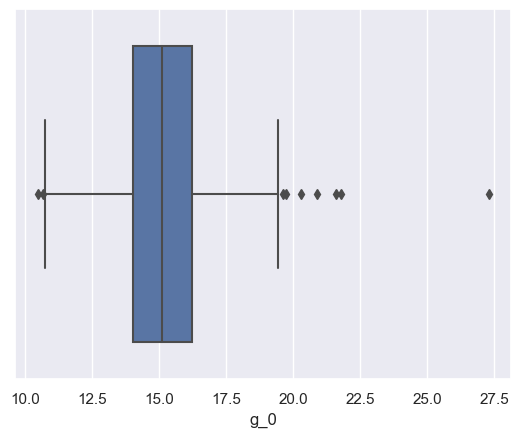

In [119]:
sns.boxplot(x = dataSet["g_0"])

<AxesSubplot: xlabel='J515_0'>

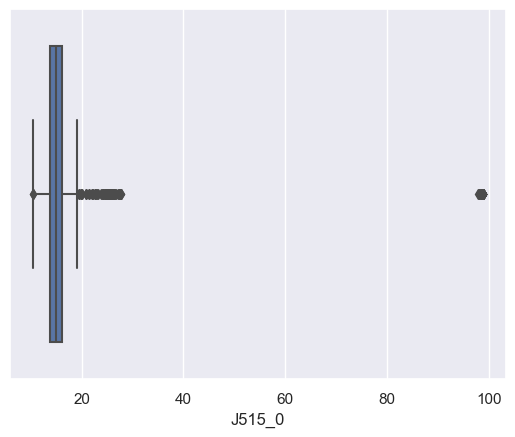

In [120]:
sns.boxplot(x = dataSet["J515_0"])

<AxesSubplot: xlabel='r_0'>

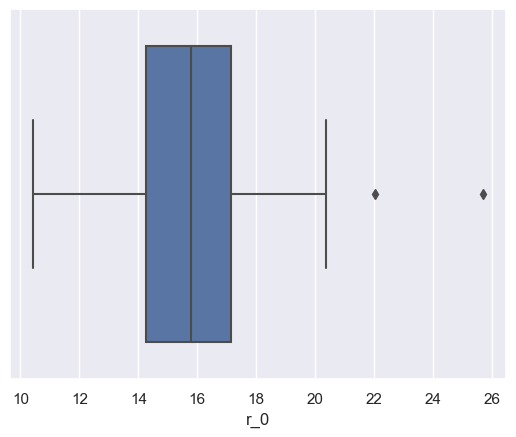

In [6]:
sns.boxplot(x = dataSet["r_0"])

<AxesSubplot: xlabel='J660_0'>

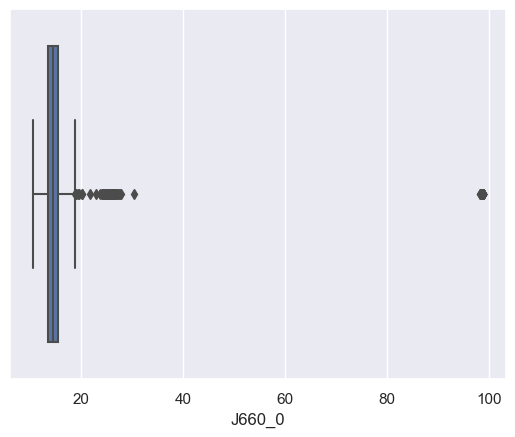

In [122]:
sns.boxplot(x = dataSet["J660_0"])

<AxesSubplot: xlabel='i_0'>

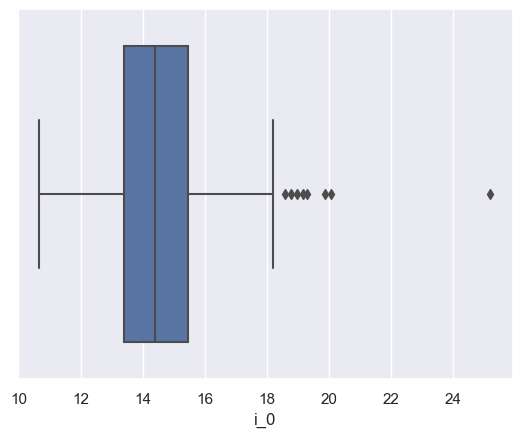

In [123]:
sns.boxplot(x = dataSet["i_0"])

<AxesSubplot: xlabel='J861_0'>

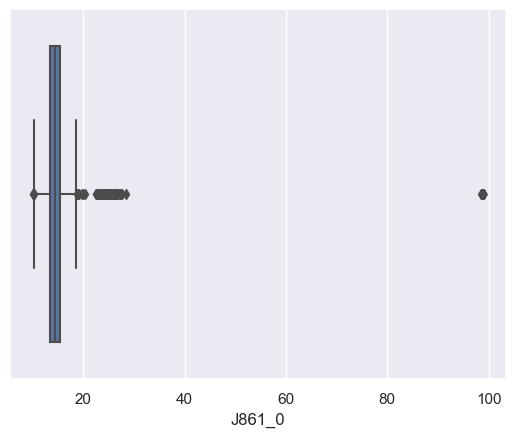

In [124]:
sns.boxplot(x = dataSet["J861_0"])

<AxesSubplot: xlabel='z_0'>

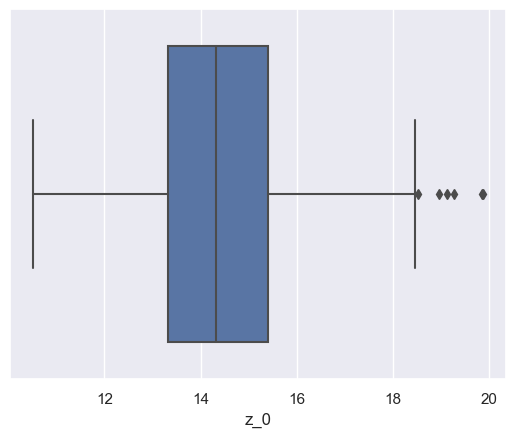

In [132]:
sns.boxplot(x = dataSet["z_0"])

<AxesSubplot: xlabel='logg_training'>

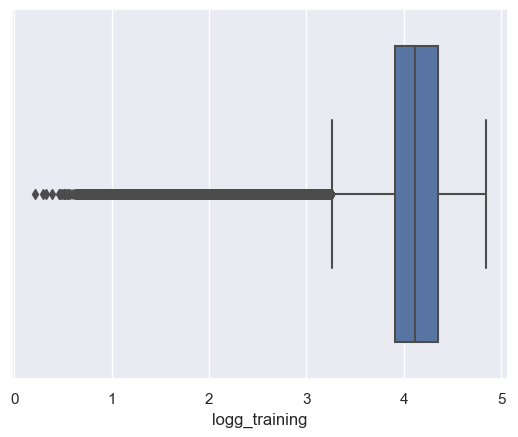

In [131]:
sns.boxplot(x = ydataSet["logg_training"])

In [130]:
ydataSet.max()

logg_training    4.84
dtype: float64

In [30]:
xtrain.max()

u_0       98.926771
J378_0    98.930823
J395_0    98.921567
J410_0    98.918919
J430_0    98.939002
g_0       27.287014
J515_0    98.941641
r_0       25.714916
J660_0    98.965833
i_0       25.178262
J861_0    98.974468
z_0       19.874937
dtype: float64

In [40]:
xtrain.max()

u_0       23.527986
J378_0    25.854730
J395_0    24.962075
J410_0    24.771312
J430_0    24.501727
g_0       19.531620
J515_0    24.279568
r_0       18.776898
J660_0    24.336927
i_0       18.523621
J861_0    24.047464
z_0       18.475906
dtype: float64

In [184]:
#sample_weights=generate_weights(np.array(Y_train),bins=20)#The 'sample_weights' and the 'train_y' should have the same shape.

ZeroDivisionError: division by zero

##### Treinando TEFF

In [137]:
xtrain = csv.loc[(csv['SNRg_LAMOST']>10) & 
                 (csv['SNRi_LAMOST']>10) & 
                 (csv['SNRz_LAMOST']>10) & 
                 (csv['SNRr_LAMOST']>10) & 
                 (csv['teff_LAMOST']>4000) & 
                 (csv['teff_LAMOST']<7000),
                 ['u_0', 'J378_0', 'J395_0', 
                 'J410_0', 'J430_0', 'g_0', 
                 'J515_0', 'r_0', 'J660_0', 
                 'i_0', 'J861_0', 'z_0']]

In [34]:
ytrain = csv.loc[(csv['SNRg_LAMOST']>10) & 
                 (csv['SNRi_LAMOST']>10) & 
                 (csv['SNRz_LAMOST']>10) & 
                 (csv['SNRr_LAMOST']>10) & 
                 (csv['teff_LAMOST']>4000) & 
                 (csv['teff_LAMOST']<7000) &
                 (csv['logg_training']>3.5),
                 ['teff_training', "logg_training"]]

Text(0, 0.5, 'logg')

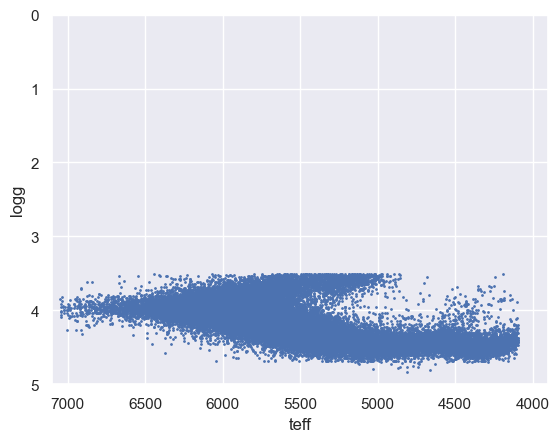

In [35]:
# plota o pred de acordo com o Y_test (teff)
plt.scatter(ytrain["teff_training"], ytrain["logg_training"], s=1)
plt.xlim(7100, 3900)
plt.ylim(5, 0)
plt.xlabel('teff')
plt.ylabel('logg')

In [139]:
xtrain = csv[['u_0', 'J378_0', 'J395_0', 
                 'J410_0', 'J430_0', 'g_0', 
                 'J515_0', 'r_0', 'J660_0', 
                 'i_0', 'J861_0', 'z_0']]

In [140]:
ytrain = csv[['teff_training']]

In [141]:
for column in xtrain:
    xtrain = cap_outliers(xtrain, column)

In [142]:
xtrain.shape

(89660, 12)

In [143]:
train_x= encoder.encode_DataFrame(xtrain, "lamost")#The input vector: 12 stellar filters from splus; For example, it is an array with the shape of (189654,13);

train_y= encoder.encode_DataFrame(ytrain, 'teff_training')

In [144]:
# Separando a base para treino e para teste
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=11085)

In [145]:
# Separando a base de treino para utilizar como validação no treinamento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=11085)

In [146]:
bs = 3000

In [147]:
modelteff = baseline_model()

In [148]:
# Rodar os primeiros testes para ignorar os maiores loss                                                  (sample_weight=sample_weights, )
modelteff.fit(X_train, Y_train, epochs = 30, validation_data=(X_val, Y_val), batch_size = bs, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/30
22/22 - 1s - loss: 0.1691 - val_loss: 0.1635 - 665ms/epoch - 30ms/step
Epoch 2/30
22/22 - 0s - loss: 0.1626 - val_loss: 0.1554 - 126ms/epoch - 6ms/step
Epoch 3/30
22/22 - 0s - loss: 0.1511 - val_loss: 0.1396 - 122ms/epoch - 6ms/step
Epoch 4/30
22/22 - 0s - loss: 0.1293 - val_loss: 0.1107 - 134ms/epoch - 6ms/step
Epoch 5/30
22/22 - 0s - loss: 0.0923 - val_loss: 0.0670 - 118ms/epoch - 5ms/step
Epoch 6/30
22/22 - 0s - loss: 0.0482 - val_loss: 0.0301 - 119ms/epoch - 5ms/step
Epoch 7/30
22/22 - 0s - loss: 0.0253 - val_loss: 0.0222 - 128ms/epoch - 6ms/step
Epoch 8/30
22/22 - 0s - loss: 0.0225 - val_loss: 0.0213 - 125ms/epoch - 6ms/step
Epoch 9/30
22/22 - 0s - loss: 0.0215 - val_loss: 0.0207 - 123ms/epoch - 6ms/step
Epoch 10/30
22/22 - 0s - loss: 0.0210 - val_loss: 0.0202 - 118ms/epoch - 5ms/step
Epoch 11/30
22/22 - 0s - loss: 0.0205 - val_loss: 0.0198 - 121ms/epoch - 6ms/step
Epoch 12/30
22/22 - 0s - loss: 0.0201 - val_loss: 0.0195 - 117ms/epoch - 5ms/step
Epoch 13/30
22/22 - 0s -

In [149]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyteff = modelteff.fit(X_train, Y_train, epochs = 2500, validation_data=(X_val, Y_val), batch_size = bs, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

# Salva o modelo treinado.
#modelteff.save('model/model_lamost_teff_V.h5') 

Epoch 1/2500
22/22 - 0s - loss: 0.0159 - val_loss: 0.0155 - 293ms/epoch - 13ms/step
Epoch 2/2500
22/22 - 0s - loss: 0.0157 - val_loss: 0.0156 - 122ms/epoch - 6ms/step
Epoch 3/2500
22/22 - 0s - loss: 0.0156 - val_loss: 0.0152 - 121ms/epoch - 6ms/step
Epoch 4/2500
22/22 - 0s - loss: 0.0155 - val_loss: 0.0151 - 121ms/epoch - 6ms/step
Epoch 5/2500
22/22 - 0s - loss: 0.0154 - val_loss: 0.0150 - 121ms/epoch - 6ms/step
Epoch 6/2500
22/22 - 0s - loss: 0.0153 - val_loss: 0.0149 - 120ms/epoch - 5ms/step
Epoch 7/2500
22/22 - 0s - loss: 0.0151 - val_loss: 0.0149 - 124ms/epoch - 6ms/step
Epoch 8/2500
22/22 - 0s - loss: 0.0150 - val_loss: 0.0147 - 121ms/epoch - 6ms/step
Epoch 9/2500
22/22 - 0s - loss: 0.0149 - val_loss: 0.0145 - 121ms/epoch - 6ms/step
Epoch 10/2500
22/22 - 0s - loss: 0.0148 - val_loss: 0.0145 - 122ms/epoch - 6ms/step
Epoch 11/2500
22/22 - 0s - loss: 0.0148 - val_loss: 0.0144 - 120ms/epoch - 5ms/step
Epoch 12/2500
22/22 - 0s - loss: 0.0147 - val_loss: 0.0144 - 122ms/epoch - 6ms/step


Epoch 99/2500
22/22 - 0s - loss: 0.0104 - val_loss: 0.0103 - 127ms/epoch - 6ms/step
Epoch 100/2500
22/22 - 0s - loss: 0.0104 - val_loss: 0.0104 - 128ms/epoch - 6ms/step
Epoch 101/2500
22/22 - 0s - loss: 0.0104 - val_loss: 0.0102 - 128ms/epoch - 6ms/step
Epoch 102/2500
22/22 - 0s - loss: 0.0103 - val_loss: 0.0102 - 184ms/epoch - 8ms/step
Epoch 103/2500
22/22 - 0s - loss: 0.0103 - val_loss: 0.0102 - 222ms/epoch - 10ms/step
Epoch 104/2500
22/22 - 0s - loss: 0.0103 - val_loss: 0.0102 - 161ms/epoch - 7ms/step
Epoch 105/2500
22/22 - 0s - loss: 0.0103 - val_loss: 0.0102 - 137ms/epoch - 6ms/step
Epoch 106/2500
22/22 - 0s - loss: 0.0103 - val_loss: 0.0102 - 138ms/epoch - 6ms/step
Epoch 107/2500
22/22 - 0s - loss: 0.0103 - val_loss: 0.0101 - 135ms/epoch - 6ms/step
Epoch 108/2500
22/22 - 0s - loss: 0.0102 - val_loss: 0.0101 - 130ms/epoch - 6ms/step
Epoch 109/2500
22/22 - 0s - loss: 0.0102 - val_loss: 0.0100 - 130ms/epoch - 6ms/step
Epoch 110/2500
22/22 - 0s - loss: 0.0102 - val_loss: 0.0100 - 130

Epoch 196/2500
22/22 - 0s - loss: 0.0088 - val_loss: 0.0090 - 131ms/epoch - 6ms/step
Epoch 197/2500
22/22 - 0s - loss: 0.0088 - val_loss: 0.0089 - 133ms/epoch - 6ms/step
Epoch 198/2500
22/22 - 0s - loss: 0.0088 - val_loss: 0.0088 - 131ms/epoch - 6ms/step
Epoch 199/2500
22/22 - 0s - loss: 0.0088 - val_loss: 0.0090 - 131ms/epoch - 6ms/step
Epoch 200/2500
22/22 - 0s - loss: 0.0088 - val_loss: 0.0088 - 130ms/epoch - 6ms/step
Epoch 201/2500
22/22 - 0s - loss: 0.0088 - val_loss: 0.0088 - 131ms/epoch - 6ms/step
Epoch 202/2500
22/22 - 0s - loss: 0.0088 - val_loss: 0.0088 - 130ms/epoch - 6ms/step
Epoch 203/2500
22/22 - 0s - loss: 0.0088 - val_loss: 0.0088 - 129ms/epoch - 6ms/step
Epoch 204/2500
22/22 - 0s - loss: 0.0087 - val_loss: 0.0088 - 132ms/epoch - 6ms/step
Epoch 205/2500
22/22 - 0s - loss: 0.0087 - val_loss: 0.0088 - 132ms/epoch - 6ms/step
Epoch 206/2500
22/22 - 0s - loss: 0.0087 - val_loss: 0.0087 - 134ms/epoch - 6ms/step
Epoch 207/2500
22/22 - 0s - loss: 0.0087 - val_loss: 0.0088 - 134

Epoch 293/2500
22/22 - 0s - loss: 0.0080 - val_loss: 0.0082 - 128ms/epoch - 6ms/step
Epoch 294/2500
22/22 - 0s - loss: 0.0080 - val_loss: 0.0081 - 129ms/epoch - 6ms/step
Epoch 295/2500
22/22 - 0s - loss: 0.0080 - val_loss: 0.0082 - 127ms/epoch - 6ms/step
Epoch 296/2500
22/22 - 0s - loss: 0.0080 - val_loss: 0.0082 - 117ms/epoch - 5ms/step
Epoch 297/2500
22/22 - 0s - loss: 0.0081 - val_loss: 0.0081 - 138ms/epoch - 6ms/step
Epoch 298/2500
22/22 - 0s - loss: 0.0080 - val_loss: 0.0082 - 124ms/epoch - 6ms/step
Epoch 299/2500
22/22 - 0s - loss: 0.0080 - val_loss: 0.0081 - 116ms/epoch - 5ms/step
Epoch 300/2500
22/22 - 0s - loss: 0.0080 - val_loss: 0.0081 - 115ms/epoch - 5ms/step
Epoch 301/2500
22/22 - 0s - loss: 0.0080 - val_loss: 0.0081 - 118ms/epoch - 5ms/step
Epoch 302/2500
22/22 - 0s - loss: 0.0080 - val_loss: 0.0082 - 120ms/epoch - 5ms/step
Epoch 303/2500
22/22 - 0s - loss: 0.0080 - val_loss: 0.0083 - 118ms/epoch - 5ms/step
Epoch 304/2500
22/22 - 0s - loss: 0.0080 - val_loss: 0.0081 - 117

Epoch 390/2500
22/22 - 0s - loss: 0.0076 - val_loss: 0.0077 - 117ms/epoch - 5ms/step
Epoch 391/2500
22/22 - 0s - loss: 0.0075 - val_loss: 0.0077 - 117ms/epoch - 5ms/step
Epoch 392/2500
22/22 - 0s - loss: 0.0075 - val_loss: 0.0078 - 118ms/epoch - 5ms/step
Epoch 393/2500
22/22 - 0s - loss: 0.0076 - val_loss: 0.0076 - 119ms/epoch - 5ms/step
Epoch 394/2500
22/22 - 0s - loss: 0.0075 - val_loss: 0.0079 - 117ms/epoch - 5ms/step
Epoch 395/2500
22/22 - 0s - loss: 0.0076 - val_loss: 0.0077 - 119ms/epoch - 5ms/step
Epoch 396/2500
22/22 - 0s - loss: 0.0075 - val_loss: 0.0076 - 117ms/epoch - 5ms/step
Epoch 397/2500
22/22 - 0s - loss: 0.0075 - val_loss: 0.0076 - 117ms/epoch - 5ms/step
Epoch 398/2500
22/22 - 0s - loss: 0.0075 - val_loss: 0.0077 - 120ms/epoch - 5ms/step
Epoch 399/2500
22/22 - 0s - loss: 0.0075 - val_loss: 0.0076 - 118ms/epoch - 5ms/step
Epoch 400/2500
22/22 - 0s - loss: 0.0075 - val_loss: 0.0077 - 117ms/epoch - 5ms/step
Epoch 401/2500
22/22 - 0s - loss: 0.0076 - val_loss: 0.0079 - 119

Epoch 487/2500
22/22 - 0s - loss: 0.0073 - val_loss: 0.0074 - 122ms/epoch - 6ms/step
Epoch 488/2500
22/22 - 0s - loss: 0.0073 - val_loss: 0.0074 - 125ms/epoch - 6ms/step
Epoch 489/2500
22/22 - 0s - loss: 0.0072 - val_loss: 0.0074 - 124ms/epoch - 6ms/step
Epoch 490/2500
22/22 - 0s - loss: 0.0072 - val_loss: 0.0073 - 118ms/epoch - 5ms/step
Epoch 491/2500
22/22 - 0s - loss: 0.0072 - val_loss: 0.0073 - 118ms/epoch - 5ms/step
Epoch 492/2500
22/22 - 0s - loss: 0.0072 - val_loss: 0.0073 - 121ms/epoch - 6ms/step
Epoch 493/2500
22/22 - 0s - loss: 0.0072 - val_loss: 0.0073 - 116ms/epoch - 5ms/step
Epoch 494/2500
22/22 - 0s - loss: 0.0072 - val_loss: 0.0073 - 127ms/epoch - 6ms/step
Epoch 495/2500
22/22 - 0s - loss: 0.0072 - val_loss: 0.0074 - 117ms/epoch - 5ms/step
Epoch 496/2500
22/22 - 0s - loss: 0.0073 - val_loss: 0.0075 - 118ms/epoch - 5ms/step
Epoch 497/2500
22/22 - 0s - loss: 0.0073 - val_loss: 0.0074 - 128ms/epoch - 6ms/step
Epoch 498/2500
22/22 - 0s - loss: 0.0072 - val_loss: 0.0073 - 137

Epoch 584/2500
22/22 - 0s - loss: 0.0070 - val_loss: 0.0070 - 130ms/epoch - 6ms/step
Epoch 585/2500
22/22 - 0s - loss: 0.0070 - val_loss: 0.0071 - 127ms/epoch - 6ms/step
Epoch 586/2500
22/22 - 0s - loss: 0.0070 - val_loss: 0.0070 - 129ms/epoch - 6ms/step
Epoch 587/2500
22/22 - 0s - loss: 0.0070 - val_loss: 0.0070 - 132ms/epoch - 6ms/step
Epoch 588/2500
22/22 - 0s - loss: 0.0070 - val_loss: 0.0070 - 127ms/epoch - 6ms/step
Epoch 589/2500
22/22 - 0s - loss: 0.0070 - val_loss: 0.0070 - 128ms/epoch - 6ms/step
Epoch 590/2500
22/22 - 0s - loss: 0.0070 - val_loss: 0.0071 - 126ms/epoch - 6ms/step
Epoch 591/2500
22/22 - 0s - loss: 0.0070 - val_loss: 0.0071 - 128ms/epoch - 6ms/step
Epoch 592/2500
22/22 - 0s - loss: 0.0070 - val_loss: 0.0071 - 125ms/epoch - 6ms/step
Epoch 593/2500
22/22 - 0s - loss: 0.0070 - val_loss: 0.0071 - 128ms/epoch - 6ms/step
Epoch 594/2500
22/22 - 0s - loss: 0.0070 - val_loss: 0.0070 - 130ms/epoch - 6ms/step
Epoch 595/2500
22/22 - 0s - loss: 0.0070 - val_loss: 0.0070 - 130

Epoch 681/2500
22/22 - 0s - loss: 0.0068 - val_loss: 0.0069 - 124ms/epoch - 6ms/step
Epoch 682/2500
22/22 - 0s - loss: 0.0068 - val_loss: 0.0068 - 132ms/epoch - 6ms/step
Epoch 683/2500
22/22 - 0s - loss: 0.0068 - val_loss: 0.0068 - 124ms/epoch - 6ms/step
Epoch 684/2500
22/22 - 0s - loss: 0.0068 - val_loss: 0.0069 - 126ms/epoch - 6ms/step
Epoch 685/2500
22/22 - 0s - loss: 0.0068 - val_loss: 0.0068 - 122ms/epoch - 6ms/step
Epoch 686/2500
22/22 - 0s - loss: 0.0068 - val_loss: 0.0068 - 127ms/epoch - 6ms/step
Epoch 687/2500
22/22 - 0s - loss: 0.0068 - val_loss: 0.0068 - 126ms/epoch - 6ms/step
Epoch 688/2500
22/22 - 0s - loss: 0.0068 - val_loss: 0.0071 - 124ms/epoch - 6ms/step
Epoch 689/2500
22/22 - 0s - loss: 0.0068 - val_loss: 0.0068 - 123ms/epoch - 6ms/step
Epoch 690/2500
22/22 - 0s - loss: 0.0068 - val_loss: 0.0068 - 124ms/epoch - 6ms/step
Epoch 691/2500
22/22 - 0s - loss: 0.0068 - val_loss: 0.0068 - 124ms/epoch - 6ms/step
Epoch 692/2500
22/22 - 0s - loss: 0.0068 - val_loss: 0.0069 - 131

Epoch 778/2500
22/22 - 0s - loss: 0.0066 - val_loss: 0.0067 - 129ms/epoch - 6ms/step
Epoch 779/2500
22/22 - 0s - loss: 0.0066 - val_loss: 0.0067 - 132ms/epoch - 6ms/step
Epoch 780/2500
22/22 - 0s - loss: 0.0067 - val_loss: 0.0067 - 127ms/epoch - 6ms/step
Epoch 781/2500
22/22 - 0s - loss: 0.0066 - val_loss: 0.0067 - 129ms/epoch - 6ms/step
Epoch 782/2500
22/22 - 0s - loss: 0.0066 - val_loss: 0.0067 - 132ms/epoch - 6ms/step
Epoch 783/2500
22/22 - 0s - loss: 0.0067 - val_loss: 0.0067 - 131ms/epoch - 6ms/step
Epoch 784/2500
22/22 - 0s - loss: 0.0067 - val_loss: 0.0067 - 126ms/epoch - 6ms/step
Epoch 785/2500
22/22 - 0s - loss: 0.0067 - val_loss: 0.0067 - 129ms/epoch - 6ms/step
Epoch 786/2500
22/22 - 0s - loss: 0.0067 - val_loss: 0.0067 - 131ms/epoch - 6ms/step
Epoch 787/2500
22/22 - 0s - loss: 0.0067 - val_loss: 0.0067 - 134ms/epoch - 6ms/step
Epoch 788/2500
22/22 - 0s - loss: 0.0066 - val_loss: 0.0067 - 139ms/epoch - 6ms/step
Epoch 789/2500
22/22 - 0s - loss: 0.0066 - val_loss: 0.0067 - 135

Epoch 875/2500
22/22 - 0s - loss: 0.0066 - val_loss: 0.0068 - 152ms/epoch - 7ms/step
Epoch 876/2500
22/22 - 0s - loss: 0.0066 - val_loss: 0.0066 - 129ms/epoch - 6ms/step
Epoch 877/2500
22/22 - 0s - loss: 0.0065 - val_loss: 0.0066 - 133ms/epoch - 6ms/step
Epoch 878/2500
22/22 - 0s - loss: 0.0066 - val_loss: 0.0066 - 130ms/epoch - 6ms/step
Epoch 879/2500
22/22 - 0s - loss: 0.0066 - val_loss: 0.0066 - 130ms/epoch - 6ms/step
Epoch 880/2500
22/22 - 0s - loss: 0.0065 - val_loss: 0.0066 - 129ms/epoch - 6ms/step
Epoch 881/2500
22/22 - 0s - loss: 0.0065 - val_loss: 0.0066 - 132ms/epoch - 6ms/step
Epoch 882/2500
22/22 - 0s - loss: 0.0066 - val_loss: 0.0066 - 128ms/epoch - 6ms/step
Epoch 883/2500
22/22 - 0s - loss: 0.0065 - val_loss: 0.0065 - 145ms/epoch - 7ms/step
Epoch 884/2500
22/22 - 0s - loss: 0.0065 - val_loss: 0.0066 - 134ms/epoch - 6ms/step
Epoch 885/2500
22/22 - 0s - loss: 0.0065 - val_loss: 0.0065 - 131ms/epoch - 6ms/step
Epoch 886/2500
22/22 - 0s - loss: 0.0065 - val_loss: 0.0066 - 129

Epoch 972/2500
22/22 - 0s - loss: 0.0064 - val_loss: 0.0064 - 136ms/epoch - 6ms/step
Epoch 973/2500
22/22 - 0s - loss: 0.0064 - val_loss: 0.0064 - 135ms/epoch - 6ms/step
Epoch 974/2500
22/22 - 0s - loss: 0.0064 - val_loss: 0.0064 - 136ms/epoch - 6ms/step
Epoch 975/2500
22/22 - 0s - loss: 0.0065 - val_loss: 0.0065 - 136ms/epoch - 6ms/step
Epoch 976/2500
22/22 - 0s - loss: 0.0065 - val_loss: 0.0064 - 140ms/epoch - 6ms/step
Epoch 977/2500
22/22 - 0s - loss: 0.0065 - val_loss: 0.0064 - 137ms/epoch - 6ms/step
Epoch 978/2500
22/22 - 0s - loss: 0.0064 - val_loss: 0.0065 - 141ms/epoch - 6ms/step
Epoch 979/2500
22/22 - 0s - loss: 0.0064 - val_loss: 0.0065 - 132ms/epoch - 6ms/step
Epoch 980/2500
22/22 - 0s - loss: 0.0065 - val_loss: 0.0064 - 135ms/epoch - 6ms/step
Epoch 981/2500
22/22 - 0s - loss: 0.0065 - val_loss: 0.0065 - 138ms/epoch - 6ms/step
Epoch 982/2500
22/22 - 0s - loss: 0.0064 - val_loss: 0.0064 - 135ms/epoch - 6ms/step
Epoch 983/2500
22/22 - 0s - loss: 0.0064 - val_loss: 0.0064 - 136

Epoch 1068/2500
22/22 - 0s - loss: 0.0064 - val_loss: 0.0064 - 131ms/epoch - 6ms/step
Epoch 1069/2500
22/22 - 0s - loss: 0.0064 - val_loss: 0.0064 - 128ms/epoch - 6ms/step
Epoch 1070/2500
22/22 - 0s - loss: 0.0064 - val_loss: 0.0064 - 127ms/epoch - 6ms/step
Epoch 1071/2500
22/22 - 0s - loss: 0.0064 - val_loss: 0.0065 - 126ms/epoch - 6ms/step
Epoch 1072/2500
22/22 - 0s - loss: 0.0064 - val_loss: 0.0064 - 126ms/epoch - 6ms/step
Epoch 1073/2500
22/22 - 0s - loss: 0.0064 - val_loss: 0.0064 - 129ms/epoch - 6ms/step
Epoch 1074/2500
22/22 - 0s - loss: 0.0064 - val_loss: 0.0064 - 125ms/epoch - 6ms/step
Epoch 1075/2500
22/22 - 0s - loss: 0.0064 - val_loss: 0.0064 - 125ms/epoch - 6ms/step
Epoch 1076/2500
22/22 - 0s - loss: 0.0064 - val_loss: 0.0070 - 126ms/epoch - 6ms/step
Epoch 1077/2500
22/22 - 0s - loss: 0.0065 - val_loss: 0.0063 - 125ms/epoch - 6ms/step
Epoch 1078/2500
22/22 - 0s - loss: 0.0064 - val_loss: 0.0064 - 127ms/epoch - 6ms/step
Epoch 1079/2500
22/22 - 0s - loss: 0.0064 - val_loss: 

Epoch 1164/2500
22/22 - 0s - loss: 0.0063 - val_loss: 0.0063 - 131ms/epoch - 6ms/step
Epoch 1165/2500
22/22 - 0s - loss: 0.0063 - val_loss: 0.0063 - 137ms/epoch - 6ms/step
Epoch 1166/2500
22/22 - 0s - loss: 0.0063 - val_loss: 0.0064 - 135ms/epoch - 6ms/step
Epoch 1167/2500
22/22 - 0s - loss: 0.0063 - val_loss: 0.0063 - 135ms/epoch - 6ms/step
Epoch 1168/2500
22/22 - 0s - loss: 0.0063 - val_loss: 0.0063 - 128ms/epoch - 6ms/step
Epoch 1169/2500
22/22 - 0s - loss: 0.0063 - val_loss: 0.0065 - 136ms/epoch - 6ms/step
Epoch 1170/2500
22/22 - 0s - loss: 0.0063 - val_loss: 0.0064 - 133ms/epoch - 6ms/step
Epoch 1171/2500
22/22 - 0s - loss: 0.0063 - val_loss: 0.0063 - 137ms/epoch - 6ms/step
Epoch 1172/2500
22/22 - 0s - loss: 0.0063 - val_loss: 0.0063 - 134ms/epoch - 6ms/step
Epoch 1173/2500
22/22 - 0s - loss: 0.0063 - val_loss: 0.0063 - 135ms/epoch - 6ms/step
Epoch 1174/2500
22/22 - 0s - loss: 0.0063 - val_loss: 0.0064 - 132ms/epoch - 6ms/step
Epoch 1175/2500
22/22 - 0s - loss: 0.0063 - val_loss: 

Epoch 1260/2500
22/22 - 0s - loss: 0.0063 - val_loss: 0.0064 - 133ms/epoch - 6ms/step
Epoch 1261/2500
22/22 - 0s - loss: 0.0063 - val_loss: 0.0062 - 133ms/epoch - 6ms/step
Epoch 1262/2500
22/22 - 0s - loss: 0.0063 - val_loss: 0.0062 - 131ms/epoch - 6ms/step
Epoch 1263/2500
22/22 - 0s - loss: 0.0062 - val_loss: 0.0062 - 134ms/epoch - 6ms/step
Epoch 1264/2500
22/22 - 0s - loss: 0.0062 - val_loss: 0.0063 - 131ms/epoch - 6ms/step
Epoch 1265/2500
22/22 - 0s - loss: 0.0063 - val_loss: 0.0062 - 137ms/epoch - 6ms/step
Epoch 1266/2500
22/22 - 0s - loss: 0.0062 - val_loss: 0.0063 - 131ms/epoch - 6ms/step
Epoch 1267/2500
22/22 - 0s - loss: 0.0063 - val_loss: 0.0062 - 136ms/epoch - 6ms/step
Epoch 1268/2500
22/22 - 0s - loss: 0.0063 - val_loss: 0.0062 - 134ms/epoch - 6ms/step
Epoch 1269/2500
22/22 - 0s - loss: 0.0062 - val_loss: 0.0062 - 128ms/epoch - 6ms/step
Epoch 1270/2500
22/22 - 0s - loss: 0.0062 - val_loss: 0.0063 - 127ms/epoch - 6ms/step
Epoch 1271/2500
22/22 - 0s - loss: 0.0063 - val_loss: 

Epoch 1356/2500
22/22 - 0s - loss: 0.0062 - val_loss: 0.0062 - 130ms/epoch - 6ms/step
Epoch 1357/2500
22/22 - 0s - loss: 0.0062 - val_loss: 0.0062 - 127ms/epoch - 6ms/step
Epoch 1358/2500
22/22 - 0s - loss: 0.0062 - val_loss: 0.0064 - 126ms/epoch - 6ms/step
Epoch 1359/2500
22/22 - 0s - loss: 0.0062 - val_loss: 0.0062 - 130ms/epoch - 6ms/step
Epoch 1360/2500
22/22 - 0s - loss: 0.0062 - val_loss: 0.0062 - 125ms/epoch - 6ms/step
Epoch 1361/2500
22/22 - 0s - loss: 0.0062 - val_loss: 0.0062 - 126ms/epoch - 6ms/step
Epoch 1362/2500
22/22 - 0s - loss: 0.0062 - val_loss: 0.0062 - 128ms/epoch - 6ms/step
Epoch 1363/2500
22/22 - 0s - loss: 0.0062 - val_loss: 0.0062 - 129ms/epoch - 6ms/step
Epoch 1364/2500
22/22 - 0s - loss: 0.0062 - val_loss: 0.0062 - 129ms/epoch - 6ms/step
Epoch 1365/2500
22/22 - 0s - loss: 0.0062 - val_loss: 0.0063 - 131ms/epoch - 6ms/step
Epoch 1366/2500
22/22 - 0s - loss: 0.0062 - val_loss: 0.0062 - 127ms/epoch - 6ms/step
Epoch 1367/2500
22/22 - 0s - loss: 0.0062 - val_loss: 

Epoch 1452/2500
22/22 - 0s - loss: 0.0061 - val_loss: 0.0061 - 129ms/epoch - 6ms/step
Epoch 1453/2500
22/22 - 0s - loss: 0.0062 - val_loss: 0.0062 - 130ms/epoch - 6ms/step
Epoch 1454/2500
22/22 - 0s - loss: 0.0061 - val_loss: 0.0061 - 128ms/epoch - 6ms/step
Epoch 1455/2500
22/22 - 0s - loss: 0.0061 - val_loss: 0.0061 - 131ms/epoch - 6ms/step
Epoch 1456/2500
22/22 - 0s - loss: 0.0062 - val_loss: 0.0061 - 130ms/epoch - 6ms/step
Epoch 1457/2500
22/22 - 0s - loss: 0.0062 - val_loss: 0.0066 - 134ms/epoch - 6ms/step
Epoch 1458/2500
22/22 - 0s - loss: 0.0062 - val_loss: 0.0061 - 132ms/epoch - 6ms/step
Epoch 1459/2500
22/22 - 0s - loss: 0.0061 - val_loss: 0.0061 - 129ms/epoch - 6ms/step
Epoch 1460/2500
22/22 - 0s - loss: 0.0061 - val_loss: 0.0061 - 162ms/epoch - 7ms/step
Epoch 1461/2500
22/22 - 0s - loss: 0.0062 - val_loss: 0.0062 - 136ms/epoch - 6ms/step
Epoch 1462/2500
22/22 - 0s - loss: 0.0061 - val_loss: 0.0061 - 130ms/epoch - 6ms/step
Epoch 1463/2500
22/22 - 0s - loss: 0.0062 - val_loss: 

Epoch 1548/2500
22/22 - 0s - loss: 0.0061 - val_loss: 0.0061 - 124ms/epoch - 6ms/step
Epoch 1549/2500
22/22 - 0s - loss: 0.0061 - val_loss: 0.0064 - 128ms/epoch - 6ms/step
Epoch 1550/2500
22/22 - 0s - loss: 0.0061 - val_loss: 0.0061 - 127ms/epoch - 6ms/step
Epoch 1551/2500
22/22 - 0s - loss: 0.0061 - val_loss: 0.0061 - 126ms/epoch - 6ms/step
Epoch 1552/2500
22/22 - 0s - loss: 0.0061 - val_loss: 0.0061 - 131ms/epoch - 6ms/step
Epoch 1553/2500
22/22 - 0s - loss: 0.0061 - val_loss: 0.0061 - 126ms/epoch - 6ms/step
Epoch 1554/2500
22/22 - 0s - loss: 0.0061 - val_loss: 0.0061 - 125ms/epoch - 6ms/step
Epoch 1555/2500
22/22 - 0s - loss: 0.0061 - val_loss: 0.0061 - 128ms/epoch - 6ms/step
Epoch 1556/2500
22/22 - 0s - loss: 0.0061 - val_loss: 0.0061 - 127ms/epoch - 6ms/step
Epoch 1557/2500
22/22 - 0s - loss: 0.0061 - val_loss: 0.0061 - 126ms/epoch - 6ms/step
Epoch 1558/2500
22/22 - 0s - loss: 0.0061 - val_loss: 0.0061 - 129ms/epoch - 6ms/step
Epoch 1559/2500
22/22 - 0s - loss: 0.0061 - val_loss: 

Epoch 1644/2500
22/22 - 0s - loss: 0.0061 - val_loss: 0.0060 - 128ms/epoch - 6ms/step
Epoch 1645/2500
22/22 - 0s - loss: 0.0061 - val_loss: 0.0062 - 126ms/epoch - 6ms/step
Epoch 1646/2500
22/22 - 0s - loss: 0.0061 - val_loss: 0.0060 - 126ms/epoch - 6ms/step
Epoch 1647/2500
22/22 - 0s - loss: 0.0061 - val_loss: 0.0060 - 128ms/epoch - 6ms/step
Epoch 1648/2500
22/22 - 0s - loss: 0.0061 - val_loss: 0.0061 - 126ms/epoch - 6ms/step
Epoch 1649/2500
22/22 - 0s - loss: 0.0061 - val_loss: 0.0061 - 124ms/epoch - 6ms/step
Epoch 1650/2500
22/22 - 0s - loss: 0.0061 - val_loss: 0.0060 - 128ms/epoch - 6ms/step
Epoch 1651/2500
22/22 - 0s - loss: 0.0061 - val_loss: 0.0061 - 123ms/epoch - 6ms/step
Epoch 1652/2500
22/22 - 0s - loss: 0.0061 - val_loss: 0.0061 - 142ms/epoch - 6ms/step
Epoch 1653/2500
22/22 - 0s - loss: 0.0061 - val_loss: 0.0060 - 126ms/epoch - 6ms/step
Epoch 1654/2500
22/22 - 0s - loss: 0.0061 - val_loss: 0.0060 - 126ms/epoch - 6ms/step
Epoch 1655/2500
22/22 - 0s - loss: 0.0061 - val_loss: 

Epoch 1740/2500
22/22 - 0s - loss: 0.0060 - val_loss: 0.0060 - 126ms/epoch - 6ms/step
Epoch 1741/2500
22/22 - 0s - loss: 0.0060 - val_loss: 0.0060 - 124ms/epoch - 6ms/step
Epoch 1742/2500
22/22 - 0s - loss: 0.0060 - val_loss: 0.0060 - 129ms/epoch - 6ms/step
Epoch 1743/2500
22/22 - 0s - loss: 0.0061 - val_loss: 0.0060 - 129ms/epoch - 6ms/step
Epoch 1744/2500
22/22 - 0s - loss: 0.0061 - val_loss: 0.0060 - 129ms/epoch - 6ms/step
Epoch 1745/2500
22/22 - 0s - loss: 0.0060 - val_loss: 0.0062 - 127ms/epoch - 6ms/step
Epoch 1746/2500
22/22 - 0s - loss: 0.0060 - val_loss: 0.0060 - 127ms/epoch - 6ms/step
Epoch 1747/2500
22/22 - 0s - loss: 0.0060 - val_loss: 0.0060 - 129ms/epoch - 6ms/step
Epoch 1748/2500
22/22 - 0s - loss: 0.0060 - val_loss: 0.0060 - 127ms/epoch - 6ms/step
Epoch 1749/2500
22/22 - 0s - loss: 0.0060 - val_loss: 0.0060 - 127ms/epoch - 6ms/step
Epoch 1750/2500
22/22 - 0s - loss: 0.0060 - val_loss: 0.0061 - 130ms/epoch - 6ms/step
Epoch 1751/2500
22/22 - 0s - loss: 0.0060 - val_loss: 

Epoch 1836/2500
22/22 - 0s - loss: 0.0060 - val_loss: 0.0061 - 132ms/epoch - 6ms/step
Epoch 1837/2500
22/22 - 0s - loss: 0.0060 - val_loss: 0.0061 - 131ms/epoch - 6ms/step
Epoch 1838/2500
22/22 - 0s - loss: 0.0060 - val_loss: 0.0060 - 133ms/epoch - 6ms/step
Epoch 1839/2500
22/22 - 0s - loss: 0.0060 - val_loss: 0.0060 - 127ms/epoch - 6ms/step
Epoch 1840/2500
22/22 - 0s - loss: 0.0060 - val_loss: 0.0061 - 130ms/epoch - 6ms/step
Epoch 1841/2500
22/22 - 0s - loss: 0.0061 - val_loss: 0.0060 - 130ms/epoch - 6ms/step
Epoch 1842/2500
22/22 - 0s - loss: 0.0060 - val_loss: 0.0060 - 130ms/epoch - 6ms/step
Epoch 1843/2500
22/22 - 0s - loss: 0.0060 - val_loss: 0.0059 - 129ms/epoch - 6ms/step
Epoch 1844/2500
22/22 - 0s - loss: 0.0060 - val_loss: 0.0059 - 127ms/epoch - 6ms/step
Epoch 1845/2500
22/22 - 0s - loss: 0.0060 - val_loss: 0.0060 - 130ms/epoch - 6ms/step
Epoch 1846/2500
22/22 - 0s - loss: 0.0060 - val_loss: 0.0060 - 124ms/epoch - 6ms/step
Epoch 1847/2500
22/22 - 0s - loss: 0.0060 - val_loss: 

Epoch 1932/2500
22/22 - 0s - loss: 0.0060 - val_loss: 0.0060 - 142ms/epoch - 6ms/step
Epoch 1933/2500
22/22 - 0s - loss: 0.0059 - val_loss: 0.0059 - 142ms/epoch - 6ms/step
Epoch 1934/2500
22/22 - 0s - loss: 0.0059 - val_loss: 0.0059 - 144ms/epoch - 7ms/step
Epoch 1935/2500
22/22 - 0s - loss: 0.0059 - val_loss: 0.0060 - 141ms/epoch - 6ms/step
Epoch 1936/2500
22/22 - 0s - loss: 0.0059 - val_loss: 0.0059 - 146ms/epoch - 7ms/step
Epoch 1937/2500
22/22 - 0s - loss: 0.0059 - val_loss: 0.0059 - 137ms/epoch - 6ms/step
Epoch 1938/2500
22/22 - 0s - loss: 0.0060 - val_loss: 0.0059 - 138ms/epoch - 6ms/step
Epoch 1939/2500
22/22 - 0s - loss: 0.0059 - val_loss: 0.0059 - 135ms/epoch - 6ms/step
Epoch 1940/2500
22/22 - 0s - loss: 0.0060 - val_loss: 0.0060 - 138ms/epoch - 6ms/step
Epoch 1941/2500
22/22 - 0s - loss: 0.0059 - val_loss: 0.0060 - 137ms/epoch - 6ms/step
Epoch 1942/2500
22/22 - 0s - loss: 0.0060 - val_loss: 0.0060 - 135ms/epoch - 6ms/step
Epoch 1943/2500
22/22 - 0s - loss: 0.0060 - val_loss: 

Epoch 2028/2500
22/22 - 0s - loss: 0.0059 - val_loss: 0.0059 - 181ms/epoch - 8ms/step
Epoch 2029/2500
22/22 - 0s - loss: 0.0060 - val_loss: 0.0059 - 160ms/epoch - 7ms/step
Epoch 2030/2500
22/22 - 0s - loss: 0.0059 - val_loss: 0.0059 - 170ms/epoch - 8ms/step
Epoch 2031/2500
22/22 - 0s - loss: 0.0059 - val_loss: 0.0060 - 170ms/epoch - 8ms/step
Epoch 2032/2500
22/22 - 0s - loss: 0.0059 - val_loss: 0.0059 - 166ms/epoch - 8ms/step
Epoch 2033/2500
22/22 - 0s - loss: 0.0060 - val_loss: 0.0059 - 164ms/epoch - 7ms/step
Epoch 2034/2500
22/22 - 0s - loss: 0.0060 - val_loss: 0.0061 - 167ms/epoch - 8ms/step
Epoch 2035/2500
22/22 - 0s - loss: 0.0060 - val_loss: 0.0059 - 157ms/epoch - 7ms/step
Epoch 2036/2500
22/22 - 0s - loss: 0.0059 - val_loss: 0.0059 - 159ms/epoch - 7ms/step
Epoch 2037/2500
22/22 - 0s - loss: 0.0059 - val_loss: 0.0059 - 156ms/epoch - 7ms/step
Epoch 2038/2500
22/22 - 0s - loss: 0.0060 - val_loss: 0.0059 - 153ms/epoch - 7ms/step
Epoch 2039/2500
22/22 - 0s - loss: 0.0059 - val_loss: 

Epoch 2124/2500
22/22 - 0s - loss: 0.0059 - val_loss: 0.0059 - 127ms/epoch - 6ms/step
Epoch 2125/2500
22/22 - 0s - loss: 0.0060 - val_loss: 0.0060 - 131ms/epoch - 6ms/step
Epoch 2126/2500
22/22 - 0s - loss: 0.0059 - val_loss: 0.0059 - 124ms/epoch - 6ms/step
Epoch 2127/2500
22/22 - 0s - loss: 0.0059 - val_loss: 0.0059 - 128ms/epoch - 6ms/step
Epoch 2128/2500
22/22 - 0s - loss: 0.0059 - val_loss: 0.0061 - 124ms/epoch - 6ms/step
Epoch 2129/2500
22/22 - 0s - loss: 0.0060 - val_loss: 0.0059 - 129ms/epoch - 6ms/step
Epoch 2130/2500
22/22 - 0s - loss: 0.0059 - val_loss: 0.0059 - 130ms/epoch - 6ms/step
Epoch 2131/2500
22/22 - 0s - loss: 0.0059 - val_loss: 0.0059 - 127ms/epoch - 6ms/step
Epoch 2132/2500
22/22 - 0s - loss: 0.0059 - val_loss: 0.0059 - 128ms/epoch - 6ms/step
Epoch 2133/2500
22/22 - 0s - loss: 0.0059 - val_loss: 0.0059 - 132ms/epoch - 6ms/step
Epoch 2134/2500
22/22 - 0s - loss: 0.0059 - val_loss: 0.0059 - 126ms/epoch - 6ms/step
Epoch 2135/2500
22/22 - 0s - loss: 0.0059 - val_loss: 

Epoch 2220/2500
22/22 - 0s - loss: 0.0059 - val_loss: 0.0060 - 123ms/epoch - 6ms/step
Epoch 2221/2500
22/22 - 0s - loss: 0.0059 - val_loss: 0.0058 - 123ms/epoch - 6ms/step
Epoch 2222/2500
22/22 - 0s - loss: 0.0059 - val_loss: 0.0059 - 121ms/epoch - 6ms/step
Epoch 2223/2500
22/22 - 0s - loss: 0.0060 - val_loss: 0.0060 - 121ms/epoch - 6ms/step
Epoch 2224/2500
22/22 - 0s - loss: 0.0059 - val_loss: 0.0059 - 123ms/epoch - 6ms/step
Epoch 2225/2500
22/22 - 0s - loss: 0.0059 - val_loss: 0.0059 - 128ms/epoch - 6ms/step
Epoch 2226/2500
22/22 - 0s - loss: 0.0059 - val_loss: 0.0058 - 127ms/epoch - 6ms/step
Epoch 2227/2500
22/22 - 0s - loss: 0.0059 - val_loss: 0.0058 - 124ms/epoch - 6ms/step
Epoch 2228/2500
22/22 - 0s - loss: 0.0059 - val_loss: 0.0058 - 124ms/epoch - 6ms/step
Epoch 2229/2500
22/22 - 0s - loss: 0.0058 - val_loss: 0.0059 - 127ms/epoch - 6ms/step
Epoch 2230/2500
22/22 - 0s - loss: 0.0059 - val_loss: 0.0058 - 129ms/epoch - 6ms/step
Epoch 2231/2500
22/22 - 0s - loss: 0.0059 - val_loss: 

Epoch 2316/2500
22/22 - 0s - loss: 0.0059 - val_loss: 0.0060 - 127ms/epoch - 6ms/step
Epoch 2317/2500
22/22 - 0s - loss: 0.0058 - val_loss: 0.0058 - 124ms/epoch - 6ms/step
Epoch 2318/2500
22/22 - 0s - loss: 0.0059 - val_loss: 0.0058 - 130ms/epoch - 6ms/step
Epoch 2319/2500
22/22 - 0s - loss: 0.0059 - val_loss: 0.0058 - 125ms/epoch - 6ms/step
Epoch 2320/2500
22/22 - 0s - loss: 0.0059 - val_loss: 0.0058 - 129ms/epoch - 6ms/step
Epoch 2321/2500
22/22 - 0s - loss: 0.0059 - val_loss: 0.0059 - 130ms/epoch - 6ms/step
Epoch 2322/2500
22/22 - 0s - loss: 0.0059 - val_loss: 0.0058 - 126ms/epoch - 6ms/step
Epoch 2323/2500
22/22 - 0s - loss: 0.0058 - val_loss: 0.0060 - 130ms/epoch - 6ms/step
Epoch 2324/2500
22/22 - 0s - loss: 0.0059 - val_loss: 0.0058 - 132ms/epoch - 6ms/step
Epoch 2325/2500
22/22 - 0s - loss: 0.0058 - val_loss: 0.0059 - 130ms/epoch - 6ms/step
Epoch 2326/2500
22/22 - 0s - loss: 0.0059 - val_loss: 0.0058 - 128ms/epoch - 6ms/step
Epoch 2327/2500
22/22 - 0s - loss: 0.0059 - val_loss: 

Epoch 2412/2500
22/22 - 0s - loss: 0.0059 - val_loss: 0.0059 - 143ms/epoch - 7ms/step
Epoch 2413/2500
22/22 - 0s - loss: 0.0059 - val_loss: 0.0058 - 132ms/epoch - 6ms/step
Epoch 2414/2500
22/22 - 0s - loss: 0.0058 - val_loss: 0.0059 - 131ms/epoch - 6ms/step
Epoch 2415/2500
22/22 - 0s - loss: 0.0058 - val_loss: 0.0058 - 163ms/epoch - 7ms/step
Epoch 2416/2500
22/22 - 0s - loss: 0.0058 - val_loss: 0.0058 - 150ms/epoch - 7ms/step
Epoch 2417/2500
22/22 - 0s - loss: 0.0058 - val_loss: 0.0058 - 169ms/epoch - 8ms/step
Epoch 2418/2500
22/22 - 0s - loss: 0.0059 - val_loss: 0.0058 - 137ms/epoch - 6ms/step
Epoch 2419/2500
22/22 - 0s - loss: 0.0058 - val_loss: 0.0058 - 120ms/epoch - 5ms/step
Epoch 2420/2500
22/22 - 0s - loss: 0.0058 - val_loss: 0.0058 - 118ms/epoch - 5ms/step
Epoch 2421/2500
22/22 - 0s - loss: 0.0059 - val_loss: 0.0058 - 126ms/epoch - 6ms/step
Epoch 2422/2500
22/22 - 0s - loss: 0.0058 - val_loss: 0.0059 - 117ms/epoch - 5ms/step
Epoch 2423/2500
22/22 - 0s - loss: 0.0058 - val_loss: 

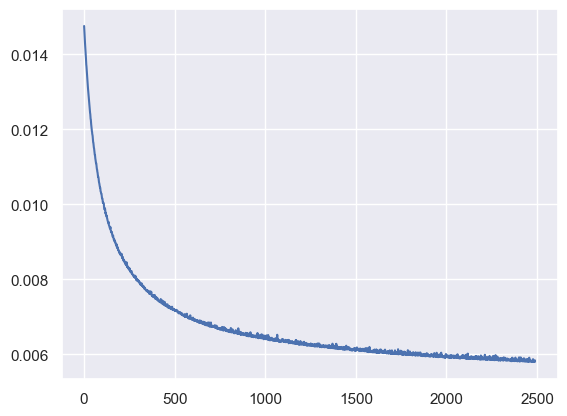

In [150]:
# plota as loss para ver se está treinando
plt.plot(historyteff.history['loss'][10:])

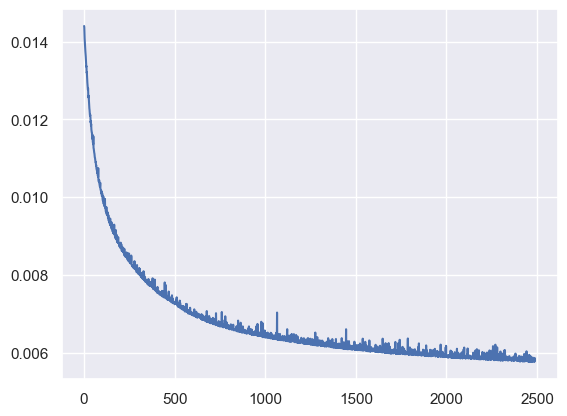

In [151]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyteff.history['val_loss'][10:]) #dar smoothie nas curvas kkkkkk para colocar no paper

##### Treinando LOGG

In [59]:
xtrain = csv.loc[(csv['SNRg_LAMOST']>10) & 
                 (csv['SNRi_LAMOST']>10) & 
                 (csv['SNRz_LAMOST']>10) & 
                 (csv['SNRr_LAMOST']>10) & 
                 (csv['teff_LAMOST']>4000) & 
                 (csv['teff_LAMOST']<7000),
                 ['u_0', 'J378_0', 'J395_0', 
                 'J410_0', 'J430_0', 'g_0', 
                 'J515_0', 'r_0', 'J660_0', 
                 'i_0', 'J861_0', 'z_0']]

In [60]:
ytrain = csv.loc[(csv['SNRg_LAMOST']>10) & 
                 (csv['SNRi_LAMOST']>10) & 
                 (csv['SNRz_LAMOST']>10) & 
                 (csv['SNRr_LAMOST']>10) & 
                 (csv['teff_LAMOST']>4000) & 
                 (csv['teff_LAMOST']<7000),
                 ['logg_training']]

In [46]:
xtrain = csv[['u_0', 'J378_0', 'J395_0', 
                 'J410_0', 'J430_0', 'g_0', 
                 'J515_0', 'r_0', 'J660_0', 
                 'i_0', 'J861_0', 'z_0']]

In [47]:
ytrain = csv[['logg_training']]

In [61]:
for column in xtrain:
    xtrain = cap_outliers(xtrain, column)

In [62]:
train_x= encoder.encode_DataFrame(xtrain, "lamost")#The input vector: 13 stellar colors; For example, it is an array with the shape of (189654,13);

#train_y= encoder.encode_DataFrame(ytrain, 'logg_training')
train_y= ytrain

In [63]:
# Separando a base para treino e para teste
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=11085)

In [64]:
# Separando a base de treino para utilizar como validação no treinamento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=11085)

In [65]:
bs = 3000

In [66]:
modellogg = baseline_model()

In [67]:
# Rodar os primeiros testes para ignorar os maiores loss                                                  (sample_weight=sample_weights, )
modellogg.fit(X_train, Y_train, epochs = 30, validation_data=(X_val, Y_val), batch_size = bs, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/30
13/13 - 2s - loss: 16.4858 - val_loss: 16.2862 - 2s/epoch - 186ms/step
Epoch 2/30
13/13 - 0s - loss: 16.2789 - val_loss: 16.1055 - 95ms/epoch - 7ms/step
Epoch 3/30
13/13 - 0s - loss: 16.0842 - val_loss: 15.8686 - 94ms/epoch - 7ms/step
Epoch 4/30
13/13 - 0s - loss: 15.7888 - val_loss: 15.4869 - 91ms/epoch - 7ms/step
Epoch 5/30
13/13 - 0s - loss: 15.3185 - val_loss: 14.8826 - 95ms/epoch - 7ms/step
Epoch 6/30
13/13 - 0s - loss: 14.5707 - val_loss: 13.9211 - 93ms/epoch - 7ms/step
Epoch 7/30
13/13 - 0s - loss: 13.4121 - val_loss: 12.4817 - 92ms/epoch - 7ms/step
Epoch 8/30
13/13 - 0s - loss: 11.7294 - val_loss: 10.4718 - 90ms/epoch - 7ms/step
Epoch 9/30
13/13 - 0s - loss: 9.4790 - val_loss: 7.9336 - 104ms/epoch - 8ms/step
Epoch 10/30
13/13 - 0s - loss: 6.8262 - val_loss: 5.2516 - 103ms/epoch - 8ms/step
Epoch 11/30
13/13 - 0s - loss: 4.3125 - val_loss: 3.1230 - 95ms/epoch - 7ms/step
Epoch 12/30
13/13 - 0s - loss: 2.5914 - val_loss: 1.9768 - 89ms/epoch - 7ms/step
Epoch 13/30
13/13 -

In [68]:
# Treinando e guardando o modelo                                                                                          (sample_weight=sample_weights, )
historylogg = modellogg.fit(X_train, Y_train, epochs = 3000, validation_data=(X_val, Y_val), batch_size = bs, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

# Salva o modelo treinado.
#modellogg.save('model/model_lamost_logg_V.h5') 

Epoch 1/3000
13/13 - 0s - loss: 0.3293 - val_loss: 0.3370 - 171ms/epoch - 13ms/step
Epoch 2/3000
13/13 - 0s - loss: 0.3246 - val_loss: 0.3325 - 97ms/epoch - 7ms/step
Epoch 3/3000
13/13 - 0s - loss: 0.3203 - val_loss: 0.3284 - 96ms/epoch - 7ms/step
Epoch 4/3000
13/13 - 0s - loss: 0.3164 - val_loss: 0.3246 - 94ms/epoch - 7ms/step
Epoch 5/3000
13/13 - 0s - loss: 0.3129 - val_loss: 0.3212 - 97ms/epoch - 7ms/step
Epoch 6/3000
13/13 - 0s - loss: 0.3096 - val_loss: 0.3181 - 94ms/epoch - 7ms/step
Epoch 7/3000
13/13 - 0s - loss: 0.3067 - val_loss: 0.3152 - 96ms/epoch - 7ms/step
Epoch 8/3000
13/13 - 0s - loss: 0.3040 - val_loss: 0.3125 - 94ms/epoch - 7ms/step
Epoch 9/3000
13/13 - 0s - loss: 0.3014 - val_loss: 0.3101 - 95ms/epoch - 7ms/step
Epoch 10/3000
13/13 - 0s - loss: 0.2991 - val_loss: 0.3078 - 102ms/epoch - 8ms/step
Epoch 11/3000
13/13 - 0s - loss: 0.2970 - val_loss: 0.3058 - 90ms/epoch - 7ms/step
Epoch 12/3000
13/13 - 0s - loss: 0.2950 - val_loss: 0.3039 - 92ms/epoch - 7ms/step
Epoch 13/3

Epoch 100/3000
13/13 - 0s - loss: 0.2459 - val_loss: 0.2578 - 102ms/epoch - 8ms/step
Epoch 101/3000
13/13 - 0s - loss: 0.2456 - val_loss: 0.2576 - 106ms/epoch - 8ms/step
Epoch 102/3000
13/13 - 0s - loss: 0.2454 - val_loss: 0.2574 - 96ms/epoch - 7ms/step
Epoch 103/3000
13/13 - 0s - loss: 0.2452 - val_loss: 0.2571 - 95ms/epoch - 7ms/step
Epoch 104/3000
13/13 - 0s - loss: 0.2449 - val_loss: 0.2567 - 96ms/epoch - 7ms/step
Epoch 105/3000
13/13 - 0s - loss: 0.2445 - val_loss: 0.2564 - 97ms/epoch - 7ms/step
Epoch 106/3000
13/13 - 0s - loss: 0.2444 - val_loss: 0.2561 - 97ms/epoch - 7ms/step
Epoch 107/3000
13/13 - 0s - loss: 0.2440 - val_loss: 0.2559 - 98ms/epoch - 8ms/step
Epoch 108/3000
13/13 - 0s - loss: 0.2438 - val_loss: 0.2557 - 97ms/epoch - 7ms/step
Epoch 109/3000
13/13 - 0s - loss: 0.2435 - val_loss: 0.2554 - 100ms/epoch - 8ms/step
Epoch 110/3000
13/13 - 0s - loss: 0.2432 - val_loss: 0.2551 - 98ms/epoch - 8ms/step
Epoch 111/3000
13/13 - 0s - loss: 0.2429 - val_loss: 0.2548 - 98ms/epoch 

Epoch 197/3000
13/13 - 0s - loss: 0.2140 - val_loss: 0.2244 - 101ms/epoch - 8ms/step
Epoch 198/3000
13/13 - 0s - loss: 0.2134 - val_loss: 0.2241 - 99ms/epoch - 8ms/step
Epoch 199/3000
13/13 - 0s - loss: 0.2129 - val_loss: 0.2234 - 100ms/epoch - 8ms/step
Epoch 200/3000
13/13 - 0s - loss: 0.2124 - val_loss: 0.2224 - 105ms/epoch - 8ms/step
Epoch 201/3000
13/13 - 0s - loss: 0.2119 - val_loss: 0.2219 - 101ms/epoch - 8ms/step
Epoch 202/3000
13/13 - 0s - loss: 0.2114 - val_loss: 0.2216 - 99ms/epoch - 8ms/step
Epoch 203/3000
13/13 - 0s - loss: 0.2114 - val_loss: 0.2209 - 99ms/epoch - 8ms/step
Epoch 204/3000
13/13 - 0s - loss: 0.2108 - val_loss: 0.2205 - 102ms/epoch - 8ms/step
Epoch 205/3000
13/13 - 0s - loss: 0.2099 - val_loss: 0.2194 - 98ms/epoch - 8ms/step
Epoch 206/3000
13/13 - 0s - loss: 0.2093 - val_loss: 0.2188 - 102ms/epoch - 8ms/step
Epoch 207/3000
13/13 - 0s - loss: 0.2088 - val_loss: 0.2182 - 99ms/epoch - 8ms/step
Epoch 208/3000
13/13 - 0s - loss: 0.2084 - val_loss: 0.2177 - 100ms/ep

Epoch 294/3000
13/13 - 0s - loss: 0.1497 - val_loss: 0.1512 - 99ms/epoch - 8ms/step
Epoch 295/3000
13/13 - 0s - loss: 0.1495 - val_loss: 0.1509 - 99ms/epoch - 8ms/step
Epoch 296/3000
13/13 - 0s - loss: 0.1481 - val_loss: 0.1486 - 101ms/epoch - 8ms/step
Epoch 297/3000
13/13 - 0s - loss: 0.1474 - val_loss: 0.1485 - 97ms/epoch - 7ms/step
Epoch 298/3000
13/13 - 0s - loss: 0.1465 - val_loss: 0.1475 - 103ms/epoch - 8ms/step
Epoch 299/3000
13/13 - 0s - loss: 0.1458 - val_loss: 0.1464 - 100ms/epoch - 8ms/step
Epoch 300/3000
13/13 - 0s - loss: 0.1450 - val_loss: 0.1456 - 100ms/epoch - 8ms/step
Epoch 301/3000
13/13 - 0s - loss: 0.1447 - val_loss: 0.1449 - 102ms/epoch - 8ms/step
Epoch 302/3000
13/13 - 0s - loss: 0.1434 - val_loss: 0.1437 - 100ms/epoch - 8ms/step
Epoch 303/3000
13/13 - 0s - loss: 0.1423 - val_loss: 0.1427 - 101ms/epoch - 8ms/step
Epoch 304/3000
13/13 - 0s - loss: 0.1416 - val_loss: 0.1419 - 95ms/epoch - 7ms/step
Epoch 305/3000
13/13 - 0s - loss: 0.1410 - val_loss: 0.1412 - 97ms/ep

Epoch 391/3000
13/13 - 0s - loss: 0.0973 - val_loss: 0.1006 - 101ms/epoch - 8ms/step
Epoch 392/3000
13/13 - 0s - loss: 0.0970 - val_loss: 0.1002 - 102ms/epoch - 8ms/step
Epoch 393/3000
13/13 - 0s - loss: 0.0966 - val_loss: 0.0992 - 98ms/epoch - 8ms/step
Epoch 394/3000
13/13 - 0s - loss: 0.0960 - val_loss: 0.0985 - 103ms/epoch - 8ms/step
Epoch 395/3000
13/13 - 0s - loss: 0.0956 - val_loss: 0.0983 - 100ms/epoch - 8ms/step
Epoch 396/3000
13/13 - 0s - loss: 0.0953 - val_loss: 0.0983 - 104ms/epoch - 8ms/step
Epoch 397/3000
13/13 - 0s - loss: 0.0950 - val_loss: 0.0978 - 101ms/epoch - 8ms/step
Epoch 398/3000
13/13 - 0s - loss: 0.0950 - val_loss: 0.0980 - 97ms/epoch - 7ms/step
Epoch 399/3000
13/13 - 0s - loss: 0.0946 - val_loss: 0.0979 - 99ms/epoch - 8ms/step
Epoch 400/3000
13/13 - 0s - loss: 0.0947 - val_loss: 0.0979 - 97ms/epoch - 7ms/step
Epoch 401/3000
13/13 - 0s - loss: 0.0947 - val_loss: 0.0974 - 97ms/epoch - 7ms/step
Epoch 402/3000
13/13 - 0s - loss: 0.0947 - val_loss: 0.0968 - 98ms/epo

Epoch 488/3000
13/13 - 0s - loss: 0.0823 - val_loss: 0.0870 - 105ms/epoch - 8ms/step
Epoch 489/3000
13/13 - 0s - loss: 0.0823 - val_loss: 0.0867 - 99ms/epoch - 8ms/step
Epoch 490/3000
13/13 - 0s - loss: 0.0823 - val_loss: 0.0868 - 98ms/epoch - 8ms/step
Epoch 491/3000
13/13 - 0s - loss: 0.0821 - val_loss: 0.0866 - 99ms/epoch - 8ms/step
Epoch 492/3000
13/13 - 0s - loss: 0.0821 - val_loss: 0.0865 - 102ms/epoch - 8ms/step
Epoch 493/3000
13/13 - 0s - loss: 0.0819 - val_loss: 0.0873 - 101ms/epoch - 8ms/step
Epoch 494/3000
13/13 - 0s - loss: 0.0819 - val_loss: 0.0872 - 101ms/epoch - 8ms/step
Epoch 495/3000
13/13 - 0s - loss: 0.0819 - val_loss: 0.0865 - 101ms/epoch - 8ms/step
Epoch 496/3000
13/13 - 0s - loss: 0.0818 - val_loss: 0.0867 - 101ms/epoch - 8ms/step
Epoch 497/3000
13/13 - 0s - loss: 0.0820 - val_loss: 0.0865 - 103ms/epoch - 8ms/step
Epoch 498/3000
13/13 - 0s - loss: 0.0817 - val_loss: 0.0861 - 101ms/epoch - 8ms/step
Epoch 499/3000
13/13 - 0s - loss: 0.0815 - val_loss: 0.0862 - 101ms/

Epoch 585/3000
13/13 - 0s - loss: 0.0768 - val_loss: 0.0808 - 99ms/epoch - 8ms/step
Epoch 586/3000
13/13 - 0s - loss: 0.0773 - val_loss: 0.0813 - 99ms/epoch - 8ms/step
Epoch 587/3000
13/13 - 0s - loss: 0.0769 - val_loss: 0.0812 - 101ms/epoch - 8ms/step
Epoch 588/3000
13/13 - 0s - loss: 0.0772 - val_loss: 0.0811 - 102ms/epoch - 8ms/step
Epoch 589/3000
13/13 - 0s - loss: 0.0770 - val_loss: 0.0809 - 112ms/epoch - 9ms/step
Epoch 590/3000
13/13 - 0s - loss: 0.0766 - val_loss: 0.0814 - 101ms/epoch - 8ms/step
Epoch 591/3000
13/13 - 0s - loss: 0.0766 - val_loss: 0.0807 - 99ms/epoch - 8ms/step
Epoch 592/3000
13/13 - 0s - loss: 0.0768 - val_loss: 0.0808 - 100ms/epoch - 8ms/step
Epoch 593/3000
13/13 - 0s - loss: 0.0766 - val_loss: 0.0805 - 101ms/epoch - 8ms/step
Epoch 594/3000
13/13 - 0s - loss: 0.0763 - val_loss: 0.0804 - 101ms/epoch - 8ms/step
Epoch 595/3000
13/13 - 0s - loss: 0.0763 - val_loss: 0.0803 - 100ms/epoch - 8ms/step
Epoch 596/3000
13/13 - 0s - loss: 0.0763 - val_loss: 0.0807 - 97ms/e

Epoch 682/3000
13/13 - 0s - loss: 0.0730 - val_loss: 0.0767 - 95ms/epoch - 7ms/step
Epoch 683/3000
13/13 - 0s - loss: 0.0730 - val_loss: 0.0771 - 96ms/epoch - 7ms/step
Epoch 684/3000
13/13 - 0s - loss: 0.0733 - val_loss: 0.0764 - 106ms/epoch - 8ms/step
Epoch 685/3000
13/13 - 0s - loss: 0.0729 - val_loss: 0.0767 - 100ms/epoch - 8ms/step
Epoch 686/3000
13/13 - 0s - loss: 0.0729 - val_loss: 0.0763 - 98ms/epoch - 8ms/step
Epoch 687/3000
13/13 - 0s - loss: 0.0728 - val_loss: 0.0768 - 108ms/epoch - 8ms/step
Epoch 688/3000
13/13 - 0s - loss: 0.0728 - val_loss: 0.0767 - 99ms/epoch - 8ms/step
Epoch 689/3000
13/13 - 0s - loss: 0.0729 - val_loss: 0.0762 - 100ms/epoch - 8ms/step
Epoch 690/3000
13/13 - 0s - loss: 0.0727 - val_loss: 0.0763 - 95ms/epoch - 7ms/step
Epoch 691/3000
13/13 - 0s - loss: 0.0728 - val_loss: 0.0760 - 96ms/epoch - 7ms/step
Epoch 692/3000
13/13 - 0s - loss: 0.0728 - val_loss: 0.0759 - 95ms/epoch - 7ms/step
Epoch 693/3000
13/13 - 0s - loss: 0.0727 - val_loss: 0.0760 - 94ms/epoch

Epoch 779/3000
13/13 - 0s - loss: 0.0699 - val_loss: 0.0730 - 102ms/epoch - 8ms/step
Epoch 780/3000
13/13 - 0s - loss: 0.0700 - val_loss: 0.0734 - 106ms/epoch - 8ms/step
Epoch 781/3000
13/13 - 0s - loss: 0.0700 - val_loss: 0.0730 - 100ms/epoch - 8ms/step
Epoch 782/3000
13/13 - 0s - loss: 0.0698 - val_loss: 0.0727 - 101ms/epoch - 8ms/step
Epoch 783/3000
13/13 - 0s - loss: 0.0702 - val_loss: 0.0755 - 99ms/epoch - 8ms/step
Epoch 784/3000
13/13 - 0s - loss: 0.0705 - val_loss: 0.0727 - 102ms/epoch - 8ms/step
Epoch 785/3000
13/13 - 0s - loss: 0.0697 - val_loss: 0.0727 - 104ms/epoch - 8ms/step
Epoch 786/3000
13/13 - 0s - loss: 0.0697 - val_loss: 0.0732 - 124ms/epoch - 10ms/step
Epoch 787/3000
13/13 - 0s - loss: 0.0697 - val_loss: 0.0727 - 109ms/epoch - 8ms/step
Epoch 788/3000
13/13 - 0s - loss: 0.0697 - val_loss: 0.0729 - 101ms/epoch - 8ms/step
Epoch 789/3000
13/13 - 0s - loss: 0.0697 - val_loss: 0.0728 - 105ms/epoch - 8ms/step
Epoch 790/3000
13/13 - 0s - loss: 0.0696 - val_loss: 0.0732 - 98m

Epoch 876/3000
13/13 - 0s - loss: 0.0674 - val_loss: 0.0704 - 104ms/epoch - 8ms/step
Epoch 877/3000
13/13 - 0s - loss: 0.0675 - val_loss: 0.0702 - 103ms/epoch - 8ms/step
Epoch 878/3000
13/13 - 0s - loss: 0.0674 - val_loss: 0.0703 - 94ms/epoch - 7ms/step
Epoch 879/3000
13/13 - 0s - loss: 0.0675 - val_loss: 0.0701 - 97ms/epoch - 7ms/step
Epoch 880/3000
13/13 - 0s - loss: 0.0674 - val_loss: 0.0702 - 102ms/epoch - 8ms/step
Epoch 881/3000
13/13 - 0s - loss: 0.0675 - val_loss: 0.0703 - 97ms/epoch - 7ms/step
Epoch 882/3000
13/13 - 0s - loss: 0.0675 - val_loss: 0.0703 - 100ms/epoch - 8ms/step
Epoch 883/3000
13/13 - 0s - loss: 0.0675 - val_loss: 0.0705 - 96ms/epoch - 7ms/step
Epoch 884/3000
13/13 - 0s - loss: 0.0672 - val_loss: 0.0701 - 99ms/epoch - 8ms/step
Epoch 885/3000
13/13 - 0s - loss: 0.0672 - val_loss: 0.0700 - 100ms/epoch - 8ms/step
Epoch 886/3000
13/13 - 0s - loss: 0.0672 - val_loss: 0.0704 - 100ms/epoch - 8ms/step
Epoch 887/3000
13/13 - 0s - loss: 0.0675 - val_loss: 0.0703 - 101ms/ep

Epoch 973/3000
13/13 - 0s - loss: 0.0656 - val_loss: 0.0681 - 103ms/epoch - 8ms/step
Epoch 974/3000
13/13 - 0s - loss: 0.0656 - val_loss: 0.0691 - 100ms/epoch - 8ms/step
Epoch 975/3000
13/13 - 0s - loss: 0.0656 - val_loss: 0.0682 - 109ms/epoch - 8ms/step
Epoch 976/3000
13/13 - 0s - loss: 0.0655 - val_loss: 0.0680 - 103ms/epoch - 8ms/step
Epoch 977/3000
13/13 - 0s - loss: 0.0653 - val_loss: 0.0682 - 98ms/epoch - 8ms/step
Epoch 978/3000
13/13 - 0s - loss: 0.0652 - val_loss: 0.0679 - 98ms/epoch - 8ms/step
Epoch 979/3000
13/13 - 0s - loss: 0.0651 - val_loss: 0.0681 - 95ms/epoch - 7ms/step
Epoch 980/3000
13/13 - 0s - loss: 0.0651 - val_loss: 0.0681 - 97ms/epoch - 7ms/step
Epoch 981/3000
13/13 - 0s - loss: 0.0651 - val_loss: 0.0682 - 97ms/epoch - 7ms/step
Epoch 982/3000
13/13 - 0s - loss: 0.0651 - val_loss: 0.0679 - 100ms/epoch - 8ms/step
Epoch 983/3000
13/13 - 0s - loss: 0.0653 - val_loss: 0.0678 - 99ms/epoch - 8ms/step
Epoch 984/3000
13/13 - 0s - loss: 0.0651 - val_loss: 0.0678 - 96ms/epoc

13/13 - 0s - loss: 0.0629 - val_loss: 0.0665 - 98ms/epoch - 8ms/step
Epoch 1070/3000
13/13 - 0s - loss: 0.0631 - val_loss: 0.0668 - 101ms/epoch - 8ms/step
Epoch 1071/3000
13/13 - 0s - loss: 0.0631 - val_loss: 0.0662 - 99ms/epoch - 8ms/step
Epoch 1072/3000
13/13 - 0s - loss: 0.0630 - val_loss: 0.0662 - 99ms/epoch - 8ms/step
Epoch 1073/3000
13/13 - 0s - loss: 0.0630 - val_loss: 0.0664 - 101ms/epoch - 8ms/step
Epoch 1074/3000
13/13 - 0s - loss: 0.0630 - val_loss: 0.0664 - 97ms/epoch - 7ms/step
Epoch 1075/3000
13/13 - 0s - loss: 0.0631 - val_loss: 0.0674 - 97ms/epoch - 7ms/step
Epoch 1076/3000
13/13 - 0s - loss: 0.0632 - val_loss: 0.0663 - 101ms/epoch - 8ms/step
Epoch 1077/3000
13/13 - 0s - loss: 0.0633 - val_loss: 0.0660 - 99ms/epoch - 8ms/step
Epoch 1078/3000
13/13 - 0s - loss: 0.0631 - val_loss: 0.0663 - 100ms/epoch - 8ms/step
Epoch 1079/3000
13/13 - 0s - loss: 0.0631 - val_loss: 0.0660 - 99ms/epoch - 8ms/step
Epoch 1080/3000
13/13 - 0s - loss: 0.0628 - val_loss: 0.0662 - 97ms/epoch - 7

Epoch 1165/3000
13/13 - 0s - loss: 0.0611 - val_loss: 0.0644 - 98ms/epoch - 8ms/step
Epoch 1166/3000
13/13 - 0s - loss: 0.0609 - val_loss: 0.0647 - 136ms/epoch - 10ms/step
Epoch 1167/3000
13/13 - 0s - loss: 0.0610 - val_loss: 0.0646 - 101ms/epoch - 8ms/step
Epoch 1168/3000
13/13 - 0s - loss: 0.0612 - val_loss: 0.0647 - 102ms/epoch - 8ms/step
Epoch 1169/3000
13/13 - 0s - loss: 0.0610 - val_loss: 0.0646 - 103ms/epoch - 8ms/step
Epoch 1170/3000
13/13 - 0s - loss: 0.0610 - val_loss: 0.0646 - 103ms/epoch - 8ms/step
Epoch 1171/3000
13/13 - 0s - loss: 0.0609 - val_loss: 0.0646 - 102ms/epoch - 8ms/step
Epoch 1172/3000
13/13 - 0s - loss: 0.0609 - val_loss: 0.0646 - 103ms/epoch - 8ms/step
Epoch 1173/3000
13/13 - 0s - loss: 0.0611 - val_loss: 0.0647 - 99ms/epoch - 8ms/step
Epoch 1174/3000
13/13 - 0s - loss: 0.0611 - val_loss: 0.0644 - 99ms/epoch - 8ms/step
Epoch 1175/3000
13/13 - 0s - loss: 0.0608 - val_loss: 0.0644 - 101ms/epoch - 8ms/step
Epoch 1176/3000
13/13 - 0s - loss: 0.0607 - val_loss: 0.

Epoch 1261/3000
13/13 - 0s - loss: 0.0596 - val_loss: 0.0632 - 102ms/epoch - 8ms/step
Epoch 1262/3000
13/13 - 0s - loss: 0.0596 - val_loss: 0.0631 - 100ms/epoch - 8ms/step
Epoch 1263/3000
13/13 - 0s - loss: 0.0596 - val_loss: 0.0634 - 101ms/epoch - 8ms/step
Epoch 1264/3000
13/13 - 0s - loss: 0.0598 - val_loss: 0.0637 - 100ms/epoch - 8ms/step
Epoch 1265/3000
13/13 - 0s - loss: 0.0596 - val_loss: 0.0632 - 103ms/epoch - 8ms/step
Epoch 1266/3000
13/13 - 0s - loss: 0.0595 - val_loss: 0.0635 - 100ms/epoch - 8ms/step
Epoch 1267/3000
13/13 - 0s - loss: 0.0597 - val_loss: 0.0631 - 102ms/epoch - 8ms/step
Epoch 1268/3000
13/13 - 0s - loss: 0.0596 - val_loss: 0.0631 - 104ms/epoch - 8ms/step
Epoch 1269/3000
13/13 - 0s - loss: 0.0596 - val_loss: 0.0631 - 99ms/epoch - 8ms/step
Epoch 1270/3000
13/13 - 0s - loss: 0.0594 - val_loss: 0.0631 - 99ms/epoch - 8ms/step
Epoch 1271/3000
13/13 - 0s - loss: 0.0594 - val_loss: 0.0630 - 101ms/epoch - 8ms/step
Epoch 1272/3000
13/13 - 0s - loss: 0.0595 - val_loss: 0.

Epoch 1357/3000
13/13 - 0s - loss: 0.0587 - val_loss: 0.0627 - 99ms/epoch - 8ms/step
Epoch 1358/3000
13/13 - 0s - loss: 0.0586 - val_loss: 0.0625 - 104ms/epoch - 8ms/step
Epoch 1359/3000
13/13 - 0s - loss: 0.0585 - val_loss: 0.0622 - 101ms/epoch - 8ms/step
Epoch 1360/3000
13/13 - 0s - loss: 0.0584 - val_loss: 0.0627 - 100ms/epoch - 8ms/step
Epoch 1361/3000
13/13 - 0s - loss: 0.0585 - val_loss: 0.0624 - 104ms/epoch - 8ms/step
Epoch 1362/3000
13/13 - 0s - loss: 0.0585 - val_loss: 0.0625 - 101ms/epoch - 8ms/step
Epoch 1363/3000
13/13 - 0s - loss: 0.0584 - val_loss: 0.0625 - 99ms/epoch - 8ms/step
Epoch 1364/3000
13/13 - 0s - loss: 0.0584 - val_loss: 0.0624 - 99ms/epoch - 8ms/step
Epoch 1365/3000
13/13 - 0s - loss: 0.0585 - val_loss: 0.0633 - 101ms/epoch - 8ms/step
Epoch 1366/3000
13/13 - 0s - loss: 0.0587 - val_loss: 0.0628 - 99ms/epoch - 8ms/step
Epoch 1367/3000
13/13 - 0s - loss: 0.0585 - val_loss: 0.0627 - 100ms/epoch - 8ms/step
Epoch 1368/3000
13/13 - 0s - loss: 0.0585 - val_loss: 0.06

Epoch 1453/3000
13/13 - 0s - loss: 0.0574 - val_loss: 0.0615 - 99ms/epoch - 8ms/step
Epoch 1454/3000
13/13 - 0s - loss: 0.0574 - val_loss: 0.0615 - 99ms/epoch - 8ms/step
Epoch 1455/3000
13/13 - 0s - loss: 0.0575 - val_loss: 0.0616 - 97ms/epoch - 7ms/step
Epoch 1456/3000
13/13 - 0s - loss: 0.0575 - val_loss: 0.0616 - 103ms/epoch - 8ms/step
Epoch 1457/3000
13/13 - 0s - loss: 0.0576 - val_loss: 0.0614 - 99ms/epoch - 8ms/step
Epoch 1458/3000
13/13 - 0s - loss: 0.0574 - val_loss: 0.0616 - 99ms/epoch - 8ms/step
Epoch 1459/3000
13/13 - 0s - loss: 0.0574 - val_loss: 0.0620 - 98ms/epoch - 8ms/step
Epoch 1460/3000
13/13 - 0s - loss: 0.0577 - val_loss: 0.0617 - 102ms/epoch - 8ms/step
Epoch 1461/3000
13/13 - 0s - loss: 0.0576 - val_loss: 0.0617 - 105ms/epoch - 8ms/step
Epoch 1462/3000
13/13 - 0s - loss: 0.0575 - val_loss: 0.0618 - 101ms/epoch - 8ms/step
Epoch 1463/3000
13/13 - 0s - loss: 0.0574 - val_loss: 0.0613 - 98ms/epoch - 8ms/step
Epoch 1464/3000
13/13 - 0s - loss: 0.0574 - val_loss: 0.0613 

Epoch 1549/3000
13/13 - 0s - loss: 0.0569 - val_loss: 0.0608 - 101ms/epoch - 8ms/step
Epoch 1550/3000
13/13 - 0s - loss: 0.0566 - val_loss: 0.0607 - 97ms/epoch - 7ms/step
Epoch 1551/3000
13/13 - 0s - loss: 0.0566 - val_loss: 0.0607 - 98ms/epoch - 8ms/step
Epoch 1552/3000
13/13 - 0s - loss: 0.0568 - val_loss: 0.0607 - 103ms/epoch - 8ms/step
Epoch 1553/3000
13/13 - 0s - loss: 0.0566 - val_loss: 0.0608 - 100ms/epoch - 8ms/step
Epoch 1554/3000
13/13 - 0s - loss: 0.0567 - val_loss: 0.0612 - 100ms/epoch - 8ms/step
Epoch 1555/3000
13/13 - 0s - loss: 0.0566 - val_loss: 0.0605 - 101ms/epoch - 8ms/step
Epoch 1556/3000
13/13 - 0s - loss: 0.0566 - val_loss: 0.0606 - 97ms/epoch - 7ms/step
Epoch 1557/3000
13/13 - 0s - loss: 0.0569 - val_loss: 0.0629 - 99ms/epoch - 8ms/step
Epoch 1558/3000
13/13 - 0s - loss: 0.0576 - val_loss: 0.0612 - 98ms/epoch - 8ms/step
Epoch 1559/3000
13/13 - 0s - loss: 0.0566 - val_loss: 0.0605 - 100ms/epoch - 8ms/step
Epoch 1560/3000
13/13 - 0s - loss: 0.0566 - val_loss: 0.060

Epoch 1645/3000
13/13 - 0s - loss: 0.0563 - val_loss: 0.0600 - 98ms/epoch - 8ms/step
Epoch 1646/3000
13/13 - 0s - loss: 0.0562 - val_loss: 0.0600 - 99ms/epoch - 8ms/step
Epoch 1647/3000
13/13 - 0s - loss: 0.0561 - val_loss: 0.0599 - 96ms/epoch - 7ms/step
Epoch 1648/3000
13/13 - 0s - loss: 0.0559 - val_loss: 0.0600 - 100ms/epoch - 8ms/step
Epoch 1649/3000
13/13 - 0s - loss: 0.0559 - val_loss: 0.0603 - 103ms/epoch - 8ms/step
Epoch 1650/3000
13/13 - 0s - loss: 0.0561 - val_loss: 0.0606 - 103ms/epoch - 8ms/step
Epoch 1651/3000
13/13 - 0s - loss: 0.0559 - val_loss: 0.0600 - 102ms/epoch - 8ms/step
Epoch 1652/3000
13/13 - 0s - loss: 0.0558 - val_loss: 0.0602 - 101ms/epoch - 8ms/step
Epoch 1653/3000
13/13 - 0s - loss: 0.0563 - val_loss: 0.0603 - 107ms/epoch - 8ms/step
Epoch 1654/3000
13/13 - 0s - loss: 0.0559 - val_loss: 0.0598 - 100ms/epoch - 8ms/step
Epoch 1655/3000
13/13 - 0s - loss: 0.0558 - val_loss: 0.0604 - 102ms/epoch - 8ms/step
Epoch 1656/3000
13/13 - 0s - loss: 0.0560 - val_loss: 0.0

Epoch 1741/3000
13/13 - 0s - loss: 0.0553 - val_loss: 0.0592 - 102ms/epoch - 8ms/step
Epoch 1742/3000
13/13 - 0s - loss: 0.0556 - val_loss: 0.0604 - 102ms/epoch - 8ms/step
Epoch 1743/3000
13/13 - 0s - loss: 0.0558 - val_loss: 0.0598 - 99ms/epoch - 8ms/step
Epoch 1744/3000
13/13 - 0s - loss: 0.0554 - val_loss: 0.0596 - 99ms/epoch - 8ms/step
Epoch 1745/3000
13/13 - 0s - loss: 0.0554 - val_loss: 0.0594 - 108ms/epoch - 8ms/step
Epoch 1746/3000
13/13 - 0s - loss: 0.0552 - val_loss: 0.0597 - 108ms/epoch - 8ms/step
Epoch 1747/3000
13/13 - 0s - loss: 0.0554 - val_loss: 0.0595 - 99ms/epoch - 8ms/step
Epoch 1748/3000
13/13 - 0s - loss: 0.0553 - val_loss: 0.0597 - 101ms/epoch - 8ms/step
Epoch 1749/3000
13/13 - 0s - loss: 0.0553 - val_loss: 0.0597 - 101ms/epoch - 8ms/step
Epoch 1750/3000
13/13 - 0s - loss: 0.0553 - val_loss: 0.0599 - 98ms/epoch - 8ms/step
Epoch 1751/3000
13/13 - 0s - loss: 0.0557 - val_loss: 0.0597 - 103ms/epoch - 8ms/step
Epoch 1752/3000
13/13 - 0s - loss: 0.0556 - val_loss: 0.06

Epoch 1837/3000
13/13 - 0s - loss: 0.0551 - val_loss: 0.0591 - 103ms/epoch - 8ms/step
Epoch 1838/3000
13/13 - 0s - loss: 0.0546 - val_loss: 0.0590 - 102ms/epoch - 8ms/step
Epoch 1839/3000
13/13 - 0s - loss: 0.0547 - val_loss: 0.0592 - 101ms/epoch - 8ms/step
Epoch 1840/3000
13/13 - 0s - loss: 0.0547 - val_loss: 0.0587 - 96ms/epoch - 7ms/step
Epoch 1841/3000
13/13 - 0s - loss: 0.0546 - val_loss: 0.0588 - 100ms/epoch - 8ms/step
Epoch 1842/3000
13/13 - 0s - loss: 0.0547 - val_loss: 0.0586 - 101ms/epoch - 8ms/step
Epoch 1843/3000
13/13 - 0s - loss: 0.0546 - val_loss: 0.0589 - 101ms/epoch - 8ms/step
Epoch 1844/3000
13/13 - 0s - loss: 0.0546 - val_loss: 0.0588 - 100ms/epoch - 8ms/step
Epoch 1845/3000
13/13 - 0s - loss: 0.0545 - val_loss: 0.0591 - 99ms/epoch - 8ms/step
Epoch 1846/3000
13/13 - 0s - loss: 0.0546 - val_loss: 0.0595 - 99ms/epoch - 8ms/step
Epoch 1847/3000
13/13 - 0s - loss: 0.0548 - val_loss: 0.0586 - 101ms/epoch - 8ms/step
Epoch 1848/3000
13/13 - 0s - loss: 0.0546 - val_loss: 0.0

Epoch 1933/3000
13/13 - 0s - loss: 0.0541 - val_loss: 0.0587 - 101ms/epoch - 8ms/step
Epoch 1934/3000
13/13 - 0s - loss: 0.0544 - val_loss: 0.0586 - 100ms/epoch - 8ms/step
Epoch 1935/3000
13/13 - 0s - loss: 0.0544 - val_loss: 0.0586 - 101ms/epoch - 8ms/step
Epoch 1936/3000
13/13 - 0s - loss: 0.0542 - val_loss: 0.0587 - 102ms/epoch - 8ms/step
Epoch 1937/3000
13/13 - 0s - loss: 0.0541 - val_loss: 0.0583 - 102ms/epoch - 8ms/step
Epoch 1938/3000
13/13 - 0s - loss: 0.0541 - val_loss: 0.0582 - 101ms/epoch - 8ms/step
Epoch 1939/3000
13/13 - 0s - loss: 0.0541 - val_loss: 0.0583 - 101ms/epoch - 8ms/step
Epoch 1940/3000
13/13 - 0s - loss: 0.0541 - val_loss: 0.0583 - 103ms/epoch - 8ms/step
Epoch 1941/3000
13/13 - 0s - loss: 0.0542 - val_loss: 0.0589 - 101ms/epoch - 8ms/step
Epoch 1942/3000
13/13 - 0s - loss: 0.0541 - val_loss: 0.0584 - 102ms/epoch - 8ms/step
Epoch 1943/3000
13/13 - 0s - loss: 0.0542 - val_loss: 0.0584 - 105ms/epoch - 8ms/step
Epoch 1944/3000
13/13 - 0s - loss: 0.0541 - val_loss: 

Epoch 2029/3000
13/13 - 0s - loss: 0.0536 - val_loss: 0.0578 - 100ms/epoch - 8ms/step
Epoch 2030/3000
13/13 - 0s - loss: 0.0536 - val_loss: 0.0579 - 104ms/epoch - 8ms/step
Epoch 2031/3000
13/13 - 0s - loss: 0.0536 - val_loss: 0.0579 - 100ms/epoch - 8ms/step
Epoch 2032/3000
13/13 - 0s - loss: 0.0535 - val_loss: 0.0577 - 105ms/epoch - 8ms/step
Epoch 2033/3000
13/13 - 0s - loss: 0.0535 - val_loss: 0.0581 - 102ms/epoch - 8ms/step
Epoch 2034/3000
13/13 - 0s - loss: 0.0537 - val_loss: 0.0579 - 104ms/epoch - 8ms/step
Epoch 2035/3000
13/13 - 0s - loss: 0.0535 - val_loss: 0.0581 - 103ms/epoch - 8ms/step
Epoch 2036/3000
13/13 - 0s - loss: 0.0536 - val_loss: 0.0579 - 99ms/epoch - 8ms/step
Epoch 2037/3000
13/13 - 0s - loss: 0.0539 - val_loss: 0.0581 - 102ms/epoch - 8ms/step
Epoch 2038/3000
13/13 - 0s - loss: 0.0538 - val_loss: 0.0579 - 101ms/epoch - 8ms/step
Epoch 2039/3000
13/13 - 0s - loss: 0.0535 - val_loss: 0.0588 - 101ms/epoch - 8ms/step
Epoch 2040/3000
13/13 - 0s - loss: 0.0538 - val_loss: 0

Epoch 2125/3000
13/13 - 0s - loss: 0.0532 - val_loss: 0.0577 - 97ms/epoch - 7ms/step
Epoch 2126/3000
13/13 - 0s - loss: 0.0534 - val_loss: 0.0579 - 99ms/epoch - 8ms/step
Epoch 2127/3000
13/13 - 0s - loss: 0.0533 - val_loss: 0.0582 - 97ms/epoch - 7ms/step
Epoch 2128/3000
13/13 - 0s - loss: 0.0536 - val_loss: 0.0584 - 99ms/epoch - 8ms/step
Epoch 2129/3000
13/13 - 0s - loss: 0.0534 - val_loss: 0.0573 - 97ms/epoch - 7ms/step
Epoch 2130/3000
13/13 - 0s - loss: 0.0530 - val_loss: 0.0574 - 97ms/epoch - 7ms/step
Epoch 2131/3000
13/13 - 0s - loss: 0.0531 - val_loss: 0.0572 - 100ms/epoch - 8ms/step
Epoch 2132/3000
13/13 - 0s - loss: 0.0531 - val_loss: 0.0581 - 97ms/epoch - 7ms/step
Epoch 2133/3000
13/13 - 0s - loss: 0.0531 - val_loss: 0.0588 - 101ms/epoch - 8ms/step
Epoch 2134/3000
13/13 - 0s - loss: 0.0536 - val_loss: 0.0575 - 102ms/epoch - 8ms/step
Epoch 2135/3000
13/13 - 0s - loss: 0.0531 - val_loss: 0.0573 - 98ms/epoch - 8ms/step
Epoch 2136/3000
13/13 - 0s - loss: 0.0532 - val_loss: 0.0579 -

Epoch 2221/3000
13/13 - 0s - loss: 0.0529 - val_loss: 0.0579 - 106ms/epoch - 8ms/step
Epoch 2222/3000
13/13 - 0s - loss: 0.0532 - val_loss: 0.0570 - 102ms/epoch - 8ms/step
Epoch 2223/3000
13/13 - 0s - loss: 0.0528 - val_loss: 0.0574 - 104ms/epoch - 8ms/step
Epoch 2224/3000
13/13 - 0s - loss: 0.0527 - val_loss: 0.0579 - 104ms/epoch - 8ms/step
Epoch 2225/3000
13/13 - 0s - loss: 0.0530 - val_loss: 0.0573 - 102ms/epoch - 8ms/step
Epoch 2226/3000
13/13 - 0s - loss: 0.0532 - val_loss: 0.0570 - 106ms/epoch - 8ms/step
Epoch 2227/3000
13/13 - 0s - loss: 0.0530 - val_loss: 0.0572 - 100ms/epoch - 8ms/step
Epoch 2228/3000
13/13 - 0s - loss: 0.0530 - val_loss: 0.0573 - 102ms/epoch - 8ms/step
Epoch 2229/3000
13/13 - 0s - loss: 0.0529 - val_loss: 0.0570 - 105ms/epoch - 8ms/step
Epoch 2230/3000
13/13 - 0s - loss: 0.0527 - val_loss: 0.0570 - 105ms/epoch - 8ms/step
Epoch 2231/3000
13/13 - 0s - loss: 0.0526 - val_loss: 0.0575 - 107ms/epoch - 8ms/step
Epoch 2232/3000
13/13 - 0s - loss: 0.0529 - val_loss: 

Epoch 2317/3000
13/13 - 0s - loss: 0.0525 - val_loss: 0.0566 - 103ms/epoch - 8ms/step
Epoch 2318/3000
13/13 - 0s - loss: 0.0523 - val_loss: 0.0572 - 108ms/epoch - 8ms/step
Epoch 2319/3000
13/13 - 0s - loss: 0.0524 - val_loss: 0.0568 - 102ms/epoch - 8ms/step
Epoch 2320/3000
13/13 - 0s - loss: 0.0524 - val_loss: 0.0565 - 100ms/epoch - 8ms/step
Epoch 2321/3000
13/13 - 0s - loss: 0.0524 - val_loss: 0.0567 - 101ms/epoch - 8ms/step
Epoch 2322/3000
13/13 - 0s - loss: 0.0522 - val_loss: 0.0567 - 106ms/epoch - 8ms/step
Epoch 2323/3000
13/13 - 0s - loss: 0.0522 - val_loss: 0.0567 - 105ms/epoch - 8ms/step
Epoch 2324/3000
13/13 - 0s - loss: 0.0521 - val_loss: 0.0571 - 105ms/epoch - 8ms/step
Epoch 2325/3000
13/13 - 0s - loss: 0.0525 - val_loss: 0.0592 - 111ms/epoch - 9ms/step
Epoch 2326/3000
13/13 - 0s - loss: 0.0532 - val_loss: 0.0569 - 108ms/epoch - 8ms/step
Epoch 2327/3000
13/13 - 0s - loss: 0.0523 - val_loss: 0.0570 - 103ms/epoch - 8ms/step
Epoch 2328/3000
13/13 - 0s - loss: 0.0524 - val_loss: 

Epoch 2413/3000
13/13 - 0s - loss: 0.0521 - val_loss: 0.0567 - 101ms/epoch - 8ms/step
Epoch 2414/3000
13/13 - 0s - loss: 0.0521 - val_loss: 0.0571 - 100ms/epoch - 8ms/step
Epoch 2415/3000
13/13 - 0s - loss: 0.0520 - val_loss: 0.0569 - 96ms/epoch - 7ms/step
Epoch 2416/3000
13/13 - 0s - loss: 0.0518 - val_loss: 0.0565 - 96ms/epoch - 7ms/step
Epoch 2417/3000
13/13 - 0s - loss: 0.0519 - val_loss: 0.0563 - 100ms/epoch - 8ms/step
Epoch 2418/3000
13/13 - 0s - loss: 0.0520 - val_loss: 0.0564 - 103ms/epoch - 8ms/step
Epoch 2419/3000
13/13 - 0s - loss: 0.0522 - val_loss: 0.0571 - 99ms/epoch - 8ms/step
Epoch 2420/3000
13/13 - 0s - loss: 0.0520 - val_loss: 0.0565 - 98ms/epoch - 8ms/step
Epoch 2421/3000
13/13 - 0s - loss: 0.0520 - val_loss: 0.0568 - 100ms/epoch - 8ms/step
Epoch 2422/3000
13/13 - 0s - loss: 0.0522 - val_loss: 0.0566 - 97ms/epoch - 7ms/step
Epoch 2423/3000
13/13 - 0s - loss: 0.0522 - val_loss: 0.0563 - 99ms/epoch - 8ms/step
Epoch 2424/3000
13/13 - 0s - loss: 0.0522 - val_loss: 0.0572

Epoch 2509/3000
13/13 - 0s - loss: 0.0519 - val_loss: 0.0562 - 96ms/epoch - 7ms/step
Epoch 2510/3000
13/13 - 0s - loss: 0.0517 - val_loss: 0.0565 - 99ms/epoch - 8ms/step
Epoch 2511/3000
13/13 - 0s - loss: 0.0518 - val_loss: 0.0564 - 104ms/epoch - 8ms/step
Epoch 2512/3000
13/13 - 0s - loss: 0.0517 - val_loss: 0.0560 - 99ms/epoch - 8ms/step
Epoch 2513/3000
13/13 - 0s - loss: 0.0518 - val_loss: 0.0562 - 104ms/epoch - 8ms/step
Epoch 2514/3000
13/13 - 0s - loss: 0.0515 - val_loss: 0.0563 - 95ms/epoch - 7ms/step
Epoch 2515/3000
13/13 - 0s - loss: 0.0516 - val_loss: 0.0563 - 100ms/epoch - 8ms/step
Epoch 2516/3000
13/13 - 0s - loss: 0.0516 - val_loss: 0.0563 - 101ms/epoch - 8ms/step
Epoch 2517/3000
13/13 - 0s - loss: 0.0517 - val_loss: 0.0566 - 102ms/epoch - 8ms/step
Epoch 2518/3000
13/13 - 0s - loss: 0.0520 - val_loss: 0.0567 - 102ms/epoch - 8ms/step
Epoch 2519/3000
13/13 - 0s - loss: 0.0517 - val_loss: 0.0565 - 97ms/epoch - 7ms/step
Epoch 2520/3000
13/13 - 0s - loss: 0.0521 - val_loss: 0.056

Epoch 2605/3000
13/13 - 0s - loss: 0.0517 - val_loss: 0.0564 - 100ms/epoch - 8ms/step
Epoch 2606/3000
13/13 - 0s - loss: 0.0516 - val_loss: 0.0566 - 99ms/epoch - 8ms/step
Epoch 2607/3000
13/13 - 0s - loss: 0.0516 - val_loss: 0.0561 - 102ms/epoch - 8ms/step
Epoch 2608/3000
13/13 - 0s - loss: 0.0513 - val_loss: 0.0562 - 104ms/epoch - 8ms/step
Epoch 2609/3000
13/13 - 0s - loss: 0.0515 - val_loss: 0.0561 - 99ms/epoch - 8ms/step
Epoch 2610/3000
13/13 - 0s - loss: 0.0519 - val_loss: 0.0567 - 102ms/epoch - 8ms/step
Epoch 2611/3000
13/13 - 0s - loss: 0.0518 - val_loss: 0.0565 - 100ms/epoch - 8ms/step
Epoch 2612/3000
13/13 - 0s - loss: 0.0514 - val_loss: 0.0573 - 98ms/epoch - 8ms/step
Epoch 2613/3000
13/13 - 0s - loss: 0.0515 - val_loss: 0.0559 - 98ms/epoch - 8ms/step
Epoch 2614/3000
13/13 - 0s - loss: 0.0513 - val_loss: 0.0558 - 97ms/epoch - 7ms/step
Epoch 2615/3000
13/13 - 0s - loss: 0.0513 - val_loss: 0.0562 - 98ms/epoch - 8ms/step
Epoch 2616/3000
13/13 - 0s - loss: 0.0512 - val_loss: 0.0563

Epoch 2701/3000
13/13 - 0s - loss: 0.0510 - val_loss: 0.0563 - 105ms/epoch - 8ms/step
Epoch 2702/3000
13/13 - 0s - loss: 0.0513 - val_loss: 0.0562 - 100ms/epoch - 8ms/step
Epoch 2703/3000
13/13 - 0s - loss: 0.0512 - val_loss: 0.0560 - 107ms/epoch - 8ms/step
Epoch 2704/3000
13/13 - 0s - loss: 0.0516 - val_loss: 0.0564 - 102ms/epoch - 8ms/step
Epoch 2705/3000
13/13 - 0s - loss: 0.0513 - val_loss: 0.0555 - 105ms/epoch - 8ms/step
Epoch 2706/3000
13/13 - 0s - loss: 0.0510 - val_loss: 0.0556 - 102ms/epoch - 8ms/step
Epoch 2707/3000
13/13 - 0s - loss: 0.0508 - val_loss: 0.0555 - 103ms/epoch - 8ms/step
Epoch 2708/3000
13/13 - 0s - loss: 0.0508 - val_loss: 0.0559 - 103ms/epoch - 8ms/step
Epoch 2709/3000
13/13 - 0s - loss: 0.0510 - val_loss: 0.0557 - 116ms/epoch - 9ms/step
Epoch 2710/3000
13/13 - 0s - loss: 0.0509 - val_loss: 0.0558 - 106ms/epoch - 8ms/step
Epoch 2711/3000
13/13 - 0s - loss: 0.0511 - val_loss: 0.0564 - 102ms/epoch - 8ms/step
Epoch 2712/3000
13/13 - 0s - loss: 0.0511 - val_loss: 

Epoch 2797/3000
13/13 - 0s - loss: 0.0508 - val_loss: 0.0557 - 100ms/epoch - 8ms/step
Epoch 2798/3000
13/13 - 0s - loss: 0.0508 - val_loss: 0.0556 - 103ms/epoch - 8ms/step
Epoch 2799/3000
13/13 - 0s - loss: 0.0506 - val_loss: 0.0555 - 100ms/epoch - 8ms/step
Epoch 2800/3000
13/13 - 0s - loss: 0.0507 - val_loss: 0.0553 - 103ms/epoch - 8ms/step
Epoch 2801/3000
13/13 - 0s - loss: 0.0506 - val_loss: 0.0558 - 99ms/epoch - 8ms/step
Epoch 2802/3000
13/13 - 0s - loss: 0.0509 - val_loss: 0.0561 - 103ms/epoch - 8ms/step
Epoch 2803/3000
13/13 - 0s - loss: 0.0509 - val_loss: 0.0555 - 104ms/epoch - 8ms/step
Epoch 2804/3000
13/13 - 0s - loss: 0.0510 - val_loss: 0.0555 - 102ms/epoch - 8ms/step
Epoch 2805/3000
13/13 - 0s - loss: 0.0508 - val_loss: 0.0559 - 102ms/epoch - 8ms/step
Epoch 2806/3000
13/13 - 0s - loss: 0.0508 - val_loss: 0.0554 - 103ms/epoch - 8ms/step
Epoch 2807/3000
13/13 - 0s - loss: 0.0510 - val_loss: 0.0555 - 100ms/epoch - 8ms/step
Epoch 2808/3000
13/13 - 0s - loss: 0.0508 - val_loss: 0

Epoch 2893/3000
13/13 - 0s - loss: 0.0504 - val_loss: 0.0557 - 99ms/epoch - 8ms/step
Epoch 2894/3000
13/13 - 0s - loss: 0.0507 - val_loss: 0.0556 - 99ms/epoch - 8ms/step
Epoch 2895/3000
13/13 - 0s - loss: 0.0507 - val_loss: 0.0556 - 97ms/epoch - 7ms/step
Epoch 2896/3000
13/13 - 0s - loss: 0.0507 - val_loss: 0.0553 - 103ms/epoch - 8ms/step
Epoch 2897/3000
13/13 - 0s - loss: 0.0504 - val_loss: 0.0552 - 101ms/epoch - 8ms/step
Epoch 2898/3000
13/13 - 0s - loss: 0.0504 - val_loss: 0.0551 - 102ms/epoch - 8ms/step
Epoch 2899/3000
13/13 - 0s - loss: 0.0504 - val_loss: 0.0555 - 98ms/epoch - 8ms/step
Epoch 2900/3000
13/13 - 0s - loss: 0.0506 - val_loss: 0.0553 - 102ms/epoch - 8ms/step
Epoch 2901/3000
13/13 - 0s - loss: 0.0505 - val_loss: 0.0556 - 98ms/epoch - 8ms/step
Epoch 2902/3000
13/13 - 0s - loss: 0.0504 - val_loss: 0.0552 - 101ms/epoch - 8ms/step
Epoch 2903/3000
13/13 - 0s - loss: 0.0504 - val_loss: 0.0551 - 100ms/epoch - 8ms/step
Epoch 2904/3000
13/13 - 0s - loss: 0.0502 - val_loss: 0.055

Epoch 2989/3000
13/13 - 0s - loss: 0.0502 - val_loss: 0.0551 - 102ms/epoch - 8ms/step
Epoch 2990/3000
13/13 - 0s - loss: 0.0503 - val_loss: 0.0554 - 103ms/epoch - 8ms/step
Epoch 2991/3000
13/13 - 0s - loss: 0.0505 - val_loss: 0.0558 - 105ms/epoch - 8ms/step
Epoch 2992/3000
13/13 - 0s - loss: 0.0505 - val_loss: 0.0557 - 109ms/epoch - 8ms/step
Epoch 2993/3000
13/13 - 0s - loss: 0.0505 - val_loss: 0.0552 - 109ms/epoch - 8ms/step
Epoch 2994/3000
13/13 - 0s - loss: 0.0502 - val_loss: 0.0547 - 106ms/epoch - 8ms/step
Epoch 2995/3000
13/13 - 0s - loss: 0.0500 - val_loss: 0.0548 - 120ms/epoch - 9ms/step
Epoch 2996/3000
13/13 - 0s - loss: 0.0501 - val_loss: 0.0556 - 104ms/epoch - 8ms/step
Epoch 2997/3000
13/13 - 0s - loss: 0.0504 - val_loss: 0.0552 - 108ms/epoch - 8ms/step
Epoch 2998/3000
13/13 - 0s - loss: 0.0505 - val_loss: 0.0552 - 108ms/epoch - 8ms/step
Epoch 2999/3000
13/13 - 0s - loss: 0.0502 - val_loss: 0.0552 - 105ms/epoch - 8ms/step
Epoch 3000/3000
13/13 - 0s - loss: 0.0502 - val_loss: 

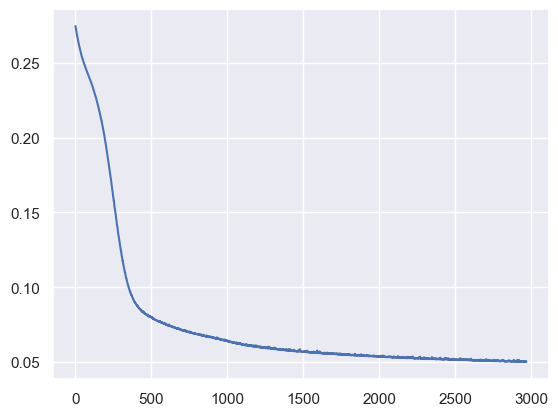

In [69]:
# plota as loss para ver se está treinando
plt.plot(historylogg.history['loss'][30:])

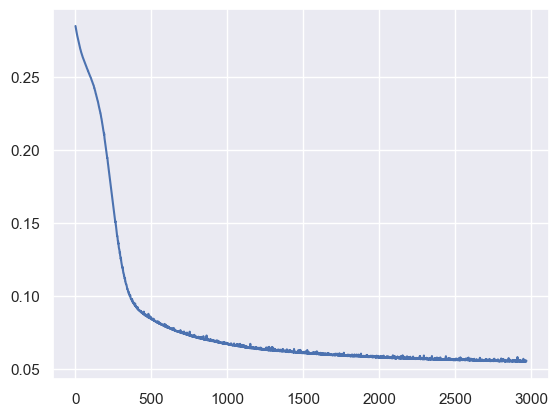

In [70]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historylogg.history['val_loss'][30:]) #dar smoothie nas curvas kkkkkk para colocar no paper

##### Treinando FEH

In [119]:
xtrain = csv.loc[(csv['SNRg_LAMOST']>10) & 
                 (csv['SNRi_LAMOST']>10) & 
                 (csv['SNRz_LAMOST']>10) & 
                 (csv['SNRr_LAMOST']>10) & 
                 (csv['teff_LAMOST']>4000) & 
                 (csv['teff_LAMOST']<7000),
                 ['u_0', 'J378_0', 'J395_0', 
                 'J410_0', 'J430_0', 'g_0', 
                 'J515_0', 'r_0', 'J660_0', 
                 'i_0', 'J861_0', 'z_0']]

In [120]:
ytrain = csv.loc[(csv['SNRg_LAMOST']>10) & 
                 (csv['SNRi_LAMOST']>10) & 
                 (csv['SNRz_LAMOST']>10) & 
                 (csv['SNRr_LAMOST']>10) & 
                 (csv['teff_LAMOST']>4000) & 
                 (csv['teff_LAMOST']<7000),
                 ['feh_training']]

In [121]:
for column in xtrain:
    xtrain = cap_outliers(xtrain, column)

In [122]:
train_x= encoder.encode_DataFrame(xtrain, "lamost")#The input vector: 13 stellar colors; For example, it is an array with the shape of (189654,13);

#train_y= encoder.encode_DataFrame(ytrain, 'feh_training')
train_y= ytrain

In [123]:
# Separando a base para treino e para teste
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=11085)

In [124]:
# Separando a base de treino para utilizar como validação no treinamento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=11085)

In [125]:
bs = 3000

In [126]:
modelfeh = baseline_model()

In [127]:
# Rodar os primeiros testes para ignorar os maiores loss                                              (sample_weight=sample_weights, )
modelfeh.fit(X_train, Y_train, epochs = 30, validation_data=(X_val, Y_val), batch_size = bs, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/30
13/13 - 0s - loss: 0.3135 - val_loss: 0.3023 - 470ms/epoch - 36ms/step
Epoch 2/30
13/13 - 0s - loss: 0.2887 - val_loss: 0.2773 - 90ms/epoch - 7ms/step
Epoch 3/30
13/13 - 0s - loss: 0.2627 - val_loss: 0.2484 - 86ms/epoch - 7ms/step
Epoch 4/30
13/13 - 0s - loss: 0.2325 - val_loss: 0.2163 - 83ms/epoch - 6ms/step
Epoch 5/30
13/13 - 0s - loss: 0.2023 - val_loss: 0.1883 - 81ms/epoch - 6ms/step
Epoch 6/30
13/13 - 0s - loss: 0.1771 - val_loss: 0.1656 - 84ms/epoch - 6ms/step
Epoch 7/30
13/13 - 0s - loss: 0.1577 - val_loss: 0.1496 - 87ms/epoch - 7ms/step
Epoch 8/30
13/13 - 0s - loss: 0.1463 - val_loss: 0.1426 - 91ms/epoch - 7ms/step
Epoch 9/30
13/13 - 0s - loss: 0.1424 - val_loss: 0.1403 - 84ms/epoch - 6ms/step
Epoch 10/30
13/13 - 0s - loss: 0.1407 - val_loss: 0.1387 - 80ms/epoch - 6ms/step
Epoch 11/30
13/13 - 0s - loss: 0.1391 - val_loss: 0.1374 - 94ms/epoch - 7ms/step
Epoch 12/30
13/13 - 0s - loss: 0.1378 - val_loss: 0.1362 - 86ms/epoch - 7ms/step
Epoch 13/30
13/13 - 0s - loss: 0.13

In [128]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyfeh = modelfeh.fit(X_train, Y_train, epochs = 5000, validation_data=(X_val, Y_val), batch_size = bs, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

# Salva o modelo treinado.
#modelfeh.save('model/model_lamost_feh_V.h5')

Epoch 1/5000
13/13 - 0s - loss: 0.1206 - val_loss: 0.1199 - 124ms/epoch - 10ms/step
Epoch 2/5000
13/13 - 0s - loss: 0.1196 - val_loss: 0.1189 - 89ms/epoch - 7ms/step
Epoch 3/5000
13/13 - 0s - loss: 0.1185 - val_loss: 0.1178 - 88ms/epoch - 7ms/step
Epoch 4/5000
13/13 - 0s - loss: 0.1174 - val_loss: 0.1167 - 89ms/epoch - 7ms/step
Epoch 5/5000
13/13 - 0s - loss: 0.1162 - val_loss: 0.1154 - 87ms/epoch - 7ms/step
Epoch 6/5000
13/13 - 0s - loss: 0.1149 - val_loss: 0.1141 - 88ms/epoch - 7ms/step
Epoch 7/5000
13/13 - 0s - loss: 0.1137 - val_loss: 0.1127 - 90ms/epoch - 7ms/step
Epoch 8/5000
13/13 - 0s - loss: 0.1121 - val_loss: 0.1112 - 92ms/epoch - 7ms/step
Epoch 9/5000
13/13 - 0s - loss: 0.1107 - val_loss: 0.1098 - 102ms/epoch - 8ms/step
Epoch 10/5000
13/13 - 0s - loss: 0.1091 - val_loss: 0.1080 - 89ms/epoch - 7ms/step
Epoch 11/5000
13/13 - 0s - loss: 0.1074 - val_loss: 0.1065 - 88ms/epoch - 7ms/step
Epoch 12/5000
13/13 - 0s - loss: 0.1057 - val_loss: 0.1047 - 87ms/epoch - 7ms/step
Epoch 13/5

Epoch 100/5000
13/13 - 0s - loss: 0.0611 - val_loss: 0.0618 - 92ms/epoch - 7ms/step
Epoch 101/5000
13/13 - 0s - loss: 0.0608 - val_loss: 0.0613 - 92ms/epoch - 7ms/step
Epoch 102/5000
13/13 - 0s - loss: 0.0607 - val_loss: 0.0613 - 90ms/epoch - 7ms/step
Epoch 103/5000
13/13 - 0s - loss: 0.0606 - val_loss: 0.0612 - 93ms/epoch - 7ms/step
Epoch 104/5000
13/13 - 0s - loss: 0.0606 - val_loss: 0.0614 - 93ms/epoch - 7ms/step
Epoch 105/5000
13/13 - 0s - loss: 0.0608 - val_loss: 0.0614 - 92ms/epoch - 7ms/step
Epoch 106/5000
13/13 - 0s - loss: 0.0605 - val_loss: 0.0608 - 94ms/epoch - 7ms/step
Epoch 107/5000
13/13 - 0s - loss: 0.0603 - val_loss: 0.0610 - 94ms/epoch - 7ms/step
Epoch 108/5000
13/13 - 0s - loss: 0.0604 - val_loss: 0.0607 - 93ms/epoch - 7ms/step
Epoch 109/5000
13/13 - 0s - loss: 0.0601 - val_loss: 0.0611 - 94ms/epoch - 7ms/step
Epoch 110/5000
13/13 - 0s - loss: 0.0600 - val_loss: 0.0606 - 95ms/epoch - 7ms/step
Epoch 111/5000
13/13 - 0s - loss: 0.0600 - val_loss: 0.0604 - 94ms/epoch - 7

Epoch 198/5000
13/13 - 0s - loss: 0.0538 - val_loss: 0.0546 - 89ms/epoch - 7ms/step
Epoch 199/5000
13/13 - 0s - loss: 0.0535 - val_loss: 0.0555 - 89ms/epoch - 7ms/step
Epoch 200/5000
13/13 - 0s - loss: 0.0538 - val_loss: 0.0547 - 88ms/epoch - 7ms/step
Epoch 201/5000
13/13 - 0s - loss: 0.0536 - val_loss: 0.0544 - 90ms/epoch - 7ms/step
Epoch 202/5000
13/13 - 0s - loss: 0.0533 - val_loss: 0.0543 - 92ms/epoch - 7ms/step
Epoch 203/5000
13/13 - 0s - loss: 0.0531 - val_loss: 0.0544 - 89ms/epoch - 7ms/step
Epoch 204/5000
13/13 - 0s - loss: 0.0531 - val_loss: 0.0544 - 89ms/epoch - 7ms/step
Epoch 205/5000
13/13 - 0s - loss: 0.0532 - val_loss: 0.0541 - 93ms/epoch - 7ms/step
Epoch 206/5000
13/13 - 0s - loss: 0.0531 - val_loss: 0.0548 - 91ms/epoch - 7ms/step
Epoch 207/5000
13/13 - 0s - loss: 0.0533 - val_loss: 0.0540 - 92ms/epoch - 7ms/step
Epoch 208/5000
13/13 - 0s - loss: 0.0530 - val_loss: 0.0540 - 96ms/epoch - 7ms/step
Epoch 209/5000
13/13 - 0s - loss: 0.0531 - val_loss: 0.0543 - 91ms/epoch - 7

Epoch 296/5000
13/13 - 0s - loss: 0.0500 - val_loss: 0.0515 - 90ms/epoch - 7ms/step
Epoch 297/5000
13/13 - 0s - loss: 0.0499 - val_loss: 0.0513 - 93ms/epoch - 7ms/step
Epoch 298/5000
13/13 - 0s - loss: 0.0500 - val_loss: 0.0511 - 93ms/epoch - 7ms/step
Epoch 299/5000
13/13 - 0s - loss: 0.0500 - val_loss: 0.0514 - 94ms/epoch - 7ms/step
Epoch 300/5000
13/13 - 0s - loss: 0.0498 - val_loss: 0.0511 - 101ms/epoch - 8ms/step
Epoch 301/5000
13/13 - 0s - loss: 0.0499 - val_loss: 0.0513 - 94ms/epoch - 7ms/step
Epoch 302/5000
13/13 - 0s - loss: 0.0498 - val_loss: 0.0516 - 92ms/epoch - 7ms/step
Epoch 303/5000
13/13 - 0s - loss: 0.0500 - val_loss: 0.0512 - 88ms/epoch - 7ms/step
Epoch 304/5000
13/13 - 0s - loss: 0.0499 - val_loss: 0.0518 - 92ms/epoch - 7ms/step
Epoch 305/5000
13/13 - 0s - loss: 0.0502 - val_loss: 0.0512 - 94ms/epoch - 7ms/step
Epoch 306/5000
13/13 - 0s - loss: 0.0498 - val_loss: 0.0514 - 96ms/epoch - 7ms/step
Epoch 307/5000
13/13 - 0s - loss: 0.0498 - val_loss: 0.0511 - 93ms/epoch - 

Epoch 394/5000
13/13 - 0s - loss: 0.0479 - val_loss: 0.0497 - 86ms/epoch - 7ms/step
Epoch 395/5000
13/13 - 0s - loss: 0.0478 - val_loss: 0.0493 - 89ms/epoch - 7ms/step
Epoch 396/5000
13/13 - 0s - loss: 0.0477 - val_loss: 0.0494 - 86ms/epoch - 7ms/step
Epoch 397/5000
13/13 - 0s - loss: 0.0477 - val_loss: 0.0500 - 88ms/epoch - 7ms/step
Epoch 398/5000
13/13 - 0s - loss: 0.0478 - val_loss: 0.0494 - 90ms/epoch - 7ms/step
Epoch 399/5000
13/13 - 0s - loss: 0.0476 - val_loss: 0.0493 - 89ms/epoch - 7ms/step
Epoch 400/5000
13/13 - 0s - loss: 0.0476 - val_loss: 0.0494 - 87ms/epoch - 7ms/step
Epoch 401/5000
13/13 - 0s - loss: 0.0477 - val_loss: 0.0493 - 89ms/epoch - 7ms/step
Epoch 402/5000
13/13 - 0s - loss: 0.0476 - val_loss: 0.0496 - 89ms/epoch - 7ms/step
Epoch 403/5000
13/13 - 0s - loss: 0.0477 - val_loss: 0.0494 - 91ms/epoch - 7ms/step
Epoch 404/5000
13/13 - 0s - loss: 0.0480 - val_loss: 0.0495 - 90ms/epoch - 7ms/step
Epoch 405/5000
13/13 - 0s - loss: 0.0479 - val_loss: 0.0495 - 89ms/epoch - 7

Epoch 492/5000
13/13 - 0s - loss: 0.0463 - val_loss: 0.0487 - 88ms/epoch - 7ms/step
Epoch 493/5000
13/13 - 0s - loss: 0.0462 - val_loss: 0.0483 - 86ms/epoch - 7ms/step
Epoch 494/5000
13/13 - 0s - loss: 0.0461 - val_loss: 0.0483 - 88ms/epoch - 7ms/step
Epoch 495/5000
13/13 - 0s - loss: 0.0462 - val_loss: 0.0485 - 89ms/epoch - 7ms/step
Epoch 496/5000
13/13 - 0s - loss: 0.0462 - val_loss: 0.0482 - 84ms/epoch - 6ms/step
Epoch 497/5000
13/13 - 0s - loss: 0.0461 - val_loss: 0.0482 - 88ms/epoch - 7ms/step
Epoch 498/5000
13/13 - 0s - loss: 0.0460 - val_loss: 0.0481 - 89ms/epoch - 7ms/step
Epoch 499/5000
13/13 - 0s - loss: 0.0461 - val_loss: 0.0488 - 90ms/epoch - 7ms/step
Epoch 500/5000
13/13 - 0s - loss: 0.0463 - val_loss: 0.0482 - 87ms/epoch - 7ms/step
Epoch 501/5000
13/13 - 0s - loss: 0.0460 - val_loss: 0.0483 - 88ms/epoch - 7ms/step
Epoch 502/5000
13/13 - 0s - loss: 0.0459 - val_loss: 0.0481 - 87ms/epoch - 7ms/step
Epoch 503/5000
13/13 - 0s - loss: 0.0461 - val_loss: 0.0483 - 89ms/epoch - 7

Epoch 590/5000
13/13 - 0s - loss: 0.0453 - val_loss: 0.0485 - 98ms/epoch - 8ms/step
Epoch 591/5000
13/13 - 0s - loss: 0.0455 - val_loss: 0.0478 - 86ms/epoch - 7ms/step
Epoch 592/5000
13/13 - 0s - loss: 0.0451 - val_loss: 0.0478 - 84ms/epoch - 6ms/step
Epoch 593/5000
13/13 - 0s - loss: 0.0451 - val_loss: 0.0477 - 86ms/epoch - 7ms/step
Epoch 594/5000
13/13 - 0s - loss: 0.0451 - val_loss: 0.0476 - 86ms/epoch - 7ms/step
Epoch 595/5000
13/13 - 0s - loss: 0.0450 - val_loss: 0.0481 - 85ms/epoch - 7ms/step
Epoch 596/5000
13/13 - 0s - loss: 0.0450 - val_loss: 0.0481 - 85ms/epoch - 7ms/step
Epoch 597/5000
13/13 - 0s - loss: 0.0451 - val_loss: 0.0476 - 87ms/epoch - 7ms/step
Epoch 598/5000
13/13 - 0s - loss: 0.0449 - val_loss: 0.0476 - 86ms/epoch - 7ms/step
Epoch 599/5000
13/13 - 0s - loss: 0.0449 - val_loss: 0.0473 - 88ms/epoch - 7ms/step
Epoch 600/5000
13/13 - 0s - loss: 0.0448 - val_loss: 0.0477 - 85ms/epoch - 7ms/step
Epoch 601/5000
13/13 - 0s - loss: 0.0450 - val_loss: 0.0473 - 87ms/epoch - 7

Epoch 688/5000
13/13 - 0s - loss: 0.0439 - val_loss: 0.0467 - 99ms/epoch - 8ms/step
Epoch 689/5000
13/13 - 0s - loss: 0.0439 - val_loss: 0.0472 - 95ms/epoch - 7ms/step
Epoch 690/5000
13/13 - 0s - loss: 0.0440 - val_loss: 0.0466 - 86ms/epoch - 7ms/step
Epoch 691/5000
13/13 - 0s - loss: 0.0438 - val_loss: 0.0465 - 86ms/epoch - 7ms/step
Epoch 692/5000
13/13 - 0s - loss: 0.0438 - val_loss: 0.0477 - 84ms/epoch - 6ms/step
Epoch 693/5000
13/13 - 0s - loss: 0.0443 - val_loss: 0.0465 - 85ms/epoch - 7ms/step
Epoch 694/5000
13/13 - 0s - loss: 0.0441 - val_loss: 0.0471 - 88ms/epoch - 7ms/step
Epoch 695/5000
13/13 - 0s - loss: 0.0442 - val_loss: 0.0470 - 88ms/epoch - 7ms/step
Epoch 696/5000
13/13 - 0s - loss: 0.0439 - val_loss: 0.0473 - 90ms/epoch - 7ms/step
Epoch 697/5000
13/13 - 0s - loss: 0.0440 - val_loss: 0.0465 - 90ms/epoch - 7ms/step
Epoch 698/5000
13/13 - 0s - loss: 0.0442 - val_loss: 0.0480 - 104ms/epoch - 8ms/step
Epoch 699/5000
13/13 - 0s - loss: 0.0440 - val_loss: 0.0466 - 106ms/epoch -

13/13 - 0s - loss: 0.0432 - val_loss: 0.0462 - 99ms/epoch - 8ms/step
Epoch 786/5000
13/13 - 0s - loss: 0.0430 - val_loss: 0.0461 - 96ms/epoch - 7ms/step
Epoch 787/5000
13/13 - 0s - loss: 0.0431 - val_loss: 0.0457 - 97ms/epoch - 7ms/step
Epoch 788/5000
13/13 - 0s - loss: 0.0430 - val_loss: 0.0458 - 102ms/epoch - 8ms/step
Epoch 789/5000
13/13 - 0s - loss: 0.0431 - val_loss: 0.0457 - 99ms/epoch - 8ms/step
Epoch 790/5000
13/13 - 0s - loss: 0.0429 - val_loss: 0.0465 - 95ms/epoch - 7ms/step
Epoch 791/5000
13/13 - 0s - loss: 0.0434 - val_loss: 0.0459 - 97ms/epoch - 7ms/step
Epoch 792/5000
13/13 - 0s - loss: 0.0429 - val_loss: 0.0461 - 97ms/epoch - 7ms/step
Epoch 793/5000
13/13 - 0s - loss: 0.0431 - val_loss: 0.0463 - 94ms/epoch - 7ms/step
Epoch 794/5000
13/13 - 0s - loss: 0.0430 - val_loss: 0.0460 - 89ms/epoch - 7ms/step
Epoch 795/5000
13/13 - 0s - loss: 0.0430 - val_loss: 0.0458 - 88ms/epoch - 7ms/step
Epoch 796/5000
13/13 - 0s - loss: 0.0430 - val_loss: 0.0458 - 88ms/epoch - 7ms/step
Epoch 

Epoch 883/5000
13/13 - 0s - loss: 0.0425 - val_loss: 0.0452 - 103ms/epoch - 8ms/step
Epoch 884/5000
13/13 - 0s - loss: 0.0421 - val_loss: 0.0452 - 98ms/epoch - 8ms/step
Epoch 885/5000
13/13 - 0s - loss: 0.0421 - val_loss: 0.0459 - 99ms/epoch - 8ms/step
Epoch 886/5000
13/13 - 0s - loss: 0.0425 - val_loss: 0.0452 - 97ms/epoch - 7ms/step
Epoch 887/5000
13/13 - 0s - loss: 0.0423 - val_loss: 0.0451 - 97ms/epoch - 7ms/step
Epoch 888/5000
13/13 - 0s - loss: 0.0421 - val_loss: 0.0452 - 95ms/epoch - 7ms/step
Epoch 889/5000
13/13 - 0s - loss: 0.0421 - val_loss: 0.0453 - 95ms/epoch - 7ms/step
Epoch 890/5000
13/13 - 0s - loss: 0.0422 - val_loss: 0.0452 - 98ms/epoch - 8ms/step
Epoch 891/5000
13/13 - 0s - loss: 0.0422 - val_loss: 0.0459 - 99ms/epoch - 8ms/step
Epoch 892/5000
13/13 - 0s - loss: 0.0422 - val_loss: 0.0451 - 97ms/epoch - 7ms/step
Epoch 893/5000
13/13 - 0s - loss: 0.0421 - val_loss: 0.0453 - 103ms/epoch - 8ms/step
Epoch 894/5000
13/13 - 0s - loss: 0.0424 - val_loss: 0.0465 - 93ms/epoch -

Epoch 981/5000
13/13 - 0s - loss: 0.0414 - val_loss: 0.0447 - 98ms/epoch - 8ms/step
Epoch 982/5000
13/13 - 0s - loss: 0.0414 - val_loss: 0.0452 - 102ms/epoch - 8ms/step
Epoch 983/5000
13/13 - 0s - loss: 0.0419 - val_loss: 0.0446 - 97ms/epoch - 7ms/step
Epoch 984/5000
13/13 - 0s - loss: 0.0416 - val_loss: 0.0453 - 101ms/epoch - 8ms/step
Epoch 985/5000
13/13 - 0s - loss: 0.0416 - val_loss: 0.0453 - 96ms/epoch - 7ms/step
Epoch 986/5000
13/13 - 0s - loss: 0.0417 - val_loss: 0.0450 - 102ms/epoch - 8ms/step
Epoch 987/5000
13/13 - 0s - loss: 0.0414 - val_loss: 0.0445 - 101ms/epoch - 8ms/step
Epoch 988/5000
13/13 - 0s - loss: 0.0413 - val_loss: 0.0447 - 96ms/epoch - 7ms/step
Epoch 989/5000
13/13 - 0s - loss: 0.0413 - val_loss: 0.0446 - 97ms/epoch - 7ms/step
Epoch 990/5000
13/13 - 0s - loss: 0.0413 - val_loss: 0.0444 - 97ms/epoch - 7ms/step
Epoch 991/5000
13/13 - 0s - loss: 0.0413 - val_loss: 0.0448 - 102ms/epoch - 8ms/step
Epoch 992/5000
13/13 - 0s - loss: 0.0415 - val_loss: 0.0453 - 110ms/epo

Epoch 1078/5000
13/13 - 0s - loss: 0.0409 - val_loss: 0.0442 - 97ms/epoch - 7ms/step
Epoch 1079/5000
13/13 - 0s - loss: 0.0408 - val_loss: 0.0442 - 102ms/epoch - 8ms/step
Epoch 1080/5000
13/13 - 0s - loss: 0.0408 - val_loss: 0.0440 - 95ms/epoch - 7ms/step
Epoch 1081/5000
13/13 - 0s - loss: 0.0407 - val_loss: 0.0441 - 96ms/epoch - 7ms/step
Epoch 1082/5000
13/13 - 0s - loss: 0.0408 - val_loss: 0.0443 - 103ms/epoch - 8ms/step
Epoch 1083/5000
13/13 - 0s - loss: 0.0407 - val_loss: 0.0441 - 98ms/epoch - 8ms/step
Epoch 1084/5000
13/13 - 0s - loss: 0.0406 - val_loss: 0.0442 - 97ms/epoch - 7ms/step
Epoch 1085/5000
13/13 - 0s - loss: 0.0407 - val_loss: 0.0442 - 98ms/epoch - 8ms/step
Epoch 1086/5000
13/13 - 0s - loss: 0.0407 - val_loss: 0.0445 - 98ms/epoch - 8ms/step
Epoch 1087/5000
13/13 - 0s - loss: 0.0408 - val_loss: 0.0444 - 99ms/epoch - 8ms/step
Epoch 1088/5000
13/13 - 0s - loss: 0.0407 - val_loss: 0.0440 - 98ms/epoch - 8ms/step
Epoch 1089/5000
13/13 - 0s - loss: 0.0406 - val_loss: 0.0440 - 

Epoch 1175/5000
13/13 - 0s - loss: 0.0403 - val_loss: 0.0435 - 95ms/epoch - 7ms/step
Epoch 1176/5000
13/13 - 0s - loss: 0.0400 - val_loss: 0.0437 - 98ms/epoch - 8ms/step
Epoch 1177/5000
13/13 - 0s - loss: 0.0400 - val_loss: 0.0435 - 103ms/epoch - 8ms/step
Epoch 1178/5000
13/13 - 0s - loss: 0.0401 - val_loss: 0.0440 - 124ms/epoch - 10ms/step
Epoch 1179/5000
13/13 - 0s - loss: 0.0401 - val_loss: 0.0434 - 109ms/epoch - 8ms/step
Epoch 1180/5000
13/13 - 0s - loss: 0.0399 - val_loss: 0.0436 - 99ms/epoch - 8ms/step
Epoch 1181/5000
13/13 - 0s - loss: 0.0400 - val_loss: 0.0436 - 101ms/epoch - 8ms/step
Epoch 1182/5000
13/13 - 0s - loss: 0.0401 - val_loss: 0.0436 - 102ms/epoch - 8ms/step
Epoch 1183/5000
13/13 - 0s - loss: 0.0400 - val_loss: 0.0434 - 100ms/epoch - 8ms/step
Epoch 1184/5000
13/13 - 0s - loss: 0.0401 - val_loss: 0.0438 - 97ms/epoch - 7ms/step
Epoch 1185/5000
13/13 - 0s - loss: 0.0400 - val_loss: 0.0434 - 95ms/epoch - 7ms/step
Epoch 1186/5000
13/13 - 0s - loss: 0.0399 - val_loss: 0.04

Epoch 1271/5000
13/13 - 0s - loss: 0.0395 - val_loss: 0.0430 - 97ms/epoch - 7ms/step
Epoch 1272/5000
13/13 - 0s - loss: 0.0394 - val_loss: 0.0428 - 96ms/epoch - 7ms/step
Epoch 1273/5000
13/13 - 0s - loss: 0.0396 - val_loss: 0.0430 - 97ms/epoch - 7ms/step
Epoch 1274/5000
13/13 - 0s - loss: 0.0396 - val_loss: 0.0431 - 101ms/epoch - 8ms/step
Epoch 1275/5000
13/13 - 0s - loss: 0.0394 - val_loss: 0.0430 - 119ms/epoch - 9ms/step
Epoch 1276/5000
13/13 - 0s - loss: 0.0394 - val_loss: 0.0429 - 98ms/epoch - 8ms/step
Epoch 1277/5000
13/13 - 0s - loss: 0.0397 - val_loss: 0.0430 - 97ms/epoch - 7ms/step
Epoch 1278/5000
13/13 - 0s - loss: 0.0399 - val_loss: 0.0437 - 98ms/epoch - 8ms/step
Epoch 1279/5000
13/13 - 0s - loss: 0.0403 - val_loss: 0.0443 - 97ms/epoch - 7ms/step
Epoch 1280/5000
13/13 - 0s - loss: 0.0399 - val_loss: 0.0432 - 100ms/epoch - 8ms/step
Epoch 1281/5000
13/13 - 0s - loss: 0.0395 - val_loss: 0.0428 - 99ms/epoch - 8ms/step
Epoch 1282/5000
13/13 - 0s - loss: 0.0393 - val_loss: 0.0433 -

13/13 - 0s - loss: 0.0391 - val_loss: 0.0427 - 98ms/epoch - 8ms/step
Epoch 1368/5000
13/13 - 0s - loss: 0.0390 - val_loss: 0.0424 - 100ms/epoch - 8ms/step
Epoch 1369/5000
13/13 - 0s - loss: 0.0390 - val_loss: 0.0424 - 101ms/epoch - 8ms/step
Epoch 1370/5000
13/13 - 0s - loss: 0.0390 - val_loss: 0.0425 - 96ms/epoch - 7ms/step
Epoch 1371/5000
13/13 - 0s - loss: 0.0390 - val_loss: 0.0429 - 98ms/epoch - 8ms/step
Epoch 1372/5000
13/13 - 0s - loss: 0.0392 - val_loss: 0.0426 - 97ms/epoch - 7ms/step
Epoch 1373/5000
13/13 - 0s - loss: 0.0389 - val_loss: 0.0424 - 101ms/epoch - 8ms/step
Epoch 1374/5000
13/13 - 0s - loss: 0.0388 - val_loss: 0.0426 - 98ms/epoch - 8ms/step
Epoch 1375/5000
13/13 - 0s - loss: 0.0389 - val_loss: 0.0425 - 93ms/epoch - 7ms/step
Epoch 1376/5000
13/13 - 0s - loss: 0.0389 - val_loss: 0.0428 - 99ms/epoch - 8ms/step
Epoch 1377/5000
13/13 - 0s - loss: 0.0392 - val_loss: 0.0426 - 98ms/epoch - 8ms/step
Epoch 1378/5000
13/13 - 0s - loss: 0.0391 - val_loss: 0.0428 - 98ms/epoch - 8m

Epoch 1464/5000
13/13 - 0s - loss: 0.0386 - val_loss: 0.0420 - 108ms/epoch - 8ms/step
Epoch 1465/5000
13/13 - 0s - loss: 0.0384 - val_loss: 0.0425 - 105ms/epoch - 8ms/step
Epoch 1466/5000
13/13 - 0s - loss: 0.0386 - val_loss: 0.0422 - 106ms/epoch - 8ms/step
Epoch 1467/5000
13/13 - 0s - loss: 0.0383 - val_loss: 0.0420 - 102ms/epoch - 8ms/step
Epoch 1468/5000
13/13 - 0s - loss: 0.0385 - val_loss: 0.0429 - 102ms/epoch - 8ms/step
Epoch 1469/5000
13/13 - 0s - loss: 0.0387 - val_loss: 0.0425 - 101ms/epoch - 8ms/step
Epoch 1470/5000
13/13 - 0s - loss: 0.0386 - val_loss: 0.0419 - 97ms/epoch - 7ms/step
Epoch 1471/5000
13/13 - 0s - loss: 0.0387 - val_loss: 0.0420 - 100ms/epoch - 8ms/step
Epoch 1472/5000
13/13 - 0s - loss: 0.0386 - val_loss: 0.0425 - 98ms/epoch - 8ms/step
Epoch 1473/5000
13/13 - 0s - loss: 0.0387 - val_loss: 0.0423 - 98ms/epoch - 8ms/step
Epoch 1474/5000
13/13 - 0s - loss: 0.0384 - val_loss: 0.0421 - 100ms/epoch - 8ms/step
Epoch 1475/5000
13/13 - 0s - loss: 0.0385 - val_loss: 0.0

13/13 - 0s - loss: 0.0381 - val_loss: 0.0420 - 97ms/epoch - 7ms/step
Epoch 1561/5000
13/13 - 0s - loss: 0.0382 - val_loss: 0.0417 - 93ms/epoch - 7ms/step
Epoch 1562/5000
13/13 - 0s - loss: 0.0382 - val_loss: 0.0423 - 96ms/epoch - 7ms/step
Epoch 1563/5000
13/13 - 0s - loss: 0.0382 - val_loss: 0.0418 - 99ms/epoch - 8ms/step
Epoch 1564/5000
13/13 - 0s - loss: 0.0380 - val_loss: 0.0418 - 112ms/epoch - 9ms/step
Epoch 1565/5000
13/13 - 0s - loss: 0.0383 - val_loss: 0.0425 - 113ms/epoch - 9ms/step
Epoch 1566/5000
13/13 - 0s - loss: 0.0382 - val_loss: 0.0429 - 111ms/epoch - 9ms/step
Epoch 1567/5000
13/13 - 0s - loss: 0.0383 - val_loss: 0.0426 - 113ms/epoch - 9ms/step
Epoch 1568/5000
13/13 - 0s - loss: 0.0386 - val_loss: 0.0426 - 99ms/epoch - 8ms/step
Epoch 1569/5000
13/13 - 0s - loss: 0.0385 - val_loss: 0.0421 - 103ms/epoch - 8ms/step
Epoch 1570/5000
13/13 - 0s - loss: 0.0384 - val_loss: 0.0419 - 102ms/epoch - 8ms/step
Epoch 1571/5000
13/13 - 0s - loss: 0.0380 - val_loss: 0.0421 - 98ms/epoch -

Epoch 1657/5000
13/13 - 0s - loss: 0.0377 - val_loss: 0.0416 - 96ms/epoch - 7ms/step
Epoch 1658/5000
13/13 - 0s - loss: 0.0378 - val_loss: 0.0416 - 97ms/epoch - 7ms/step
Epoch 1659/5000
13/13 - 0s - loss: 0.0376 - val_loss: 0.0416 - 94ms/epoch - 7ms/step
Epoch 1660/5000
13/13 - 0s - loss: 0.0378 - val_loss: 0.0415 - 96ms/epoch - 7ms/step
Epoch 1661/5000
13/13 - 0s - loss: 0.0376 - val_loss: 0.0413 - 95ms/epoch - 7ms/step
Epoch 1662/5000
13/13 - 0s - loss: 0.0376 - val_loss: 0.0417 - 97ms/epoch - 7ms/step
Epoch 1663/5000
13/13 - 0s - loss: 0.0376 - val_loss: 0.0417 - 97ms/epoch - 7ms/step
Epoch 1664/5000
13/13 - 0s - loss: 0.0381 - val_loss: 0.0419 - 97ms/epoch - 7ms/step
Epoch 1665/5000
13/13 - 0s - loss: 0.0376 - val_loss: 0.0415 - 96ms/epoch - 7ms/step
Epoch 1666/5000
13/13 - 0s - loss: 0.0376 - val_loss: 0.0417 - 95ms/epoch - 7ms/step
Epoch 1667/5000
13/13 - 0s - loss: 0.0377 - val_loss: 0.0419 - 97ms/epoch - 7ms/step
Epoch 1668/5000
13/13 - 0s - loss: 0.0377 - val_loss: 0.0418 - 10

13/13 - 0s - loss: 0.0374 - val_loss: 0.0414 - 92ms/epoch - 7ms/step
Epoch 1754/5000
13/13 - 0s - loss: 0.0376 - val_loss: 0.0418 - 96ms/epoch - 7ms/step
Epoch 1755/5000
13/13 - 0s - loss: 0.0380 - val_loss: 0.0421 - 92ms/epoch - 7ms/step
Epoch 1756/5000
13/13 - 0s - loss: 0.0375 - val_loss: 0.0417 - 92ms/epoch - 7ms/step
Epoch 1757/5000
13/13 - 0s - loss: 0.0374 - val_loss: 0.0417 - 91ms/epoch - 7ms/step
Epoch 1758/5000
13/13 - 0s - loss: 0.0373 - val_loss: 0.0414 - 93ms/epoch - 7ms/step
Epoch 1759/5000
13/13 - 0s - loss: 0.0374 - val_loss: 0.0413 - 90ms/epoch - 7ms/step
Epoch 1760/5000
13/13 - 0s - loss: 0.0373 - val_loss: 0.0413 - 93ms/epoch - 7ms/step
Epoch 1761/5000
13/13 - 0s - loss: 0.0372 - val_loss: 0.0412 - 93ms/epoch - 7ms/step
Epoch 1762/5000
13/13 - 0s - loss: 0.0372 - val_loss: 0.0413 - 94ms/epoch - 7ms/step
Epoch 1763/5000
13/13 - 0s - loss: 0.0372 - val_loss: 0.0413 - 90ms/epoch - 7ms/step
Epoch 1764/5000
13/13 - 0s - loss: 0.0371 - val_loss: 0.0420 - 94ms/epoch - 7ms/s

Epoch 1850/5000
13/13 - 0s - loss: 0.0372 - val_loss: 0.0415 - 90ms/epoch - 7ms/step
Epoch 1851/5000
13/13 - 0s - loss: 0.0372 - val_loss: 0.0417 - 89ms/epoch - 7ms/step
Epoch 1852/5000
13/13 - 0s - loss: 0.0371 - val_loss: 0.0411 - 90ms/epoch - 7ms/step
Epoch 1853/5000
13/13 - 0s - loss: 0.0369 - val_loss: 0.0410 - 93ms/epoch - 7ms/step
Epoch 1854/5000
13/13 - 0s - loss: 0.0372 - val_loss: 0.0423 - 93ms/epoch - 7ms/step
Epoch 1855/5000
13/13 - 0s - loss: 0.0376 - val_loss: 0.0416 - 91ms/epoch - 7ms/step
Epoch 1856/5000
13/13 - 0s - loss: 0.0371 - val_loss: 0.0409 - 95ms/epoch - 7ms/step
Epoch 1857/5000
13/13 - 0s - loss: 0.0369 - val_loss: 0.0411 - 90ms/epoch - 7ms/step
Epoch 1858/5000
13/13 - 0s - loss: 0.0369 - val_loss: 0.0414 - 92ms/epoch - 7ms/step
Epoch 1859/5000
13/13 - 0s - loss: 0.0369 - val_loss: 0.0416 - 93ms/epoch - 7ms/step
Epoch 1860/5000
13/13 - 0s - loss: 0.0369 - val_loss: 0.0421 - 91ms/epoch - 7ms/step
Epoch 1861/5000
13/13 - 0s - loss: 0.0373 - val_loss: 0.0411 - 14

13/13 - 0s - loss: 0.0366 - val_loss: 0.0411 - 91ms/epoch - 7ms/step
Epoch 1947/5000
13/13 - 0s - loss: 0.0366 - val_loss: 0.0407 - 90ms/epoch - 7ms/step
Epoch 1948/5000
13/13 - 0s - loss: 0.0366 - val_loss: 0.0415 - 93ms/epoch - 7ms/step
Epoch 1949/5000
13/13 - 0s - loss: 0.0368 - val_loss: 0.0407 - 91ms/epoch - 7ms/step
Epoch 1950/5000
13/13 - 0s - loss: 0.0366 - val_loss: 0.0411 - 94ms/epoch - 7ms/step
Epoch 1951/5000
13/13 - 0s - loss: 0.0367 - val_loss: 0.0412 - 89ms/epoch - 7ms/step
Epoch 1952/5000
13/13 - 0s - loss: 0.0366 - val_loss: 0.0409 - 93ms/epoch - 7ms/step
Epoch 1953/5000
13/13 - 0s - loss: 0.0366 - val_loss: 0.0409 - 93ms/epoch - 7ms/step
Epoch 1954/5000
13/13 - 0s - loss: 0.0366 - val_loss: 0.0408 - 92ms/epoch - 7ms/step
Epoch 1955/5000
13/13 - 0s - loss: 0.0366 - val_loss: 0.0411 - 94ms/epoch - 7ms/step
Epoch 1956/5000
13/13 - 0s - loss: 0.0366 - val_loss: 0.0411 - 96ms/epoch - 7ms/step
Epoch 1957/5000
13/13 - 0s - loss: 0.0367 - val_loss: 0.0413 - 98ms/epoch - 8ms/s

Epoch 2043/5000
13/13 - 0s - loss: 0.0364 - val_loss: 0.0405 - 90ms/epoch - 7ms/step
Epoch 2044/5000
13/13 - 0s - loss: 0.0364 - val_loss: 0.0406 - 91ms/epoch - 7ms/step
Epoch 2045/5000
13/13 - 0s - loss: 0.0364 - val_loss: 0.0407 - 90ms/epoch - 7ms/step
Epoch 2046/5000
13/13 - 0s - loss: 0.0363 - val_loss: 0.0413 - 88ms/epoch - 7ms/step
Epoch 2047/5000
13/13 - 0s - loss: 0.0364 - val_loss: 0.0409 - 91ms/epoch - 7ms/step
Epoch 2048/5000
13/13 - 0s - loss: 0.0364 - val_loss: 0.0404 - 89ms/epoch - 7ms/step
Epoch 2049/5000
13/13 - 0s - loss: 0.0363 - val_loss: 0.0408 - 89ms/epoch - 7ms/step
Epoch 2050/5000
13/13 - 0s - loss: 0.0363 - val_loss: 0.0408 - 91ms/epoch - 7ms/step
Epoch 2051/5000
13/13 - 0s - loss: 0.0362 - val_loss: 0.0403 - 91ms/epoch - 7ms/step
Epoch 2052/5000
13/13 - 0s - loss: 0.0364 - val_loss: 0.0406 - 90ms/epoch - 7ms/step
Epoch 2053/5000
13/13 - 0s - loss: 0.0364 - val_loss: 0.0406 - 93ms/epoch - 7ms/step
Epoch 2054/5000
13/13 - 0s - loss: 0.0367 - val_loss: 0.0407 - 91

13/13 - 0s - loss: 0.0360 - val_loss: 0.0410 - 89ms/epoch - 7ms/step
Epoch 2140/5000
13/13 - 0s - loss: 0.0362 - val_loss: 0.0407 - 89ms/epoch - 7ms/step
Epoch 2141/5000
13/13 - 0s - loss: 0.0360 - val_loss: 0.0403 - 89ms/epoch - 7ms/step
Epoch 2142/5000
13/13 - 0s - loss: 0.0360 - val_loss: 0.0403 - 90ms/epoch - 7ms/step
Epoch 2143/5000
13/13 - 0s - loss: 0.0359 - val_loss: 0.0402 - 88ms/epoch - 7ms/step
Epoch 2144/5000
13/13 - 0s - loss: 0.0360 - val_loss: 0.0401 - 89ms/epoch - 7ms/step
Epoch 2145/5000
13/13 - 0s - loss: 0.0359 - val_loss: 0.0407 - 89ms/epoch - 7ms/step
Epoch 2146/5000
13/13 - 0s - loss: 0.0361 - val_loss: 0.0402 - 89ms/epoch - 7ms/step
Epoch 2147/5000
13/13 - 0s - loss: 0.0360 - val_loss: 0.0402 - 91ms/epoch - 7ms/step
Epoch 2148/5000
13/13 - 0s - loss: 0.0361 - val_loss: 0.0411 - 89ms/epoch - 7ms/step
Epoch 2149/5000
13/13 - 0s - loss: 0.0361 - val_loss: 0.0405 - 90ms/epoch - 7ms/step
Epoch 2150/5000
13/13 - 0s - loss: 0.0365 - val_loss: 0.0403 - 92ms/epoch - 7ms/s

Epoch 2236/5000
13/13 - 0s - loss: 0.0359 - val_loss: 0.0414 - 85ms/epoch - 7ms/step
Epoch 2237/5000
13/13 - 0s - loss: 0.0363 - val_loss: 0.0402 - 87ms/epoch - 7ms/step
Epoch 2238/5000
13/13 - 0s - loss: 0.0358 - val_loss: 0.0407 - 85ms/epoch - 7ms/step
Epoch 2239/5000
13/13 - 0s - loss: 0.0362 - val_loss: 0.0407 - 85ms/epoch - 7ms/step
Epoch 2240/5000
13/13 - 0s - loss: 0.0359 - val_loss: 0.0402 - 86ms/epoch - 7ms/step
Epoch 2241/5000
13/13 - 0s - loss: 0.0357 - val_loss: 0.0402 - 89ms/epoch - 7ms/step
Epoch 2242/5000
13/13 - 0s - loss: 0.0361 - val_loss: 0.0401 - 86ms/epoch - 7ms/step
Epoch 2243/5000
13/13 - 0s - loss: 0.0365 - val_loss: 0.0401 - 89ms/epoch - 7ms/step
Epoch 2244/5000
13/13 - 0s - loss: 0.0359 - val_loss: 0.0403 - 86ms/epoch - 7ms/step
Epoch 2245/5000
13/13 - 0s - loss: 0.0360 - val_loss: 0.0407 - 89ms/epoch - 7ms/step
Epoch 2246/5000
13/13 - 0s - loss: 0.0365 - val_loss: 0.0401 - 87ms/epoch - 7ms/step
Epoch 2247/5000
13/13 - 0s - loss: 0.0362 - val_loss: 0.0401 - 85

13/13 - 0s - loss: 0.0355 - val_loss: 0.0403 - 100ms/epoch - 8ms/step
Epoch 2333/5000
13/13 - 0s - loss: 0.0356 - val_loss: 0.0405 - 98ms/epoch - 8ms/step
Epoch 2334/5000
13/13 - 0s - loss: 0.0357 - val_loss: 0.0399 - 101ms/epoch - 8ms/step
Epoch 2335/5000
13/13 - 0s - loss: 0.0354 - val_loss: 0.0398 - 99ms/epoch - 8ms/step
Epoch 2336/5000
13/13 - 0s - loss: 0.0353 - val_loss: 0.0399 - 100ms/epoch - 8ms/step
Epoch 2337/5000
13/13 - 0s - loss: 0.0355 - val_loss: 0.0400 - 96ms/epoch - 7ms/step
Epoch 2338/5000
13/13 - 0s - loss: 0.0357 - val_loss: 0.0399 - 96ms/epoch - 7ms/step
Epoch 2339/5000
13/13 - 0s - loss: 0.0359 - val_loss: 0.0399 - 91ms/epoch - 7ms/step
Epoch 2340/5000
13/13 - 0s - loss: 0.0355 - val_loss: 0.0399 - 142ms/epoch - 11ms/step
Epoch 2341/5000
13/13 - 0s - loss: 0.0355 - val_loss: 0.0397 - 89ms/epoch - 7ms/step
Epoch 2342/5000
13/13 - 0s - loss: 0.0355 - val_loss: 0.0400 - 91ms/epoch - 7ms/step
Epoch 2343/5000
13/13 - 0s - loss: 0.0357 - val_loss: 0.0401 - 89ms/epoch - 

Epoch 2429/5000
13/13 - 0s - loss: 0.0357 - val_loss: 0.0401 - 95ms/epoch - 7ms/step
Epoch 2430/5000
13/13 - 0s - loss: 0.0353 - val_loss: 0.0399 - 96ms/epoch - 7ms/step
Epoch 2431/5000
13/13 - 0s - loss: 0.0353 - val_loss: 0.0399 - 96ms/epoch - 7ms/step
Epoch 2432/5000
13/13 - 0s - loss: 0.0351 - val_loss: 0.0397 - 95ms/epoch - 7ms/step
Epoch 2433/5000
13/13 - 0s - loss: 0.0352 - val_loss: 0.0397 - 98ms/epoch - 8ms/step
Epoch 2434/5000
13/13 - 0s - loss: 0.0351 - val_loss: 0.0403 - 101ms/epoch - 8ms/step
Epoch 2435/5000
13/13 - 0s - loss: 0.0356 - val_loss: 0.0400 - 93ms/epoch - 7ms/step
Epoch 2436/5000
13/13 - 0s - loss: 0.0353 - val_loss: 0.0407 - 96ms/epoch - 7ms/step
Epoch 2437/5000
13/13 - 0s - loss: 0.0355 - val_loss: 0.0405 - 93ms/epoch - 7ms/step
Epoch 2438/5000
13/13 - 0s - loss: 0.0354 - val_loss: 0.0396 - 103ms/epoch - 8ms/step
Epoch 2439/5000
13/13 - 0s - loss: 0.0352 - val_loss: 0.0398 - 121ms/epoch - 9ms/step
Epoch 2440/5000
13/13 - 0s - loss: 0.0352 - val_loss: 0.0398 -

13/13 - 0s - loss: 0.0358 - val_loss: 0.0394 - 98ms/epoch - 8ms/step
Epoch 2526/5000
13/13 - 0s - loss: 0.0354 - val_loss: 0.0398 - 102ms/epoch - 8ms/step
Epoch 2527/5000
13/13 - 0s - loss: 0.0350 - val_loss: 0.0397 - 96ms/epoch - 7ms/step
Epoch 2528/5000
13/13 - 0s - loss: 0.0349 - val_loss: 0.0394 - 97ms/epoch - 7ms/step
Epoch 2529/5000
13/13 - 0s - loss: 0.0350 - val_loss: 0.0398 - 94ms/epoch - 7ms/step
Epoch 2530/5000
13/13 - 0s - loss: 0.0353 - val_loss: 0.0399 - 96ms/epoch - 7ms/step
Epoch 2531/5000
13/13 - 0s - loss: 0.0354 - val_loss: 0.0401 - 97ms/epoch - 7ms/step
Epoch 2532/5000
13/13 - 0s - loss: 0.0353 - val_loss: 0.0395 - 132ms/epoch - 10ms/step
Epoch 2533/5000
13/13 - 0s - loss: 0.0349 - val_loss: 0.0395 - 162ms/epoch - 12ms/step
Epoch 2534/5000
13/13 - 0s - loss: 0.0350 - val_loss: 0.0396 - 102ms/epoch - 8ms/step
Epoch 2535/5000
13/13 - 0s - loss: 0.0350 - val_loss: 0.0395 - 107ms/epoch - 8ms/step
Epoch 2536/5000
13/13 - 0s - loss: 0.0350 - val_loss: 0.0395 - 101ms/epoch

Epoch 2622/5000
13/13 - 0s - loss: 0.0348 - val_loss: 0.0393 - 98ms/epoch - 8ms/step
Epoch 2623/5000
13/13 - 0s - loss: 0.0347 - val_loss: 0.0391 - 94ms/epoch - 7ms/step
Epoch 2624/5000
13/13 - 0s - loss: 0.0347 - val_loss: 0.0397 - 94ms/epoch - 7ms/step
Epoch 2625/5000
13/13 - 0s - loss: 0.0351 - val_loss: 0.0403 - 95ms/epoch - 7ms/step
Epoch 2626/5000
13/13 - 0s - loss: 0.0350 - val_loss: 0.0398 - 97ms/epoch - 7ms/step
Epoch 2627/5000
13/13 - 0s - loss: 0.0351 - val_loss: 0.0392 - 94ms/epoch - 7ms/step
Epoch 2628/5000
13/13 - 0s - loss: 0.0353 - val_loss: 0.0392 - 98ms/epoch - 8ms/step
Epoch 2629/5000
13/13 - 0s - loss: 0.0358 - val_loss: 0.0395 - 95ms/epoch - 7ms/step
Epoch 2630/5000
13/13 - 0s - loss: 0.0349 - val_loss: 0.0391 - 107ms/epoch - 8ms/step
Epoch 2631/5000
13/13 - 0s - loss: 0.0347 - val_loss: 0.0393 - 94ms/epoch - 7ms/step
Epoch 2632/5000
13/13 - 0s - loss: 0.0348 - val_loss: 0.0395 - 96ms/epoch - 7ms/step
Epoch 2633/5000
13/13 - 0s - loss: 0.0348 - val_loss: 0.0393 - 9

Epoch 2719/5000
13/13 - 0s - loss: 0.0346 - val_loss: 0.0390 - 98ms/epoch - 8ms/step
Epoch 2720/5000
13/13 - 0s - loss: 0.0345 - val_loss: 0.0398 - 101ms/epoch - 8ms/step
Epoch 2721/5000
13/13 - 0s - loss: 0.0346 - val_loss: 0.0393 - 99ms/epoch - 8ms/step
Epoch 2722/5000
13/13 - 0s - loss: 0.0346 - val_loss: 0.0393 - 101ms/epoch - 8ms/step
Epoch 2723/5000
13/13 - 0s - loss: 0.0346 - val_loss: 0.0393 - 103ms/epoch - 8ms/step
Epoch 2724/5000
13/13 - 0s - loss: 0.0345 - val_loss: 0.0390 - 102ms/epoch - 8ms/step
Epoch 2725/5000
13/13 - 0s - loss: 0.0344 - val_loss: 0.0394 - 99ms/epoch - 8ms/step
Epoch 2726/5000
13/13 - 0s - loss: 0.0345 - val_loss: 0.0395 - 100ms/epoch - 8ms/step
Epoch 2727/5000
13/13 - 0s - loss: 0.0347 - val_loss: 0.0398 - 109ms/epoch - 8ms/step
Epoch 2728/5000
13/13 - 0s - loss: 0.0346 - val_loss: 0.0389 - 104ms/epoch - 8ms/step
Epoch 2729/5000
13/13 - 0s - loss: 0.0344 - val_loss: 0.0391 - 102ms/epoch - 8ms/step
Epoch 2730/5000
13/13 - 0s - loss: 0.0346 - val_loss: 0.0

Epoch 2815/5000
13/13 - 0s - loss: 0.0344 - val_loss: 0.0391 - 104ms/epoch - 8ms/step
Epoch 2816/5000
13/13 - 0s - loss: 0.0343 - val_loss: 0.0391 - 102ms/epoch - 8ms/step
Epoch 2817/5000
13/13 - 0s - loss: 0.0346 - val_loss: 0.0389 - 118ms/epoch - 9ms/step
Epoch 2818/5000
13/13 - 0s - loss: 0.0347 - val_loss: 0.0388 - 100ms/epoch - 8ms/step
Epoch 2819/5000
13/13 - 0s - loss: 0.0345 - val_loss: 0.0390 - 100ms/epoch - 8ms/step
Epoch 2820/5000
13/13 - 0s - loss: 0.0344 - val_loss: 0.0391 - 102ms/epoch - 8ms/step
Epoch 2821/5000
13/13 - 0s - loss: 0.0344 - val_loss: 0.0391 - 103ms/epoch - 8ms/step
Epoch 2822/5000
13/13 - 0s - loss: 0.0347 - val_loss: 0.0400 - 101ms/epoch - 8ms/step
Epoch 2823/5000
13/13 - 0s - loss: 0.0348 - val_loss: 0.0394 - 99ms/epoch - 8ms/step
Epoch 2824/5000
13/13 - 0s - loss: 0.0345 - val_loss: 0.0396 - 98ms/epoch - 8ms/step
Epoch 2825/5000
13/13 - 0s - loss: 0.0346 - val_loss: 0.0389 - 101ms/epoch - 8ms/step
Epoch 2826/5000
13/13 - 0s - loss: 0.0344 - val_loss: 0.

Epoch 2911/5000
13/13 - 0s - loss: 0.0341 - val_loss: 0.0388 - 101ms/epoch - 8ms/step
Epoch 2912/5000
13/13 - 0s - loss: 0.0340 - val_loss: 0.0389 - 101ms/epoch - 8ms/step
Epoch 2913/5000
13/13 - 0s - loss: 0.0341 - val_loss: 0.0393 - 101ms/epoch - 8ms/step
Epoch 2914/5000
13/13 - 0s - loss: 0.0344 - val_loss: 0.0390 - 101ms/epoch - 8ms/step
Epoch 2915/5000
13/13 - 0s - loss: 0.0343 - val_loss: 0.0392 - 103ms/epoch - 8ms/step
Epoch 2916/5000
13/13 - 0s - loss: 0.0342 - val_loss: 0.0389 - 99ms/epoch - 8ms/step
Epoch 2917/5000
13/13 - 0s - loss: 0.0342 - val_loss: 0.0391 - 101ms/epoch - 8ms/step
Epoch 2918/5000
13/13 - 0s - loss: 0.0342 - val_loss: 0.0395 - 98ms/epoch - 8ms/step
Epoch 2919/5000
13/13 - 0s - loss: 0.0342 - val_loss: 0.0391 - 102ms/epoch - 8ms/step
Epoch 2920/5000
13/13 - 0s - loss: 0.0342 - val_loss: 0.0392 - 96ms/epoch - 7ms/step
Epoch 2921/5000
13/13 - 0s - loss: 0.0342 - val_loss: 0.0388 - 102ms/epoch - 8ms/step
Epoch 2922/5000
13/13 - 0s - loss: 0.0340 - val_loss: 0.0

13/13 - 0s - loss: 0.0340 - val_loss: 0.0388 - 98ms/epoch - 8ms/step
Epoch 3008/5000
13/13 - 0s - loss: 0.0340 - val_loss: 0.0386 - 99ms/epoch - 8ms/step
Epoch 3009/5000
13/13 - 0s - loss: 0.0338 - val_loss: 0.0387 - 100ms/epoch - 8ms/step
Epoch 3010/5000
13/13 - 0s - loss: 0.0340 - val_loss: 0.0386 - 98ms/epoch - 8ms/step
Epoch 3011/5000
13/13 - 0s - loss: 0.0340 - val_loss: 0.0393 - 101ms/epoch - 8ms/step
Epoch 3012/5000
13/13 - 0s - loss: 0.0339 - val_loss: 0.0386 - 95ms/epoch - 7ms/step
Epoch 3013/5000
13/13 - 0s - loss: 0.0340 - val_loss: 0.0388 - 99ms/epoch - 8ms/step
Epoch 3014/5000
13/13 - 0s - loss: 0.0339 - val_loss: 0.0387 - 98ms/epoch - 8ms/step
Epoch 3015/5000
13/13 - 0s - loss: 0.0338 - val_loss: 0.0389 - 98ms/epoch - 8ms/step
Epoch 3016/5000
13/13 - 0s - loss: 0.0341 - val_loss: 0.0393 - 101ms/epoch - 8ms/step
Epoch 3017/5000
13/13 - 0s - loss: 0.0344 - val_loss: 0.0392 - 99ms/epoch - 8ms/step
Epoch 3018/5000
13/13 - 0s - loss: 0.0340 - val_loss: 0.0391 - 99ms/epoch - 8m

13/13 - 0s - loss: 0.0337 - val_loss: 0.0385 - 102ms/epoch - 8ms/step
Epoch 3104/5000
13/13 - 0s - loss: 0.0338 - val_loss: 0.0396 - 99ms/epoch - 8ms/step
Epoch 3105/5000
13/13 - 0s - loss: 0.0339 - val_loss: 0.0385 - 97ms/epoch - 7ms/step
Epoch 3106/5000
13/13 - 0s - loss: 0.0339 - val_loss: 0.0385 - 110ms/epoch - 8ms/step
Epoch 3107/5000
13/13 - 0s - loss: 0.0341 - val_loss: 0.0385 - 128ms/epoch - 10ms/step
Epoch 3108/5000
13/13 - 0s - loss: 0.0341 - val_loss: 0.0386 - 116ms/epoch - 9ms/step
Epoch 3109/5000
13/13 - 0s - loss: 0.0338 - val_loss: 0.0385 - 105ms/epoch - 8ms/step
Epoch 3110/5000
13/13 - 0s - loss: 0.0338 - val_loss: 0.0384 - 104ms/epoch - 8ms/step
Epoch 3111/5000
13/13 - 0s - loss: 0.0337 - val_loss: 0.0389 - 101ms/epoch - 8ms/step
Epoch 3112/5000
13/13 - 0s - loss: 0.0338 - val_loss: 0.0387 - 102ms/epoch - 8ms/step
Epoch 3113/5000
13/13 - 0s - loss: 0.0337 - val_loss: 0.0385 - 98ms/epoch - 8ms/step
Epoch 3114/5000
13/13 - 0s - loss: 0.0338 - val_loss: 0.0389 - 100ms/epo

13/13 - 0s - loss: 0.0337 - val_loss: 0.0384 - 108ms/epoch - 8ms/step
Epoch 3200/5000
13/13 - 0s - loss: 0.0335 - val_loss: 0.0386 - 107ms/epoch - 8ms/step
Epoch 3201/5000
13/13 - 0s - loss: 0.0335 - val_loss: 0.0384 - 104ms/epoch - 8ms/step
Epoch 3202/5000
13/13 - 0s - loss: 0.0337 - val_loss: 0.0386 - 103ms/epoch - 8ms/step
Epoch 3203/5000
13/13 - 0s - loss: 0.0335 - val_loss: 0.0386 - 99ms/epoch - 8ms/step
Epoch 3204/5000
13/13 - 0s - loss: 0.0335 - val_loss: 0.0384 - 101ms/epoch - 8ms/step
Epoch 3205/5000
13/13 - 0s - loss: 0.0335 - val_loss: 0.0384 - 99ms/epoch - 8ms/step
Epoch 3206/5000
13/13 - 0s - loss: 0.0336 - val_loss: 0.0382 - 102ms/epoch - 8ms/step
Epoch 3207/5000
13/13 - 0s - loss: 0.0335 - val_loss: 0.0383 - 100ms/epoch - 8ms/step
Epoch 3208/5000
13/13 - 0s - loss: 0.0335 - val_loss: 0.0387 - 100ms/epoch - 8ms/step
Epoch 3209/5000
13/13 - 0s - loss: 0.0336 - val_loss: 0.0385 - 101ms/epoch - 8ms/step
Epoch 3210/5000
13/13 - 0s - loss: 0.0335 - val_loss: 0.0383 - 96ms/epoc

Epoch 3296/5000
13/13 - 0s - loss: 0.0334 - val_loss: 0.0384 - 99ms/epoch - 8ms/step
Epoch 3297/5000
13/13 - 0s - loss: 0.0333 - val_loss: 0.0382 - 95ms/epoch - 7ms/step
Epoch 3298/5000
13/13 - 0s - loss: 0.0334 - val_loss: 0.0382 - 97ms/epoch - 7ms/step
Epoch 3299/5000
13/13 - 0s - loss: 0.0333 - val_loss: 0.0384 - 102ms/epoch - 8ms/step
Epoch 3300/5000
13/13 - 0s - loss: 0.0334 - val_loss: 0.0393 - 112ms/epoch - 9ms/step
Epoch 3301/5000
13/13 - 0s - loss: 0.0335 - val_loss: 0.0381 - 109ms/epoch - 8ms/step
Epoch 3302/5000
13/13 - 0s - loss: 0.0334 - val_loss: 0.0383 - 109ms/epoch - 8ms/step
Epoch 3303/5000
13/13 - 0s - loss: 0.0336 - val_loss: 0.0384 - 105ms/epoch - 8ms/step
Epoch 3304/5000
13/13 - 0s - loss: 0.0333 - val_loss: 0.0386 - 103ms/epoch - 8ms/step
Epoch 3305/5000
13/13 - 0s - loss: 0.0336 - val_loss: 0.0382 - 103ms/epoch - 8ms/step
Epoch 3306/5000
13/13 - 0s - loss: 0.0338 - val_loss: 0.0382 - 103ms/epoch - 8ms/step
Epoch 3307/5000
13/13 - 0s - loss: 0.0333 - val_loss: 0.0

Epoch 3392/5000
13/13 - 0s - loss: 0.0335 - val_loss: 0.0398 - 97ms/epoch - 7ms/step
Epoch 3393/5000
13/13 - 0s - loss: 0.0336 - val_loss: 0.0384 - 94ms/epoch - 7ms/step
Epoch 3394/5000
13/13 - 0s - loss: 0.0336 - val_loss: 0.0380 - 93ms/epoch - 7ms/step
Epoch 3395/5000
13/13 - 0s - loss: 0.0333 - val_loss: 0.0380 - 93ms/epoch - 7ms/step
Epoch 3396/5000
13/13 - 0s - loss: 0.0333 - val_loss: 0.0382 - 93ms/epoch - 7ms/step
Epoch 3397/5000
13/13 - 0s - loss: 0.0334 - val_loss: 0.0384 - 93ms/epoch - 7ms/step
Epoch 3398/5000
13/13 - 0s - loss: 0.0332 - val_loss: 0.0384 - 92ms/epoch - 7ms/step
Epoch 3399/5000
13/13 - 0s - loss: 0.0333 - val_loss: 0.0382 - 97ms/epoch - 7ms/step
Epoch 3400/5000
13/13 - 0s - loss: 0.0332 - val_loss: 0.0380 - 98ms/epoch - 8ms/step
Epoch 3401/5000
13/13 - 0s - loss: 0.0333 - val_loss: 0.0381 - 95ms/epoch - 7ms/step
Epoch 3402/5000
13/13 - 0s - loss: 0.0334 - val_loss: 0.0384 - 112ms/epoch - 9ms/step
Epoch 3403/5000
13/13 - 0s - loss: 0.0333 - val_loss: 0.0381 - 1

Epoch 3488/5000
13/13 - 0s - loss: 0.0330 - val_loss: 0.0380 - 98ms/epoch - 8ms/step
Epoch 3489/5000
13/13 - 0s - loss: 0.0330 - val_loss: 0.0381 - 97ms/epoch - 7ms/step
Epoch 3490/5000
13/13 - 0s - loss: 0.0329 - val_loss: 0.0380 - 98ms/epoch - 8ms/step
Epoch 3491/5000
13/13 - 0s - loss: 0.0332 - val_loss: 0.0407 - 98ms/epoch - 8ms/step
Epoch 3492/5000
13/13 - 0s - loss: 0.0338 - val_loss: 0.0378 - 98ms/epoch - 8ms/step
Epoch 3493/5000
13/13 - 0s - loss: 0.0332 - val_loss: 0.0379 - 97ms/epoch - 7ms/step
Epoch 3494/5000
13/13 - 0s - loss: 0.0333 - val_loss: 0.0394 - 98ms/epoch - 8ms/step
Epoch 3495/5000
13/13 - 0s - loss: 0.0335 - val_loss: 0.0378 - 99ms/epoch - 8ms/step
Epoch 3496/5000
13/13 - 0s - loss: 0.0329 - val_loss: 0.0378 - 98ms/epoch - 8ms/step
Epoch 3497/5000
13/13 - 0s - loss: 0.0330 - val_loss: 0.0379 - 99ms/epoch - 8ms/step
Epoch 3498/5000
13/13 - 0s - loss: 0.0329 - val_loss: 0.0383 - 98ms/epoch - 8ms/step
Epoch 3499/5000
13/13 - 0s - loss: 0.0334 - val_loss: 0.0389 - 11

13/13 - 0s - loss: 0.0331 - val_loss: 0.0382 - 93ms/epoch - 7ms/step
Epoch 3585/5000
13/13 - 0s - loss: 0.0330 - val_loss: 0.0378 - 93ms/epoch - 7ms/step
Epoch 3586/5000
13/13 - 0s - loss: 0.0332 - val_loss: 0.0381 - 95ms/epoch - 7ms/step
Epoch 3587/5000
13/13 - 0s - loss: 0.0332 - val_loss: 0.0394 - 97ms/epoch - 7ms/step
Epoch 3588/5000
13/13 - 0s - loss: 0.0335 - val_loss: 0.0386 - 95ms/epoch - 7ms/step
Epoch 3589/5000
13/13 - 0s - loss: 0.0335 - val_loss: 0.0378 - 96ms/epoch - 7ms/step
Epoch 3590/5000
13/13 - 0s - loss: 0.0334 - val_loss: 0.0380 - 99ms/epoch - 8ms/step
Epoch 3591/5000
13/13 - 0s - loss: 0.0329 - val_loss: 0.0378 - 94ms/epoch - 7ms/step
Epoch 3592/5000
13/13 - 0s - loss: 0.0328 - val_loss: 0.0379 - 96ms/epoch - 7ms/step
Epoch 3593/5000
13/13 - 0s - loss: 0.0328 - val_loss: 0.0378 - 94ms/epoch - 7ms/step
Epoch 3594/5000
13/13 - 0s - loss: 0.0329 - val_loss: 0.0380 - 96ms/epoch - 7ms/step
Epoch 3595/5000
13/13 - 0s - loss: 0.0333 - val_loss: 0.0381 - 94ms/epoch - 7ms/s

Epoch 3681/5000
13/13 - 0s - loss: 0.0330 - val_loss: 0.0378 - 100ms/epoch - 8ms/step
Epoch 3682/5000
13/13 - 0s - loss: 0.0329 - val_loss: 0.0378 - 100ms/epoch - 8ms/step
Epoch 3683/5000
13/13 - 0s - loss: 0.0327 - val_loss: 0.0381 - 99ms/epoch - 8ms/step
Epoch 3684/5000
13/13 - 0s - loss: 0.0329 - val_loss: 0.0379 - 99ms/epoch - 8ms/step
Epoch 3685/5000
13/13 - 0s - loss: 0.0328 - val_loss: 0.0382 - 97ms/epoch - 7ms/step
Epoch 3686/5000
13/13 - 0s - loss: 0.0331 - val_loss: 0.0378 - 97ms/epoch - 7ms/step
Epoch 3687/5000
13/13 - 0s - loss: 0.0330 - val_loss: 0.0379 - 95ms/epoch - 7ms/step
Epoch 3688/5000
13/13 - 0s - loss: 0.0328 - val_loss: 0.0377 - 97ms/epoch - 7ms/step
Epoch 3689/5000
13/13 - 0s - loss: 0.0329 - val_loss: 0.0390 - 101ms/epoch - 8ms/step
Epoch 3690/5000
13/13 - 0s - loss: 0.0330 - val_loss: 0.0386 - 99ms/epoch - 8ms/step
Epoch 3691/5000
13/13 - 0s - loss: 0.0329 - val_loss: 0.0377 - 100ms/epoch - 8ms/step
Epoch 3692/5000
13/13 - 0s - loss: 0.0327 - val_loss: 0.0379 

Epoch 3777/5000
13/13 - 0s - loss: 0.0327 - val_loss: 0.0377 - 104ms/epoch - 8ms/step
Epoch 3778/5000
13/13 - 0s - loss: 0.0326 - val_loss: 0.0377 - 93ms/epoch - 7ms/step
Epoch 3779/5000
13/13 - 0s - loss: 0.0329 - val_loss: 0.0399 - 94ms/epoch - 7ms/step
Epoch 3780/5000
13/13 - 0s - loss: 0.0332 - val_loss: 0.0379 - 95ms/epoch - 7ms/step
Epoch 3781/5000
13/13 - 0s - loss: 0.0327 - val_loss: 0.0377 - 91ms/epoch - 7ms/step
Epoch 3782/5000
13/13 - 0s - loss: 0.0326 - val_loss: 0.0377 - 98ms/epoch - 8ms/step
Epoch 3783/5000
13/13 - 0s - loss: 0.0325 - val_loss: 0.0383 - 93ms/epoch - 7ms/step
Epoch 3784/5000
13/13 - 0s - loss: 0.0329 - val_loss: 0.0375 - 94ms/epoch - 7ms/step
Epoch 3785/5000
13/13 - 0s - loss: 0.0325 - val_loss: 0.0376 - 96ms/epoch - 7ms/step
Epoch 3786/5000
13/13 - 0s - loss: 0.0325 - val_loss: 0.0382 - 94ms/epoch - 7ms/step
Epoch 3787/5000
13/13 - 0s - loss: 0.0326 - val_loss: 0.0379 - 98ms/epoch - 8ms/step
Epoch 3788/5000
13/13 - 0s - loss: 0.0325 - val_loss: 0.0377 - 9

13/13 - 0s - loss: 0.0325 - val_loss: 0.0374 - 91ms/epoch - 7ms/step
Epoch 3874/5000
13/13 - 0s - loss: 0.0324 - val_loss: 0.0374 - 88ms/epoch - 7ms/step
Epoch 3875/5000
13/13 - 0s - loss: 0.0324 - val_loss: 0.0374 - 89ms/epoch - 7ms/step
Epoch 3876/5000
13/13 - 0s - loss: 0.0325 - val_loss: 0.0374 - 89ms/epoch - 7ms/step
Epoch 3877/5000
13/13 - 0s - loss: 0.0324 - val_loss: 0.0375 - 90ms/epoch - 7ms/step
Epoch 3878/5000
13/13 - 0s - loss: 0.0326 - val_loss: 0.0382 - 93ms/epoch - 7ms/step
Epoch 3879/5000
13/13 - 0s - loss: 0.0329 - val_loss: 0.0385 - 92ms/epoch - 7ms/step
Epoch 3880/5000
13/13 - 0s - loss: 0.0336 - val_loss: 0.0378 - 87ms/epoch - 7ms/step
Epoch 3881/5000
13/13 - 0s - loss: 0.0329 - val_loss: 0.0376 - 90ms/epoch - 7ms/step
Epoch 3882/5000
13/13 - 0s - loss: 0.0326 - val_loss: 0.0381 - 91ms/epoch - 7ms/step
Epoch 3883/5000
13/13 - 0s - loss: 0.0327 - val_loss: 0.0381 - 92ms/epoch - 7ms/step
Epoch 3884/5000
13/13 - 0s - loss: 0.0325 - val_loss: 0.0377 - 95ms/epoch - 7ms/s

Epoch 3970/5000
13/13 - 0s - loss: 0.0326 - val_loss: 0.0379 - 89ms/epoch - 7ms/step
Epoch 3971/5000
13/13 - 0s - loss: 0.0324 - val_loss: 0.0375 - 88ms/epoch - 7ms/step
Epoch 3972/5000
13/13 - 0s - loss: 0.0323 - val_loss: 0.0373 - 89ms/epoch - 7ms/step
Epoch 3973/5000
13/13 - 0s - loss: 0.0321 - val_loss: 0.0372 - 90ms/epoch - 7ms/step
Epoch 3974/5000
13/13 - 0s - loss: 0.0322 - val_loss: 0.0385 - 89ms/epoch - 7ms/step
Epoch 3975/5000
13/13 - 0s - loss: 0.0324 - val_loss: 0.0373 - 90ms/epoch - 7ms/step
Epoch 3976/5000
13/13 - 0s - loss: 0.0323 - val_loss: 0.0377 - 90ms/epoch - 7ms/step
Epoch 3977/5000
13/13 - 0s - loss: 0.0325 - val_loss: 0.0384 - 91ms/epoch - 7ms/step
Epoch 3978/5000
13/13 - 0s - loss: 0.0329 - val_loss: 0.0375 - 94ms/epoch - 7ms/step
Epoch 3979/5000
13/13 - 0s - loss: 0.0326 - val_loss: 0.0379 - 92ms/epoch - 7ms/step
Epoch 3980/5000
13/13 - 0s - loss: 0.0324 - val_loss: 0.0376 - 89ms/epoch - 7ms/step
Epoch 3981/5000
13/13 - 0s - loss: 0.0322 - val_loss: 0.0375 - 90

Epoch 4067/5000
13/13 - 0s - loss: 0.0320 - val_loss: 0.0375 - 88ms/epoch - 7ms/step
Epoch 4068/5000
13/13 - 0s - loss: 0.0321 - val_loss: 0.0375 - 86ms/epoch - 7ms/step
Epoch 4069/5000
13/13 - 0s - loss: 0.0321 - val_loss: 0.0374 - 86ms/epoch - 7ms/step
Epoch 4070/5000
13/13 - 0s - loss: 0.0324 - val_loss: 0.0377 - 89ms/epoch - 7ms/step
Epoch 4071/5000
13/13 - 0s - loss: 0.0322 - val_loss: 0.0374 - 94ms/epoch - 7ms/step
Epoch 4072/5000
13/13 - 0s - loss: 0.0323 - val_loss: 0.0373 - 94ms/epoch - 7ms/step
Epoch 4073/5000
13/13 - 0s - loss: 0.0320 - val_loss: 0.0377 - 90ms/epoch - 7ms/step
Epoch 4074/5000
13/13 - 0s - loss: 0.0323 - val_loss: 0.0389 - 87ms/epoch - 7ms/step
Epoch 4075/5000
13/13 - 0s - loss: 0.0328 - val_loss: 0.0374 - 88ms/epoch - 7ms/step
Epoch 4076/5000
13/13 - 0s - loss: 0.0322 - val_loss: 0.0373 - 92ms/epoch - 7ms/step
Epoch 4077/5000
13/13 - 0s - loss: 0.0320 - val_loss: 0.0376 - 93ms/epoch - 7ms/step
Epoch 4078/5000
13/13 - 0s - loss: 0.0322 - val_loss: 0.0375 - 92

Epoch 4164/5000
13/13 - 0s - loss: 0.0323 - val_loss: 0.0384 - 100ms/epoch - 8ms/step
Epoch 4165/5000
13/13 - 0s - loss: 0.0330 - val_loss: 0.0398 - 96ms/epoch - 7ms/step
Epoch 4166/5000
13/13 - 0s - loss: 0.0325 - val_loss: 0.0381 - 92ms/epoch - 7ms/step
Epoch 4167/5000
13/13 - 0s - loss: 0.0323 - val_loss: 0.0374 - 89ms/epoch - 7ms/step
Epoch 4168/5000
13/13 - 0s - loss: 0.0321 - val_loss: 0.0374 - 88ms/epoch - 7ms/step
Epoch 4169/5000
13/13 - 0s - loss: 0.0320 - val_loss: 0.0375 - 90ms/epoch - 7ms/step
Epoch 4170/5000
13/13 - 0s - loss: 0.0322 - val_loss: 0.0386 - 88ms/epoch - 7ms/step
Epoch 4171/5000
13/13 - 0s - loss: 0.0331 - val_loss: 0.0383 - 86ms/epoch - 7ms/step
Epoch 4172/5000
13/13 - 0s - loss: 0.0325 - val_loss: 0.0382 - 88ms/epoch - 7ms/step
Epoch 4173/5000
13/13 - 0s - loss: 0.0326 - val_loss: 0.0379 - 88ms/epoch - 7ms/step
Epoch 4174/5000
13/13 - 0s - loss: 0.0325 - val_loss: 0.0376 - 87ms/epoch - 7ms/step
Epoch 4175/5000
13/13 - 0s - loss: 0.0325 - val_loss: 0.0389 - 8

Epoch 4261/5000
13/13 - 0s - loss: 0.0322 - val_loss: 0.0372 - 96ms/epoch - 7ms/step
Epoch 4262/5000
13/13 - 0s - loss: 0.0319 - val_loss: 0.0372 - 98ms/epoch - 8ms/step
Epoch 4263/5000
13/13 - 0s - loss: 0.0320 - val_loss: 0.0374 - 101ms/epoch - 8ms/step
Epoch 4264/5000
13/13 - 0s - loss: 0.0321 - val_loss: 0.0379 - 97ms/epoch - 7ms/step
Epoch 4265/5000
13/13 - 0s - loss: 0.0324 - val_loss: 0.0389 - 98ms/epoch - 8ms/step
Epoch 4266/5000
13/13 - 0s - loss: 0.0328 - val_loss: 0.0372 - 100ms/epoch - 8ms/step
Epoch 4267/5000
13/13 - 0s - loss: 0.0324 - val_loss: 0.0374 - 101ms/epoch - 8ms/step
Epoch 4268/5000
13/13 - 0s - loss: 0.0319 - val_loss: 0.0373 - 99ms/epoch - 8ms/step
Epoch 4269/5000
13/13 - 0s - loss: 0.0319 - val_loss: 0.0379 - 89ms/epoch - 7ms/step
Epoch 4270/5000
13/13 - 0s - loss: 0.0321 - val_loss: 0.0375 - 85ms/epoch - 7ms/step
Epoch 4271/5000
13/13 - 0s - loss: 0.0319 - val_loss: 0.0372 - 87ms/epoch - 7ms/step
Epoch 4272/5000
13/13 - 0s - loss: 0.0319 - val_loss: 0.0374 -

Epoch 4357/5000
13/13 - 0s - loss: 0.0318 - val_loss: 0.0371 - 111ms/epoch - 9ms/step
Epoch 4358/5000
13/13 - 0s - loss: 0.0317 - val_loss: 0.0370 - 100ms/epoch - 8ms/step
Epoch 4359/5000
13/13 - 0s - loss: 0.0318 - val_loss: 0.0376 - 100ms/epoch - 8ms/step
Epoch 4360/5000
13/13 - 0s - loss: 0.0320 - val_loss: 0.0374 - 100ms/epoch - 8ms/step
Epoch 4361/5000
13/13 - 0s - loss: 0.0318 - val_loss: 0.0371 - 98ms/epoch - 8ms/step
Epoch 4362/5000
13/13 - 0s - loss: 0.0319 - val_loss: 0.0376 - 101ms/epoch - 8ms/step
Epoch 4363/5000
13/13 - 0s - loss: 0.0319 - val_loss: 0.0371 - 98ms/epoch - 8ms/step
Epoch 4364/5000
13/13 - 0s - loss: 0.0317 - val_loss: 0.0370 - 98ms/epoch - 8ms/step
Epoch 4365/5000
13/13 - 0s - loss: 0.0317 - val_loss: 0.0371 - 95ms/epoch - 7ms/step
Epoch 4366/5000
13/13 - 0s - loss: 0.0316 - val_loss: 0.0370 - 97ms/epoch - 7ms/step
Epoch 4367/5000
13/13 - 0s - loss: 0.0317 - val_loss: 0.0372 - 88ms/epoch - 7ms/step
Epoch 4368/5000
13/13 - 0s - loss: 0.0317 - val_loss: 0.0369

13/13 - 0s - loss: 0.0319 - val_loss: 0.0371 - 95ms/epoch - 7ms/step
Epoch 4454/5000
13/13 - 0s - loss: 0.0317 - val_loss: 0.0371 - 100ms/epoch - 8ms/step
Epoch 4455/5000
13/13 - 0s - loss: 0.0318 - val_loss: 0.0376 - 99ms/epoch - 8ms/step
Epoch 4456/5000
13/13 - 0s - loss: 0.0320 - val_loss: 0.0373 - 101ms/epoch - 8ms/step
Epoch 4457/5000
13/13 - 0s - loss: 0.0319 - val_loss: 0.0378 - 97ms/epoch - 7ms/step
Epoch 4458/5000
13/13 - 0s - loss: 0.0318 - val_loss: 0.0372 - 95ms/epoch - 7ms/step
Epoch 4459/5000
13/13 - 0s - loss: 0.0315 - val_loss: 0.0373 - 97ms/epoch - 7ms/step
Epoch 4460/5000
13/13 - 0s - loss: 0.0319 - val_loss: 0.0372 - 94ms/epoch - 7ms/step
Epoch 4461/5000
13/13 - 0s - loss: 0.0319 - val_loss: 0.0375 - 98ms/epoch - 8ms/step
Epoch 4462/5000
13/13 - 0s - loss: 0.0319 - val_loss: 0.0369 - 97ms/epoch - 7ms/step
Epoch 4463/5000
13/13 - 0s - loss: 0.0316 - val_loss: 0.0371 - 96ms/epoch - 7ms/step
Epoch 4464/5000
13/13 - 0s - loss: 0.0319 - val_loss: 0.0370 - 96ms/epoch - 7ms

Epoch 4550/5000
13/13 - 0s - loss: 0.0316 - val_loss: 0.0367 - 100ms/epoch - 8ms/step
Epoch 4551/5000
13/13 - 0s - loss: 0.0315 - val_loss: 0.0372 - 94ms/epoch - 7ms/step
Epoch 4552/5000
13/13 - 0s - loss: 0.0316 - val_loss: 0.0371 - 97ms/epoch - 7ms/step
Epoch 4553/5000
13/13 - 0s - loss: 0.0316 - val_loss: 0.0368 - 102ms/epoch - 8ms/step
Epoch 4554/5000
13/13 - 0s - loss: 0.0316 - val_loss: 0.0370 - 98ms/epoch - 8ms/step
Epoch 4555/5000
13/13 - 0s - loss: 0.0315 - val_loss: 0.0368 - 98ms/epoch - 8ms/step
Epoch 4556/5000
13/13 - 0s - loss: 0.0318 - val_loss: 0.0368 - 98ms/epoch - 8ms/step
Epoch 4557/5000
13/13 - 0s - loss: 0.0316 - val_loss: 0.0371 - 95ms/epoch - 7ms/step
Epoch 4558/5000
13/13 - 0s - loss: 0.0316 - val_loss: 0.0369 - 100ms/epoch - 8ms/step
Epoch 4559/5000
13/13 - 0s - loss: 0.0315 - val_loss: 0.0376 - 97ms/epoch - 7ms/step
Epoch 4560/5000
13/13 - 0s - loss: 0.0319 - val_loss: 0.0369 - 100ms/epoch - 8ms/step
Epoch 4561/5000
13/13 - 0s - loss: 0.0317 - val_loss: 0.0378 

13/13 - 0s - loss: 0.0314 - val_loss: 0.0370 - 100ms/epoch - 8ms/step
Epoch 4647/5000
13/13 - 0s - loss: 0.0316 - val_loss: 0.0372 - 98ms/epoch - 8ms/step
Epoch 4648/5000
13/13 - 0s - loss: 0.0314 - val_loss: 0.0370 - 96ms/epoch - 7ms/step
Epoch 4649/5000
13/13 - 0s - loss: 0.0314 - val_loss: 0.0370 - 96ms/epoch - 7ms/step
Epoch 4650/5000
13/13 - 0s - loss: 0.0315 - val_loss: 0.0372 - 95ms/epoch - 7ms/step
Epoch 4651/5000
13/13 - 0s - loss: 0.0317 - val_loss: 0.0371 - 98ms/epoch - 8ms/step
Epoch 4652/5000
13/13 - 0s - loss: 0.0313 - val_loss: 0.0369 - 96ms/epoch - 7ms/step
Epoch 4653/5000
13/13 - 0s - loss: 0.0313 - val_loss: 0.0370 - 99ms/epoch - 8ms/step
Epoch 4654/5000
13/13 - 0s - loss: 0.0316 - val_loss: 0.0375 - 101ms/epoch - 8ms/step
Epoch 4655/5000
13/13 - 0s - loss: 0.0316 - val_loss: 0.0369 - 98ms/epoch - 8ms/step
Epoch 4656/5000
13/13 - 0s - loss: 0.0314 - val_loss: 0.0368 - 98ms/epoch - 8ms/step
Epoch 4657/5000
13/13 - 0s - loss: 0.0313 - val_loss: 0.0368 - 95ms/epoch - 7ms

Epoch 4743/5000
13/13 - 0s - loss: 0.0318 - val_loss: 0.0372 - 104ms/epoch - 8ms/step
Epoch 4744/5000
13/13 - 0s - loss: 0.0316 - val_loss: 0.0369 - 100ms/epoch - 8ms/step
Epoch 4745/5000
13/13 - 0s - loss: 0.0312 - val_loss: 0.0369 - 101ms/epoch - 8ms/step
Epoch 4746/5000
13/13 - 0s - loss: 0.0312 - val_loss: 0.0369 - 103ms/epoch - 8ms/step
Epoch 4747/5000
13/13 - 0s - loss: 0.0312 - val_loss: 0.0369 - 103ms/epoch - 8ms/step
Epoch 4748/5000
13/13 - 0s - loss: 0.0316 - val_loss: 0.0368 - 99ms/epoch - 8ms/step
Epoch 4749/5000
13/13 - 0s - loss: 0.0315 - val_loss: 0.0367 - 97ms/epoch - 7ms/step
Epoch 4750/5000
13/13 - 0s - loss: 0.0314 - val_loss: 0.0369 - 100ms/epoch - 8ms/step
Epoch 4751/5000
13/13 - 0s - loss: 0.0319 - val_loss: 0.0380 - 99ms/epoch - 8ms/step
Epoch 4752/5000
13/13 - 0s - loss: 0.0317 - val_loss: 0.0374 - 102ms/epoch - 8ms/step
Epoch 4753/5000
13/13 - 0s - loss: 0.0315 - val_loss: 0.0369 - 100ms/epoch - 8ms/step
Epoch 4754/5000
13/13 - 0s - loss: 0.0313 - val_loss: 0.0

13/13 - 0s - loss: 0.0312 - val_loss: 0.0368 - 93ms/epoch - 7ms/step
Epoch 4840/5000
13/13 - 0s - loss: 0.0316 - val_loss: 0.0370 - 91ms/epoch - 7ms/step
Epoch 4841/5000
13/13 - 0s - loss: 0.0317 - val_loss: 0.0373 - 90ms/epoch - 7ms/step
Epoch 4842/5000
13/13 - 0s - loss: 0.0314 - val_loss: 0.0369 - 91ms/epoch - 7ms/step
Epoch 4843/5000
13/13 - 0s - loss: 0.0313 - val_loss: 0.0369 - 98ms/epoch - 8ms/step
Epoch 4844/5000
13/13 - 0s - loss: 0.0312 - val_loss: 0.0367 - 97ms/epoch - 7ms/step
Epoch 4845/5000
13/13 - 0s - loss: 0.0312 - val_loss: 0.0376 - 93ms/epoch - 7ms/step
Epoch 4846/5000
13/13 - 0s - loss: 0.0315 - val_loss: 0.0369 - 104ms/epoch - 8ms/step
Epoch 4847/5000
13/13 - 0s - loss: 0.0312 - val_loss: 0.0369 - 104ms/epoch - 8ms/step
Epoch 4848/5000
13/13 - 0s - loss: 0.0312 - val_loss: 0.0374 - 95ms/epoch - 7ms/step
Epoch 4849/5000
13/13 - 0s - loss: 0.0315 - val_loss: 0.0366 - 104ms/epoch - 8ms/step
Epoch 4850/5000
13/13 - 0s - loss: 0.0318 - val_loss: 0.0373 - 103ms/epoch - 8

Epoch 4936/5000
13/13 - 0s - loss: 0.0313 - val_loss: 0.0366 - 88ms/epoch - 7ms/step
Epoch 4937/5000
13/13 - 0s - loss: 0.0312 - val_loss: 0.0366 - 85ms/epoch - 7ms/step
Epoch 4938/5000
13/13 - 0s - loss: 0.0311 - val_loss: 0.0372 - 98ms/epoch - 8ms/step
Epoch 4939/5000
13/13 - 0s - loss: 0.0311 - val_loss: 0.0367 - 97ms/epoch - 7ms/step
Epoch 4940/5000
13/13 - 0s - loss: 0.0312 - val_loss: 0.0367 - 105ms/epoch - 8ms/step
Epoch 4941/5000
13/13 - 0s - loss: 0.0311 - val_loss: 0.0367 - 111ms/epoch - 9ms/step
Epoch 4942/5000
13/13 - 0s - loss: 0.0311 - val_loss: 0.0367 - 116ms/epoch - 9ms/step
Epoch 4943/5000
13/13 - 0s - loss: 0.0312 - val_loss: 0.0368 - 105ms/epoch - 8ms/step
Epoch 4944/5000
13/13 - 0s - loss: 0.0312 - val_loss: 0.0378 - 88ms/epoch - 7ms/step
Epoch 4945/5000
13/13 - 0s - loss: 0.0314 - val_loss: 0.0375 - 89ms/epoch - 7ms/step
Epoch 4946/5000
13/13 - 0s - loss: 0.0314 - val_loss: 0.0368 - 92ms/epoch - 7ms/step
Epoch 4947/5000
13/13 - 0s - loss: 0.0312 - val_loss: 0.0367 

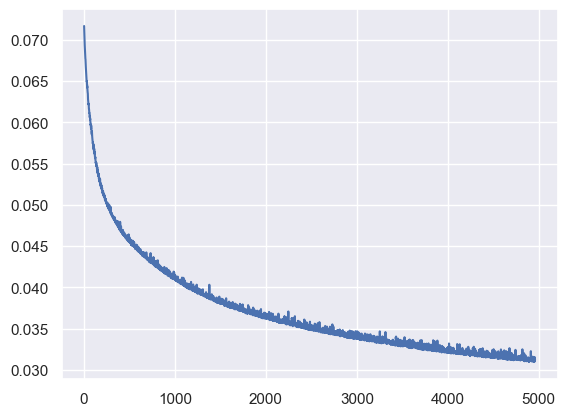

In [129]:
# plota as loss para ver se está treinando
plt.plot(historyfeh.history['loss'][40:])

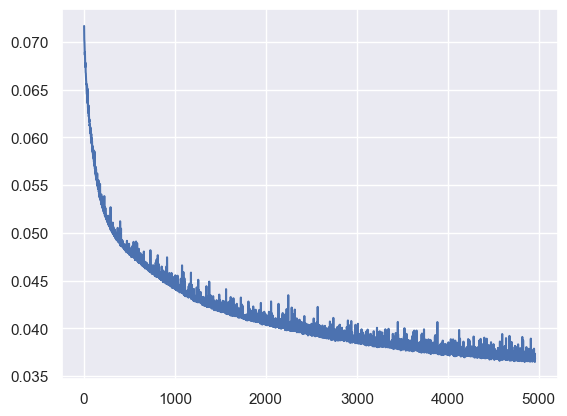

In [130]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyfeh.history['val_loss'][40:]) #dar smoothie nas curvas kkkkkk para colocar no paper

# Testando modelos treinados

##### teff

In [152]:
predteff = modelteff.predict(X_test)

561/561 [==============================] - 1s 1ms/step


Text(0, 0.5, 'Y_test')

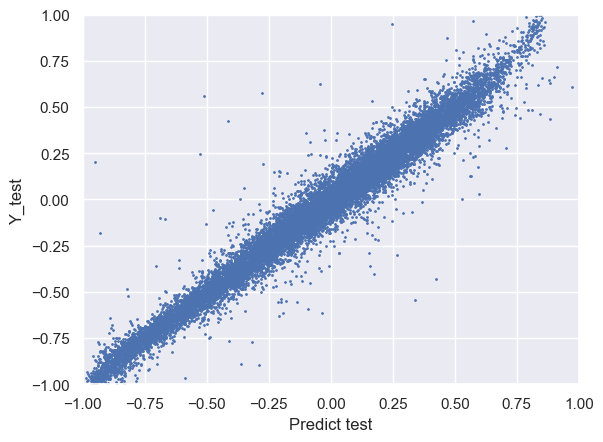

In [153]:
# plota o pred de acordo com o Y_test (teff)
plt.scatter(predteff, Y_test, s=1)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

In [154]:
score = r2_score(Y_test, predteff)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 97.0%


In [155]:
score = mean_absolute_error(Y_test, predteff)
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))

The Mean Absolute Error of our Model is 0.05


In [156]:
score = np.sqrt(mean_absolute_error(Y_test, predteff))
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))

The Mean Absolute Error of our Model is 0.22


In [97]:
Y_train.max()

feh_training    0.53
dtype: float64

##### logg

In [71]:
predlogg = modellogg.predict(X_test)

326/326 [==============================] - 1s 1ms/step


In [72]:
#encoder.decode_DataFrame(predologg, "logg_training")

Text(0, 0.5, 'Y_test')

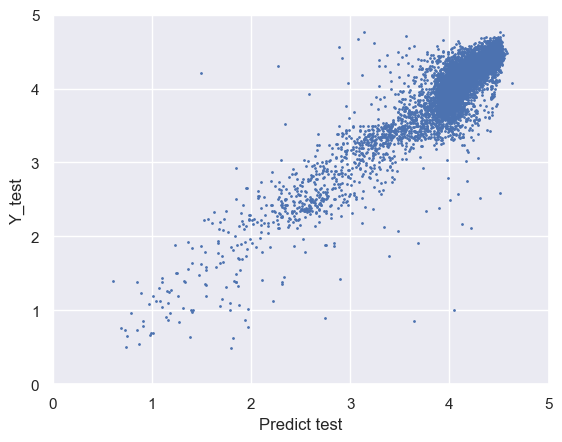

In [73]:
# plota o pred de acordo com o Y_test (logg)
plt.scatter(predlogg, Y_test, s=1)
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

In [74]:
score = r2_score(Y_test, predlogg)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 80.0%


In [75]:
score = mean_absolute_error(Y_test, predlogg)
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))

The Mean Absolute Error of our Model is 0.14


In [76]:
score = np.sqrt(mean_absolute_error(Y_test, predlogg))
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))

The Mean Absolute Error of our Model is 0.37


##### feh

In [131]:
predfeh = modelfeh.predict(X_test)

326/326 [==============================] - 1s 2ms/step


Text(0, 0.5, 'Y_test')

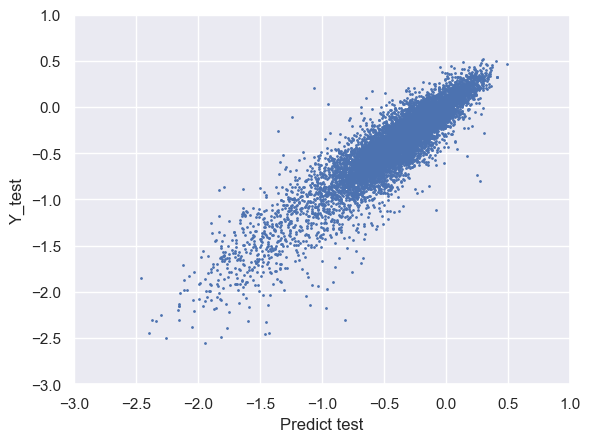

In [132]:
# plota o pred de acordo com o Y_test (feh)
plt.scatter(predfeh, Y_test, s=1)
plt.xlim(-3, 1)
plt.ylim(-3, 1)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

In [133]:
score = r2_score(Y_test, predfeh)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 82.0%


In [134]:
score = mean_absolute_error(Y_test, predfeh)
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))

The Mean Absolute Error of our Model is 0.13


In [135]:
score = np.sqrt(mean_absolute_error(Y_test, predfeh))
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))

The Mean Absolute Error of our Model is 0.36


In [39]:
for i in range(len(pred)):
    print(f'{pred[i]} - {np.array(Y_test)[i]}')

[-0.01653169] - [0.10436812]
[-0.0164127] - [0.12504168]
[-0.01655977] - [0.16505502]
[-0.01605693] - [-0.26775592]
[-0.01719073] - [-0.31977326]
[-0.01660319] - [-0.79393131]
[-0.01743995] - [-0.20306769]
[-0.01610001] - [-0.30576859]
[-0.01593579] - [-0.3957986]
[-0.01600106] - [-0.53117706]
[-0.01713799] - [0.31177059]
[-0.01663167] - [0.46115372]
[-0.01659522] - [-0.11103701]
[-0.0163922] - [0.10370123]
[-0.0168667] - [-0.48849617]
[-0.01728272] - [-0.07835945]
[-0.01648687] - [0.23107703]
[-0.01596602] - [-0.75125042]
[-0.01706299] - [0.20906969]
[-0.01727004] - [-0.01767256]
[-0.01663666] - [0.31843948]
[-0.01672502] - [0.28309436]
[-0.0164045] - [-0.17039013]
[-0.01630088] - [0.00033344]
[-0.0166153] - [0.56585529]
[-0.01672463] - [0.1357119]
[-0.01670246] - [-0.78459486]
[-0.01689277] - [0.02167389]
[-0.0165698] - [0.28442814]
[-0.01643093] - [-0.20306769]
[-0.01682014] - [-0.8246082]
[-0.01709703] - [0.04234745]
[-0.0168339] - [0.32710904]
[-0.01652981] - [-0.7705902]
[-0.0164

[-0.01645855] - [0.03567856]
[-0.01649794] - [0.18972991]
[-0.01685493] - [0.12304101]
[-0.01700574] - [0.24708236]
[-0.01723836] - [-0.31243748]
[-0.01828946] - [0.53251084]
[-0.01629045] - [-0.39846616]
[-0.01658951] - [0.21707236]
[-0.01602059] - [-0.4624875]
[-0.01655132] - [0.25775258]
[-0.01618243] - [-0.15771924]
[-0.01646179] - [0.08636212]
[-0.01750152] - [-0.08969657]
[-0.01642973] - [-0.01833945]
[-0.01669034] - [0.18772924]
[-0.01789594] - [-0.26375458]
[-0.01674598] - [0.06102034]
[-0.01679963] - [-0.51583861]
[-0.01728839] - [0.41513838]
[-0.01662131] - [0.20973658]
[-0.01640589] - [-0.00566856]
[-0.01756053] - [0.05968656]
[-0.01771483] - [0.34844948]
[-0.01611613] - [-0.22507503]
[-0.01791413] - [0.66255418]
[-0.01892938] - [0.42980994]
[-0.01657025] - [0.02634211]
[-0.01639197] - [-0.13104368]
[-0.01689706] - [-0.43381127]
[-0.01724554] - [0.18506169]
[-0.01667199] - [0.4924975]
[-0.01639934] - [0.12904301]
[-0.01781918] - [0.31843948]
[-0.01787825] - [-0.03834612]
[-0

[-0.01660512] - [-0.25241747]
[-0.01780531] - [-0.35578526]
[-0.01755435] - [0.4804935]
[-0.01630076] - [-0.11970657]
[-0.01791588] - [0.03701234]
[-0.01654501] - [0.35378459]
[-0.01627827] - [-0.33844615]
[-0.01582661] - [-0.4198066]
[-0.01558513] - [-0.64788263]
[-0.01683811] - [0.0816939]
[-0.0160722] - [-0.34178059]
[-0.01789093] - [0.10770257]
[-0.01637072] - [0.11103701]
[-0.01641654] - [0.08236079]
[-0.01700184] - [0.38179393]
[-0.01746067] - [0.41513838]
[-0.01672799] - [-0.6132044]
[-0.01668143] - [0.24708236]
[-0.01728919] - [-0.66988996]
[-0.01694541] - [-0.42714238]
[-0.01651344] - [0.06768923]
[-0.01635009] - [0.03367789]
[-0.01700936] - [0.15505168]
[-0.01690149] - [-0.06502167]
[-0.01764742] - [0.9153051]
[-0.01638438] - [0.15305102]
[-0.01612722] - [-0.25908636]
[-0.01629251] - [-0.06835612]
[-0.01763986] - [0.23974658]
[-0.01795583] - [0.23441147]
[-0.01658437] - [0.32444148]
[-0.01662675] - [0.3717906]
[-0.01724274] - [0.31377126]
[-0.01634398] - [0.03101034]
[-0.0154

[-0.0165527] - [0.25508503]
[-0.01696367] - [0.04234745]
[-0.01831838] - [-0.25241747]
[-0.0164253] - [0.13304435]
[-0.0164202] - [-0.01167056]
[-0.01663055] - [0.1723908]
[-0.01652448] - [0.07502501]
[-0.01660411] - [0.30376792]
[-0.01754193] - [0.45848616]
[-0.01693603] - [-0.4804935]
[-0.01601666] - [-0.32510837]
[-0.01775426] - [0.15038346]
[-0.01649719] - [0.24108036]
[-0.01745045] - [0.18106035]
[-0.01644963] - [0.18172724]
[-0.01605029] - [-0.22840947]
[-0.01649569] - [0.03701234]
[-0.01613047] - [-0.39646549]
[-0.01628291] - [-0.05035012]
[-0.01778159] - [0.29509837]
[-0.01752906] - [-0.06235412]
[-0.01643795] - [0.01633878]
[-0.01665209] - [0.0936979]
[-0.0163798] - [-0.61787262]
[-0.0168028] - [0.34044682]
[-0.01718529] - [-0.21507169]
[-0.01632306] - [0.01233745]
[-0.01714397] - [0.35711904]
[-0.01779806] - [-0.39046349]
[-0.01644585] - [0.0576859]
[-0.01587528] - [-0.67522508]
[-0.01641118] - [0.07835945]
[-0.01774746] - [0.10370123]
[-0.01639793] - [-0.09436479]
[-0.016382

[-0.01653562] - [0.16105368]
[-0.01684469] - [0.02834278]
[-0.01609569] - [-0.31043681]
[-0.01656495] - [0.20373458]
[-0.01605884] - [-0.36445482]
[-0.01709988] - [0.19773258]
[-0.01666368] - [0.27042347]
[-0.01775464] - [0.51583861]
[-0.01719751] - [-0.62454151]
[-0.01651961] - [0.35378459]
[-0.01633592] - [-0.11437146]
[-0.01633728] - [-0.12770924]
[-0.01643472] - [0.17572524]
[-0.01731284] - [-0.36112037]
[-0.01734452] - [0.03101034]
[-0.01789354] - [-0.69523174]
[-0.01728237] - [0.76525509]
[-0.01631436] - [-0.75591864]
[-0.01643317] - [-0.2384128]
[-0.01754528] - [0.17172391]
[-0.01655378] - [0.16905635]
[-0.01830481] - [0.51317106]
[-0.01637268] - [-0.04301434]
[-0.01775841] - [0.39513171]
[-0.01768951] - [0.12637546]
[-0.01673838] - [0.14904968]
[-0.01682598] - [-0.16972324]
[-0.0175162] - [0.10103368]
[-0.01679049] - [-0.34844948]
[-0.0174406] - [0.15171724]
[-0.01636565] - [-0.10236746]
[-0.0168672] - [0.47315772]
[-0.01625465] - [-0.12170724]
[-0.01651735] - [0.08969657]
[-0.

[-0.01770855] - [-0.45115038]
[-0.01603478] - [-0.48849617]
[-0.01711386] - [0.28242748]
[-0.01711472] - [0.06835612]
[-0.01720216] - [-0.19906636]
[-0.01695013] - [0.03234411]
[-0.01697752] - [0.01033678]
[-0.01614857] - [-0.23774592]
[-0.01694431] - [-0.14104702]
[-0.01623188] - [-0.1963988]
[-0.01670451] - [0.36245415]
[-0.01642333] - [0.08569523]
[-0.01712086] - [-0.77192397]
[-0.01656627] - [0.10770257]
[-0.01789467] - [-0.37045682]
[-0.01705125] - [0.37845949]
[-0.01760638] - [-0.49716572]
[-0.01720372] - [0.37912638]
[-0.01639787] - [-0.32977659]
[-0.01677344] - [-0.65855285]
[-0.01542979] - [-0.83327776]
[-0.01647913] - [0.06635545]
[-0.01687739] - [0.45515172]
[-0.01683156] - [-0.32510837]
[-0.0180788] - [-0.02834278]
[-0.01771458] - [0.16105368]
[-0.01602149] - [-0.27575859]
[-0.01733322] - [0.36045348]
[-0.01677316] - [0.15305102]
[-0.01687529] - [-0.68856285]
[-0.01599811] - [-0.45515172]
[-0.01658414] - [0.03034345]
[-0.01603158] - [-0.01967322]
[-0.01650591] - [0.28176059

[-0.01755303] - [0.22840947]
[-0.01632137] - [-0.09636546]
[-0.01694937] - [0.25175058]
[-0.01795583] - [-0.11570524]
[-0.01640976] - [0.09836612]
[-0.01635421] - [0.05568523]
[-0.01701529] - [0.08836279]
[-0.01642936] - [-0.01167056]
[-0.01645054] - [0.05835278]
[-0.01765026] - [-0.46982327]
[-0.017203] - [0.52584195]
[-0.01667711] - [-0.33844615]
[-0.01634713] - [-0.03767923]
[-0.01629433] - [-0.8732911]
[-0.0165433] - [0.28976325]
[-0.01752366] - [0.24841614]
[-0.01682671] - [0.17772591]
[-0.01746516] - [0.35178393]
[-0.01528125] - [-0.88329443]
[-0.01641044] - [0.21240413]
[-0.01657732] - [-0.34178059]
[-0.01690208] - [0.00966989]
[-0.01662407] - [0.4198066]
[-0.01705695] - [-0.34978326]
[-0.01640954] - [-0.02767589]
[-0.01684946] - [0.53384461]
[-0.01636179] - [-0.04368123]
[-0.01718896] - [-0.14304768]
[-0.01706508] - [-0.3231077]
[-0.0166405] - [0.41313771]
[-0.01681572] - [0.22507503]
[-0.01756062] - [0.40513505]
[-0.01668863] - [0.58786262]
[-0.01726097] - [0.25575192]
[-0.017

In [174]:
a = []
f = 0
for i in range(len(pred)):
    a.append(pred[i] - np.array(Y_test)[i])
    f += int(pred[i] - np.array(Y_test)[i])

In [175]:
f/len(pred)

-0.0017262875227774049

In [176]:
a = np.array(a)

In [177]:
print(f'MAX: {a.max()}')
print(f'MIN: {a.min()}')
print(f'MEAN: {a.mean()}')

MAX: 1.6103280067443846
MIN: -17.713723373413085
MEAN: -0.020520809442062127


In [50]:
score = r2_score(Y_test, pred)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 94.0%


In [52]:
score = mean_absolute_error(Y_test, pred)
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))

The Mean Absolute Error of our Model is 0.06


In [67]:
score = np.sqrt(mean_absolute_error(Y_test, pred))
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))


The Mean Absolute Error of our Model is 0.24


In [64]:
x = scaler.inverse_transform(pred)

In [65]:
y = scaler.inverse_transform(Y_test)

Text(0, 0.5, 'Y_test')

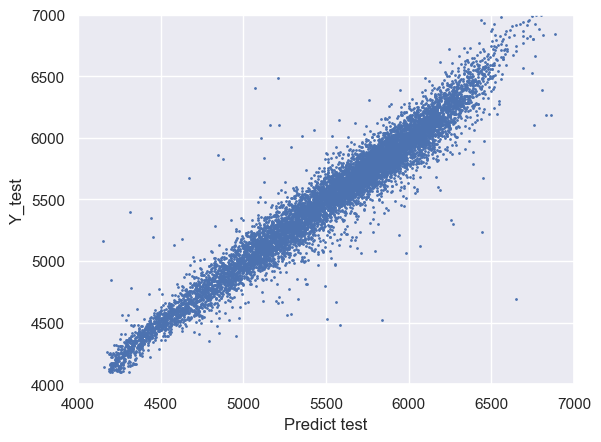

In [66]:
# plota o pred de acordo com o Y_test (teff) removendo a normalização
plt.scatter(x, y, s=1)
plt.xlim(4000, 7000)
plt.ylim(4000, 7000)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

# Aplicando rede treinada

In [185]:
csv2 = pd.read_csv("Halpha.csv", encoding='latin-1', index_col=['ID', 'RA', 'DEC'])

In [186]:
csv2

,,,Field,FWHM,ISOarea,KRON_RADIUS,MU_MAX,nDet_PStotal,PhotoFlagDet,CLASS_STAR,u_PStotal,J0378_PStotal,...,e_J0395_PStotal,e_J0410_PStotal,e_J0430_PStotal,e_g_PStotal,e_J0515_PStotal,e_r_PStotal,e_J0660_PStotal,e_i_PStotal,e_J0861_PStotal,e_z_PStotal
ID,RA,DEC,,,,,,,,,,,,,,,,,,,,,
b'iDR3.SPLUS-n14s03.023094 ',152.818127,-17.691007,b'SPLUS-n14s03 ',2.162409,525,2.547039,10.630968,12.0,0,0.985563,16.675000,16.575087,...,0.016197,0.013491,0.011681,0.003638,0.006543,0.001912,0.001706,0.001566,0.002259,0.001615
b'iDR3.HYDRA-0077.084865 ',150.383353,-33.043261,b'HYDRA-0077 ',2.060758,271,2.745416,12.111699,12.0,0,0.974406,15.377505,15.103262,...,0.007420,0.006743,0.006265,0.003002,0.005050,0.002588,0.002551,0.002657,0.004397,0.003160
b'iDR3.SPLUS-s23s45.020422 ',352.251832,-29.779436,b'SPLUS-s23s45 ',2.044366,246,2.879416,11.472648,12.0,0,0.994988,15.014418,15.013782,...,0.006913,0.007903,0.007426,0.003380,0.006805,0.002777,0.002718,0.002879,0.005049,0.003880
b'iDR3.SPLUS-n18s18.000089 ',174.850744,-23.627453,b'SPLUS-n18s18 ',2.552651,252,2.627111,10.996559,12.0,0,0.972722,19.206873,18.916110,...,0.045775,0.022941,0.014659,0.004242,0.007772,0.002779,0.002490,0.002253,0.002922,0.001966
b'iDR3.HYDRA-0049.043611 ',149.681164,-29.463707,b'HYDRA-0049 ',3.168911,395,3.058134,11.737776,12.0,0,0.871400,16.499258,16.071520,...,0.009739,0.007266,0.006659,0.002987,0.006106,0.002627,0.003007,0.003147,0.003607,0.002895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b'iDR3.SPLUS-n03s18.004879 ',174.344407,-3.312593,b'SPLUS-n03s18 ',5.641993,15,6.179567,17.176810,12.0,2,0.564282,21.547806,21.304468,...,1.106783,0.489786,0.377637,0.108107,0.332114,0.074605,0.043763,0.142963,0.140397,0.141498
b'iDR3.STRIPE82-0125.029072',327.127535,-0.797904,b'STRIPE82-0125',2.090127,7,1.820000,16.853830,12.0,0,0.549148,21.961760,21.633818,...,0.931720,1.855599,1.005176,0.215671,0.395559,0.109843,0.055459,0.116920,0.180835,0.204769
b'iDR3.STRIPE82-0132.057659',331.015699,1.107458,b'STRIPE82-0132',3.068043,10,5.251886,17.315880,12.0,2,0.609140,21.442451,22.669330,...,0.296826,0.328811,0.276437,0.119231,0.308578,0.085324,0.045233,0.163681,0.149418,0.400926


In [187]:
ndf = csv2[['u_PStotal', 'J0378_PStotal', 'J0395_PStotal', 
                 'J0410_PStotal', 'J0430_PStotal', 'g_PStotal', 
                 'J0515_PStotal', 'r_PStotal', 'J0660_PStotal', 
                 'i_PStotal', 'J0861_PStotal', 'z_PStotal']]

In [188]:
ndf.shape

(2187, 12)

In [189]:
aply_x = ndf.to_numpy()

In [190]:
#scaler = MinMaxScaler(feature_range = (-1,1))

In [192]:
aply_n= scaler.fit_transform(aply_x)

In [229]:
#when applying the model to your data (eg., jplus dr1), please run the following code.
#model=load_model('model/model_lamost_teff_V2_Final.h5')
result=model.predict(aply_n)

69/69 [==============================] - 0s 2ms/step


In [230]:
result

array([[-0.32188916],
       [ 0.46823418],
       [ 0.52766514],
       ...,
       [-0.08489259],
       [-0.21540591],
       [ 0.16249362]], dtype=float32)

In [231]:
x = scaler.inverse_transform(result)

In [232]:
x

array([[5065.827 ],
       [6250.617 ],
       [6339.734 ],
       ...,
       [5421.2036],
       [5225.499 ],
       [5792.159 ]], dtype=float32)

In [197]:
#csv3 = csv2

In [235]:
csv3['teff_predict'] = x

In [236]:
csv3

,,,Field,FWHM,ISOarea,KRON_RADIUS,MU_MAX,nDet_PStotal,PhotoFlagDet,CLASS_STAR,u_PStotal,J0378_PStotal,...,e_g_PStotal,e_J0515_PStotal,e_r_PStotal,e_J0660_PStotal,e_i_PStotal,e_J0861_PStotal,e_z_PStotal,feh_predict,logg_predict,teff_predict
ID,RA,DEC,,,,,,,,,,,,,,,,,,,,,
b'iDR3.SPLUS-n14s03.023094 ',152.818127,-17.691007,b'SPLUS-n14s03 ',2.162409,525,2.547039,10.630968,12.0,0,0.985563,16.675000,16.575087,...,0.003638,0.006543,0.001912,0.001706,0.001566,0.002259,0.001615,-0.058913,3.635599,5065.827148
b'iDR3.HYDRA-0077.084865 ',150.383353,-33.043261,b'HYDRA-0077 ',2.060758,271,2.745416,12.111699,12.0,0,0.974406,15.377505,15.103262,...,0.003002,0.005050,0.002588,0.002551,0.002657,0.004397,0.003160,-0.059050,3.595240,6250.617188
b'iDR3.SPLUS-s23s45.020422 ',352.251832,-29.779436,b'SPLUS-s23s45 ',2.044366,246,2.879416,11.472648,12.0,0,0.994988,15.014418,15.013782,...,0.003380,0.006805,0.002777,0.002718,0.002879,0.005049,0.003880,-0.057255,3.681078,6339.733887
b'iDR3.SPLUS-n18s18.000089 ',174.850744,-23.627453,b'SPLUS-n18s18 ',2.552651,252,2.627111,10.996559,12.0,0,0.972722,19.206873,18.916110,...,0.004242,0.007772,0.002779,0.002490,0.002253,0.002922,0.001966,0.207014,3.488342,5085.914062
b'iDR3.HYDRA-0049.043611 ',149.681164,-29.463707,b'HYDRA-0049 ',3.168911,395,3.058134,11.737776,12.0,0,0.871400,16.499258,16.071520,...,0.002987,0.006106,0.002627,0.003007,0.003147,0.003607,0.002895,0.050466,3.624842,6131.705566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b'iDR3.SPLUS-n03s18.004879 ',174.344407,-3.312593,b'SPLUS-n03s18 ',5.641993,15,6.179567,17.176810,12.0,2,0.564282,21.547806,21.304468,...,0.108107,0.332114,0.074605,0.043763,0.142963,0.140397,0.141498,0.737091,3.661139,5282.076660
b'iDR3.STRIPE82-0125.029072',327.127535,-0.797904,b'STRIPE82-0125',2.090127,7,1.820000,16.853830,12.0,0,0.549148,21.961760,21.633818,...,0.215671,0.395559,0.109843,0.055459,0.116920,0.180835,0.204769,0.745572,3.606813,5205.132812
b'iDR3.STRIPE82-0132.057659',331.015699,1.107458,b'STRIPE82-0132',3.068043,10,5.251886,17.315880,12.0,2,0.609140,21.442451,22.669330,...,0.119231,0.308578,0.085324,0.045233,0.163681,0.149418,0.400926,0.871691,3.857249,5421.203613


In [237]:
csv3.to_csv("Halpha_Final.csv")